# Assignment 1: Polarization Detection - EDA
## SemEval 2026 Task 9, Subtask 1 (POLAR)
### CS-272: Artificial Intelligence



---

<font size = "5"><b>
Anum Fatima ___
515458</b></font>


---



In [1]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 42.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=644dd6828cc2bedc733697a084cea9d1dd1498285b3fbac29c119ed0c396fc6c
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect




---


<font size = "5">Importing all the needed modules.</font>


---





In [2]:
import chardet
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from collections import Counter
from matplotlib.backends.backend_pdf import PdfPages
import emoji
from pathlib import Path
import warnings

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.util import ngrams

nltk.download('stopwords')
warnings.filterwarnings('ignore')
nltk.download('punkt', quiet=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True



---


<font size = "5">Checking the encodings of the languages</font>


---



In [ ]:

with open("data/spa.csv", 'rb') as f:
    result = chardet.detect(f.read(100000))
result
# with open("data/spa.csv", 'rb') as f:   # open in binary mode (b)
#     result = chardet.detect(f.read(100000))  # read first 100k bytes
# result
# with open("data/spa.csv", 'rb') as f:   # open in binary mode (b)
#     result = chardet.detect(f.read(100000))  # read first 100k bytes
# result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [ ]:
df_eng = pd.read_csv("data/eng.csv", encoding="Windows-1252")
# Separate English texts by label using 0 and 1
polarized_texts = df_eng[df_eng['polarization'] == 1]['text']
not_polarized_texts = df_eng[df_eng['polarization'] == 0]['text']

# Quick check
print("Number of polarized texts:", len(polarized_texts))
print("Number of not polarized texts:", len(not_polarized_texts))

Number of polarized texts: 1002
Number of not polarized texts: 1674




---


<font size="5">Finding the most common words: </font>


---





> English



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


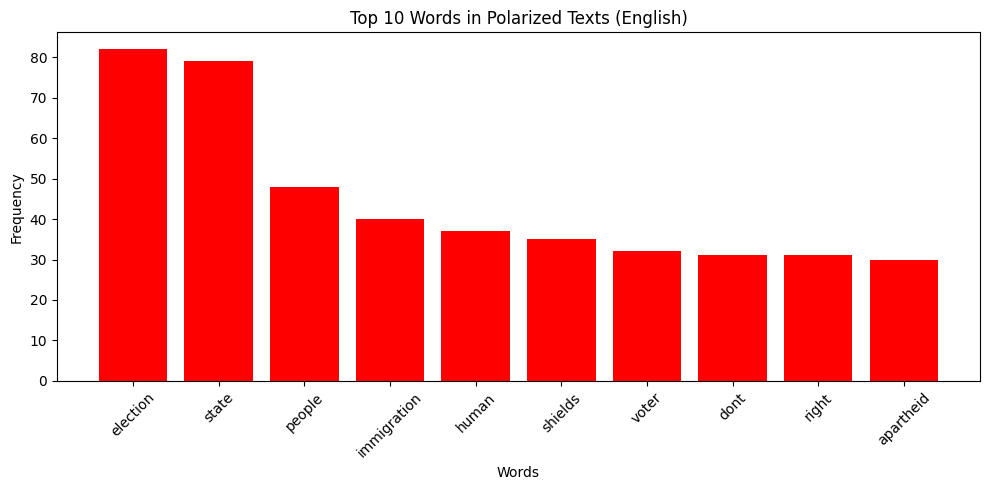

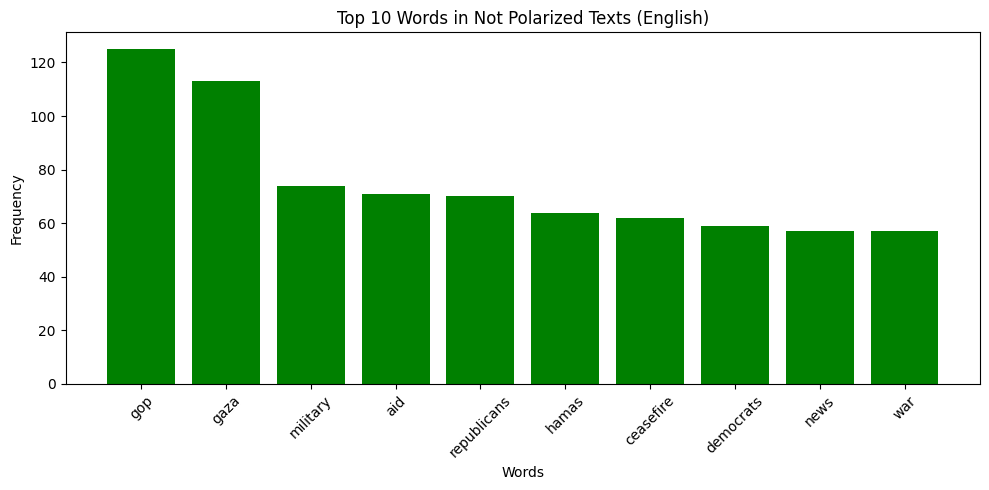

In [5]:

# Make sure the folder exists
os.makedirs("plots", exist_ok=True)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def clean_and_tokenize_english(text_series, stopwords_list, regex_pattern):
    from nltk.tokenize import word_tokenize

    text = " ".join(text_series.astype(str))
    text = text.lower()
    text = re.sub(regex_pattern, " ", text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords_list and len(t) > 2]
    return tokens
stop_words = set(stopwords.words('english'))
stop_words.add("trump")
stop_words.add("ukraine")
stop_words.add("joe")
stop_words.add("biden")
stop_words.add("states")
stop_words.add("like")
stop_words.add("israel")
stop_words.add("donald")
stop_words.add("don't")
stop_words.add("would") #because states and state are both present
 #adding these to the stop_words because they are common in polarized and non-polarized
#so they do not give any important insight
# Process English data
df_eng = pd.read_csv('data/eng.csv',encoding='Windows-1252')
polarized_words = clean_and_tokenize_english(
    df_eng[df_eng['polarization'] == 1]['text'],
    stop_words,
    r'[^a-z\s]'
)
not_polarized_words = clean_and_tokenize_english(
    df_eng[df_eng['polarization'] == 0]['text'],
    stop_words,
    r'[^a-z\s]'
)

polarized_counter = Counter(polarized_words)
not_polarized_counter = Counter(not_polarized_words)

top_polarized = polarized_counter.most_common(10)
top_not_polarized = not_polarized_counter.most_common(10)

words_pol, counts_pol = zip(*top_polarized)
words_not, counts_not = zip(*top_not_polarized)

# Polarized Plot
plt.figure(figsize=(10, 5))
plt.bar(words_pol, counts_pol, color='red')
plt.title("Top 10 Words in Polarized Texts (English)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()

# plt.savefig("plots/eng_polarized_top_words.pdf", format="pdf", bbox_inches="tight")
plt.show()
# Not Polarized Plot
plt.figure(figsize=(10, 5))
plt.bar(words_not, counts_not, color='green')
plt.title("Top 10 Words in Not Polarized Texts (English)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("plots/eng_not_polarized_top_words.pdf", format="pdf", bbox_inches="tight")
plt.show()




> Spanish



Number of polarized texts: 1660
Number of not polarized texts: 1645


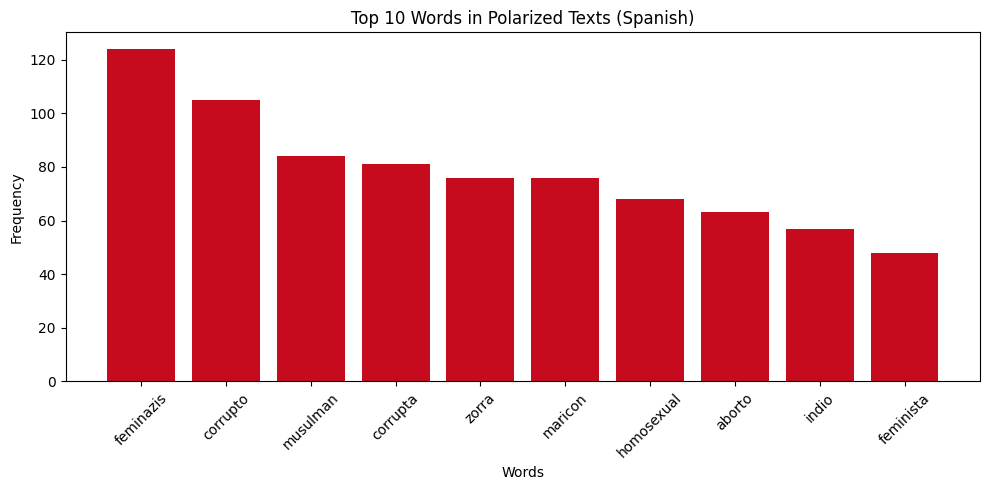

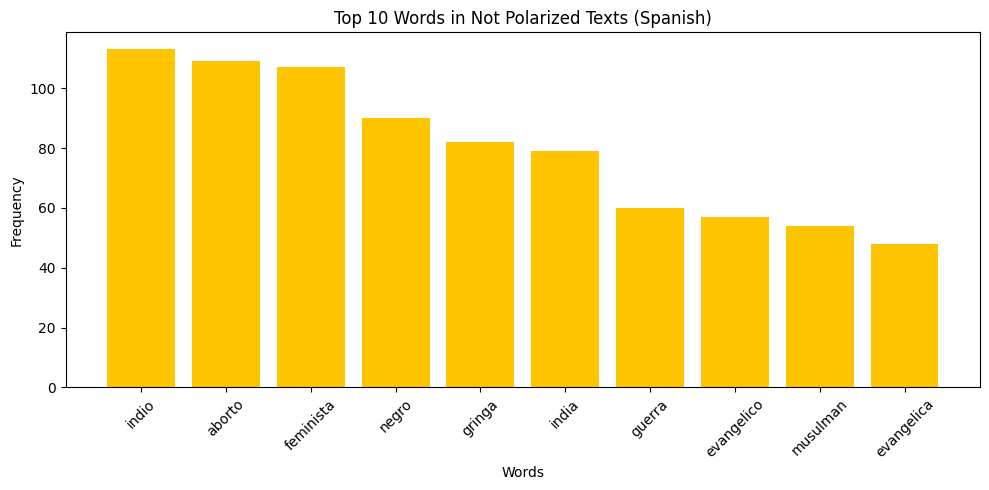

In [7]:
df_spa = pd.read_csv("data/spa.csv", encoding="utf-8")

polarized_texts = df_spa[df_spa['polarization'] == 1]['text']
not_polarized_texts = df_spa[df_spa['polarization'] == 0]['text']

print(f"Number of polarized texts: {len(polarized_texts)}")
print(f"Number of not polarized texts: {len(not_polarized_texts)}")

stop_words_spa = set(stopwords.words('spanish') + [
    'sí', 'no', 'bueno', 'pues', 'entonces', 'ahora', 'así', 'vale',
    'eh', 'oye', 'claro', 'ya', 'tan', 'aquí', 'allí', 'solo', 'también', "judio",
    "indigena","abortar","mas",'corrupcion','israel','islam','ser'
])

def clean_and_tokenize_spanish(text_series, stop_words):
    words = []
    for text in text_series:
        text = str(text).lower()
        text = re.sub(r'[^a-záéíóúüñ\s]', '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        words.extend(tokens)
    return words

# Process Spanish words
polarized_words_spa = clean_and_tokenize_spanish(polarized_texts, stop_words_spa)
not_polarized_words_spa = clean_and_tokenize_spanish(not_polarized_texts, stop_words_spa)

# Count frequencies
polarized_counter_spa = Counter(polarized_words_spa)
not_polarized_counter_spa = Counter(not_polarized_words_spa)

# Top 10 words
top_polarized_spa = polarized_counter_spa.most_common(10)
top_not_polarized_spa = not_polarized_counter_spa.most_common(10)

words_pol_spa, counts_pol_spa = zip(*top_polarized_spa)
words_not_spa, counts_not_spa = zip(*top_not_polarized_spa)

# Polarized Plot
plt.figure(figsize=(10, 5))
plt.bar(words_pol_spa, counts_pol_spa, color='#C60B1E')
plt.title("Top 10 Words in Polarized Texts (Spanish)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("plots/spanish_polarized_top_words.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Not Polarized Plot
plt.figure(figsize=(10, 5))
plt.bar(words_not_spa, counts_not_spa, color='#FFC400')
plt.title("Top 10 Words in Not Polarized Texts (Spanish)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("plots/spanish_not_polarized_top_words.pdf", format="pdf", bbox_inches="tight")
plt.show()



> German



Number of polarized texts: 1512
Number of not polarized texts: 1668


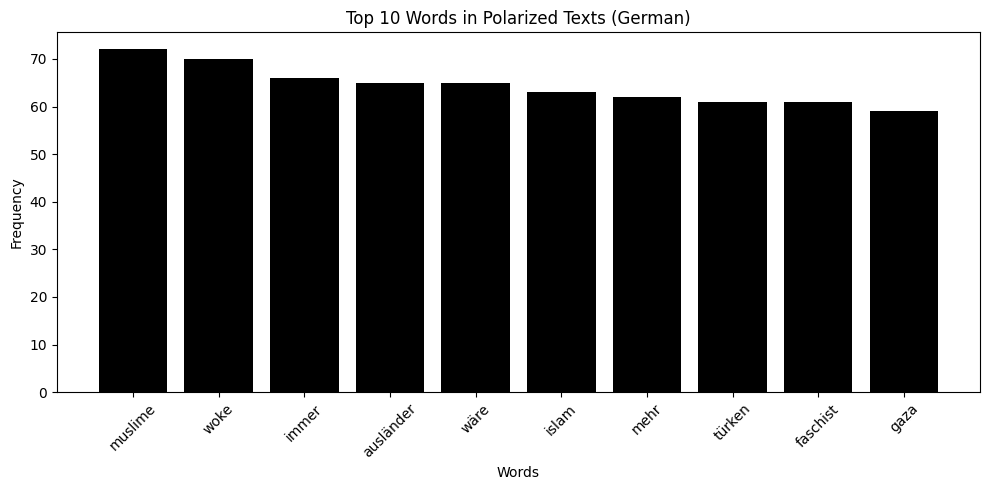

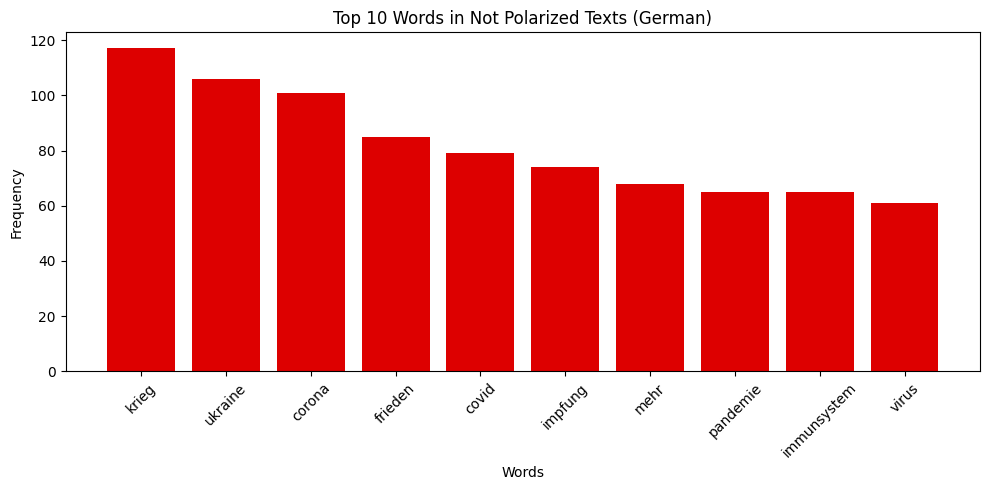

In [8]:
df_ger = pd.read_csv("data/deu.csv", encoding="utf-8-sig")
os.makedirs("plots", exist_ok=True)
polarized_texts_ger = df_ger[df_ger['polarization'] == 1]['text']
not_polarized_texts_ger = df_ger[df_ger['polarization'] == 0]['text']

print(f"Number of polarized texts: {len(polarized_texts_ger)}")
print(f"Number of not polarized texts: {len(not_polarized_texts_ger)}")

stop_words_ger = set(stopwords.words('german') + [
    'dass', 'mal', 'halt', 'einfach', 'eigentlich', 'wirklich',
    'ganz', 'natürlich', 'schon', 'doch', 'eben', 'ja', "russland","israel","hamas"
])

def clean_and_tokenize_german(text_series, stop_words):
    words = []
    for text in text_series:
        text = str(text).lower()
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'www\S+', '', text)
        text = re.sub(r'[^a-zäöüß\s]', '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        words.extend(tokens)
    return words

# Process German words
polarized_words_ger = clean_and_tokenize_german(polarized_texts_ger, stop_words_ger)
not_polarized_words_ger = clean_and_tokenize_german(not_polarized_texts_ger, stop_words_ger)

# Count frequencies
polarized_counter_ger = Counter(polarized_words_ger)
not_polarized_counter_ger = Counter(not_polarized_words_ger)

# Top 10 words
top_polarized_ger = polarized_counter_ger.most_common(10)
top_not_polarized_ger = not_polarized_counter_ger.most_common(10)

words_pol_ger, counts_pol_ger = zip(*top_polarized_ger)
words_not_ger, counts_not_ger = zip(*top_not_polarized_ger)

# Polarized Plot
plt.figure(figsize=(10, 5))
plt.bar(words_pol_ger, counts_pol_ger, color='#000000')
plt.title("Top 10 Words in Polarized Texts (German)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()

# plt.savefig("plots/german_polarized_top_words.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Not Polarized Plot
plt.figure(figsize=(10, 5))
plt.bar(words_not_ger, counts_not_ger, color='#DD0000')
plt.title("Top 10 Words in Not Polarized Texts (German)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("plots/german_not_polarized_top_words.pdf", format="pdf", bbox_inches="tight")
plt.show()




> Overall (in all languages)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- ENG ---
Top words in polarized: [('election', 82), ('state', 79), ('states', 51), ('people', 48), ('immigration', 40)]
Top words in not polarized: [('gop', 124), ('gaza', 113), ('us', 75), ('military', 74), ('aid', 71)]

--- DEU ---
Top words in polarized: [('muslime', 72), ('woke', 70), ('immer', 66), ('ausländer', 65), ('wäre', 65)]
Top words in not polarized: [('krieg', 117), ('ukraine', 106), ('corona', 101), ('schon', 93), ('frieden', 85)]

--- SPA ---
Top words in polarized: [('feminazis', 124), ('corrupto', 105), ('musulman', 84), ('corrupta', 81), ('zorra', 76)]
Top words in not polarized: [('indio', 113), ('aborto', 109), ('feminista', 107), ('negro', 90), ('gringa', 82)]

=== Overall Top Words Across All Languages ===
Polarized: [('feminazis', 124), ('corrupto', 105), ('woke', 97), ('gaza', 85), ('musulman', 84), ('election', 82), ('corrupta', 81), ('state', 80), ('putin', 77), ('zorra', 76)]
Not Polarized: [('gaza', 160), ('gop', 124), ('krieg', 117), ('indio', 113), ('

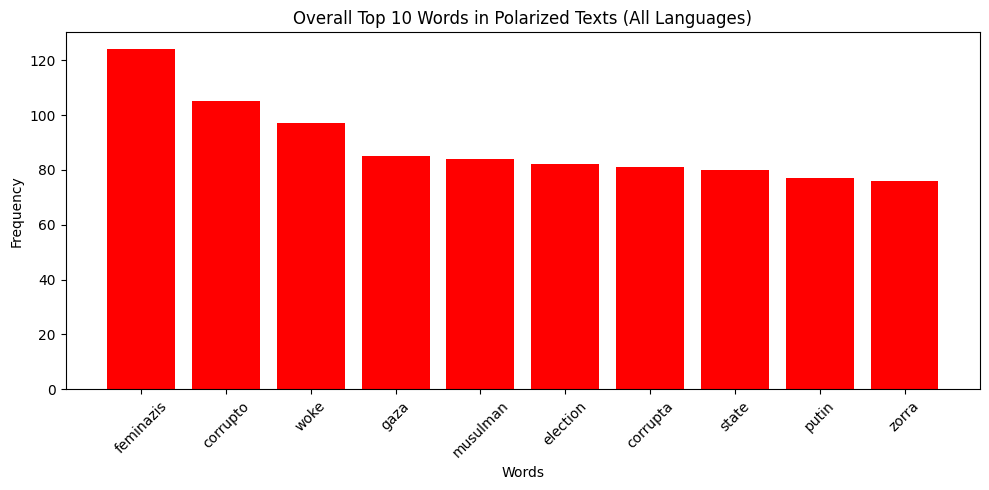

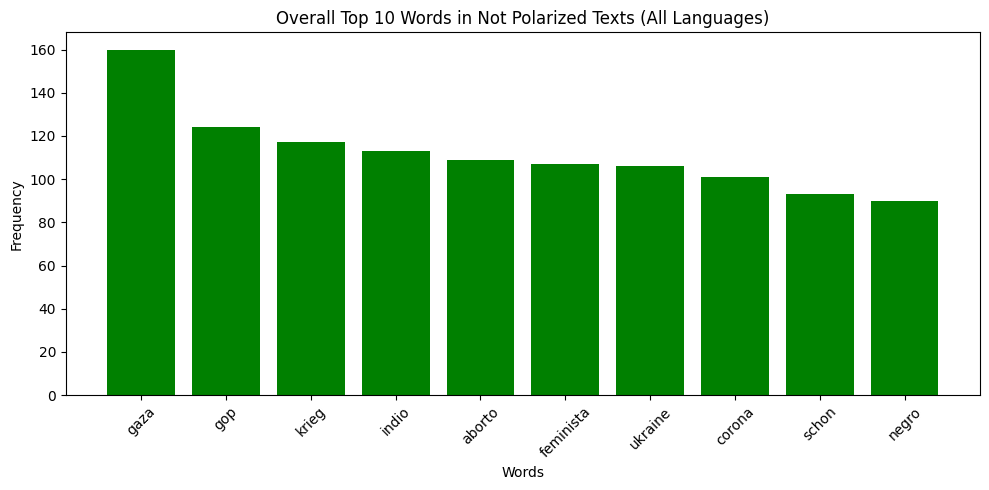

In [9]:
nltk.download('stopwords')

df_eng = pd.read_csv("data/eng.csv", encoding="windows-1252")
df_deu = pd.read_csv("data/deu.csv", encoding="utf-8-sig")
df_spa = pd.read_csv("data/spa.csv", encoding="utf-8-sig")

lang_map = {
    'eng': {'df': df_eng, 'stopwords': stopwords.words('english')+['trump','ukraine','donald','joe','biden','don\'t','would','like','israel'], 'regex': r'[^a-z\s]'},
    'deu': {'df': df_deu, 'stopwords': stopwords.words('german') + ['ja','user','nein','mal','also','russland', 'israel', 'hamas',], 'regex': r'[^a-zäöüß\s]'},
    'spa': {'df': df_spa, 'stopwords': stopwords.words('spanish')+["judio",'si','ser',"indigena", "abortar", "mas",'islam','corrupcion','israel' ], 'regex': r'[^a-záéíóúüñ\s]'}
}

def clean_and_tokenize(text_series, stop_words, regex):
    words = []
    for text in text_series:
        text = str(text).lower()
        text = re.sub(regex, '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words]
        words.extend(tokens)
    return words

overall_polarized = Counter()
overall_not_polarized = Counter()

for lang, info in lang_map.items():
    df_lang = info['df']
    stop_words = set(info['stopwords'])
    regex = info['regex']

    polarized_texts = df_lang[df_lang['polarization'] == 1]['text']
    not_polarized_texts = df_lang[df_lang['polarization'] == 0]['text']

    polarized_words = clean_and_tokenize(polarized_texts, stop_words, regex)
    not_polarized_words = clean_and_tokenize(not_polarized_texts, stop_words, regex)

    pol_counter = Counter(polarized_words)
    not_pol_counter = Counter(not_polarized_words)

    overall_polarized.update(pol_counter)
    overall_not_polarized.update(not_pol_counter)

    print(f"\n--- {lang.upper()} ---")
    print("Top words in polarized:", pol_counter.most_common(5))
    print("Top words in not polarized:", not_pol_counter.most_common(5))

top_pol_overall = overall_polarized.most_common(10)
top_not_overall = overall_not_polarized.most_common(10)

print("\n=== Overall Top Words Across All Languages ===")
print("Polarized:", top_pol_overall)
print("Not Polarized:", top_not_overall)

# create folder if not exists
os.makedirs("plots", exist_ok=True)

# Separate words and counts
words_pol, counts_pol = zip(*top_pol_overall)
words_not, counts_not = zip(*top_not_overall)

# Polarized bar chart
plt.figure(figsize=(10,5))
plt.bar(words_pol, counts_pol, color='red')
plt.title("Overall Top 10 Words in Polarized Texts (All Languages)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/overall_common_polarized.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Not polarized bar chart
plt.figure(figsize=(10,5))
plt.bar(words_not, counts_not, color='green')
plt.title("Overall Top 10 Words in Not Polarized Texts (All Languages)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("plots/overall_common_not_polarized.pdf", format="pdf", bbox_inches="tight")
plt.show()



---


<font size = "5">Counting ratio of uppercase and lowercase letters:</font>


---





> English



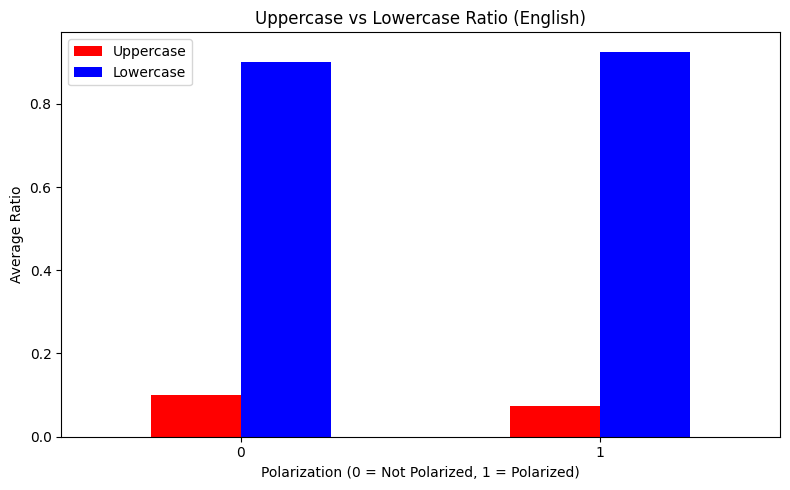

In [ ]:
def count_case_ratio(text):
    text = str(text)
    total_letters = sum(c.isalpha() for c in text)
    if total_letters == 0:
        return 0, 0
    upper = sum(c.isupper() for c in text)
    lower = sum(c.islower() for c in text)
    return upper / total_letters, lower / total_letters

# apply on english data
df_eng['upper_ratio'], df_eng['lower_ratio'] = zip(*df_eng['text'].astype(str).apply(count_case_ratio))

# get average ratios for polarized and not polarized
avg_ratios_eng = df_eng.groupby('polarization')[['upper_ratio', 'lower_ratio']].mean()

# create folder if not exists
os.makedirs("plots", exist_ok=True)

# plot and save
avg_ratios_eng.plot(kind='bar', figsize=(8,5), color=['red', 'blue'])
plt.title("Uppercase vs Lowercase Ratio (English)")
plt.ylabel("Average Ratio")
plt.xlabel("Polarization (0 = Not Polarized, 1 = Polarized)")
plt.xticks(rotation=0)
plt.legend(["Uppercase", "Lowercase"])
plt.tight_layout()
plt.show()




> German



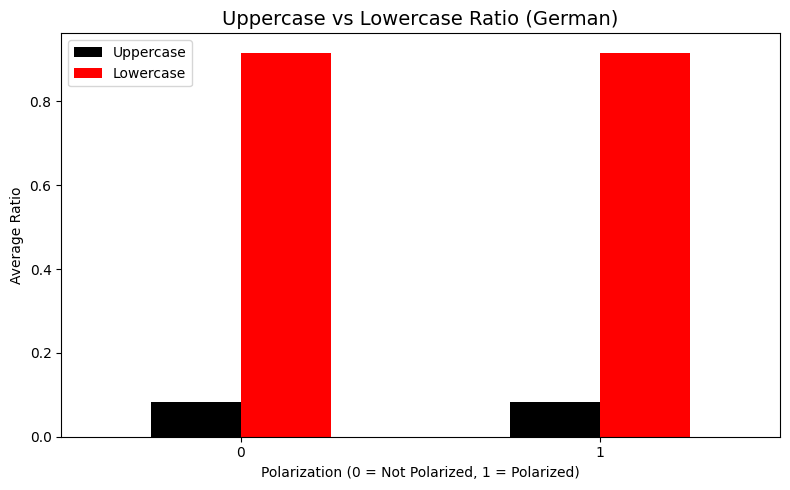

In [ ]:
df_deu['upper_ratio'], df_deu['lower_ratio'] = zip(*df_deu['text'].astype(str).apply(count_case_ratio))

avg_ratios_deu = df_deu.groupby('polarization')[['upper_ratio', 'lower_ratio']].mean()

os.makedirs("plots", exist_ok=True)

avg_ratios_deu.plot(kind='bar', figsize=(8,5), color=['black', '#FF0000'])  # black = uppercase, red = lowercase
plt.title("Uppercase vs Lowercase Ratio (German)", fontsize=14)
plt.ylabel("Average Ratio")
plt.xlabel("Polarization (0 = Not Polarized, 1 = Polarized)")
plt.xticks(rotation=0)
plt.legend(["Uppercase", "Lowercase"])
plt.tight_layout()
plt.show()




> Spanish



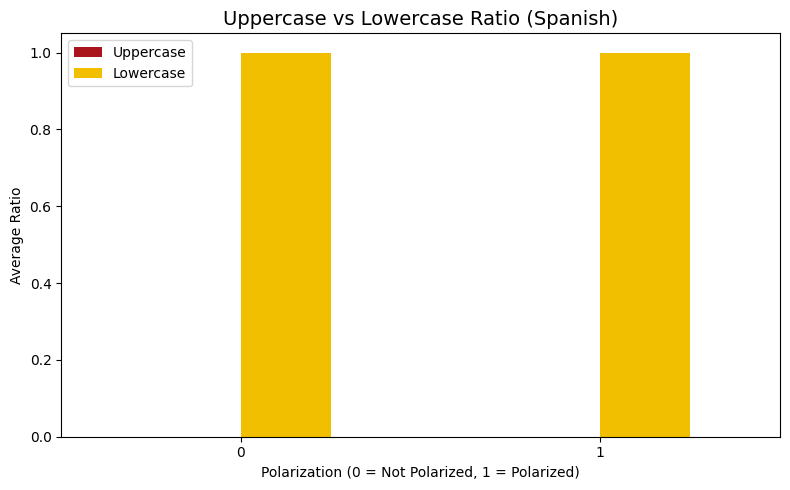

In [ ]:
df_spa['upper_ratio'], df_spa['lower_ratio'] = zip(*df_spa['text'].astype(str).apply(count_case_ratio))

avg_ratios_spa = df_spa.groupby('polarization')[['upper_ratio', 'lower_ratio']].mean()

os.makedirs("plots", exist_ok=True)

avg_ratios_spa.plot(kind='bar', figsize=(8,5), color=['#AA151B', '#F1BF00'])  # red & yellow (Spain flag)
plt.title("Uppercase vs Lowercase Ratio (Spanish)", fontsize=14)
plt.ylabel("Average Ratio")
plt.xlabel("Polarization (0 = Not Polarized, 1 = Polarized)")
plt.xticks(rotation=0)
plt.legend(["Uppercase", "Lowercase"])
plt.tight_layout()
plt.show()




> Overall (in all languages)



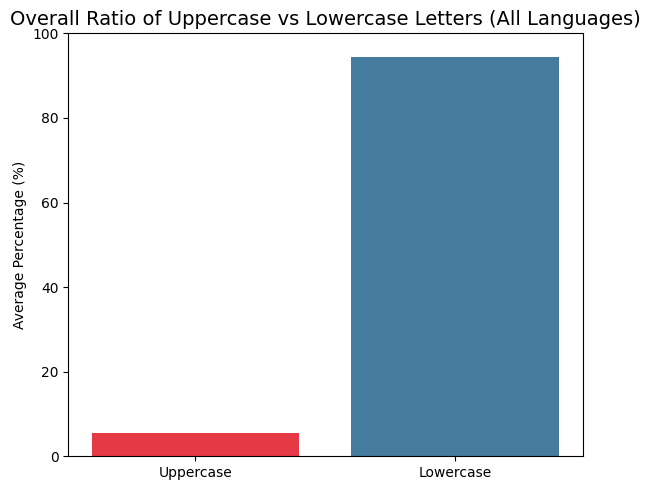

In [ ]:
df_eng = pd.read_csv("data/eng.csv", encoding="Windows-1252")
df_deu = pd.read_csv("data/deu.csv", encoding="utf-8-sig")
df_spa = pd.read_csv("data/spa.csv", encoding="utf-8-sig")

# Combine them
data = pd.concat([df_eng, df_deu, df_spa], ignore_index=True)

# Apply existing function
ratios = data['text'].apply(count_case_ratio)

# Separate into uppercase and lowercase ratios
upper_ratios = [u for u, l in ratios]
lower_ratios = [l for u, l in ratios]

# Compute average ratios overall
avg_upper = sum(upper_ratios) / len(upper_ratios) * 100
avg_lower = sum(lower_ratios) / len(lower_ratios) * 100

# Create plots folder if missing
os.makedirs("plots", exist_ok=True)

# Plot
plt.figure(figsize=(6,5))
plt.bar(['Uppercase', 'Lowercase'], [avg_upper, avg_lower],
        color=['#e63946', '#457b9d'])
plt.title("Overall Ratio of Uppercase vs Lowercase Letters (All Languages)", fontsize=14)
plt.ylabel("Average Percentage (%)")
plt.ylim(0, 100)
plt.tight_layout()

# Save + show + download
plt.show()



---


<font size = "5">Word clouds:</font>


---





> English



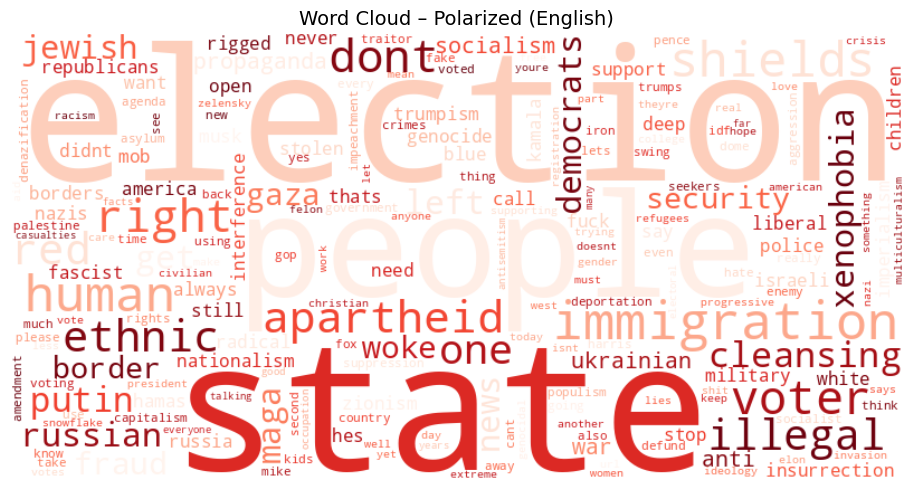

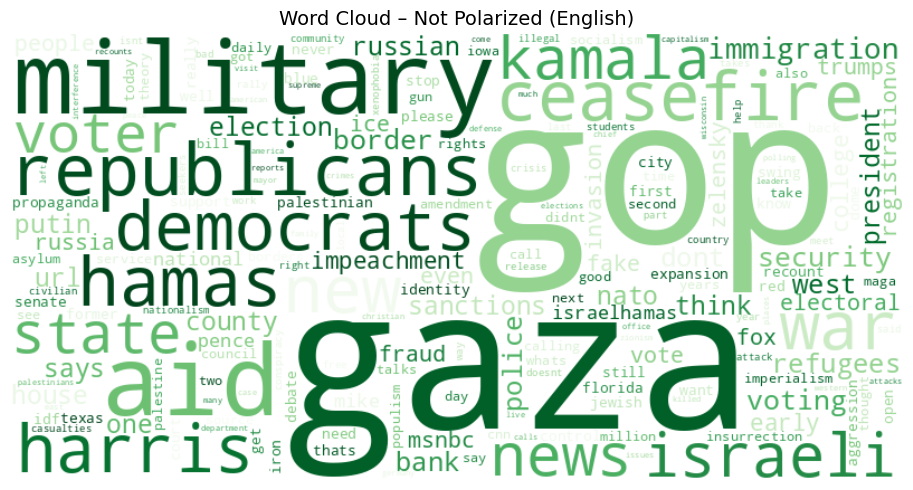

In [11]:
df_eng = pd.read_csv("data/eng.csv", encoding="windows-1252")

stop_words = set(stopwords.words('english'))
stop_words.add('trump')
stop_words.add('ukraine')
stop_words.add("joe")
stop_words.add("biden")
stop_words.add("states")
stop_words.add("like")
stop_words.add("israel")
stop_words.add("donald")
stop_words.add("don't")
stop_words.add("would")

def clean_and_tokenize_english(text_series, stop_words):
    words = []
    for text in text_series:
        text = str(text).lower()
        text = re.sub(r'[^a-z\s]', '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        words.extend(tokens)
    return words

polarized_words_eng = clean_and_tokenize_english(
    df_eng[df_eng['polarization'] == 1]['text'],
    stop_words
)
not_polarized_words_eng = clean_and_tokenize_english(
    df_eng[df_eng['polarization'] == 0]['text'],
    stop_words
)

polarized_counter_eng = Counter(polarized_words_eng)
not_polarized_counter_eng = Counter(not_polarized_words_eng)

# Polarized word cloud
wc_polarized_en = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Reds'
).generate_from_frequencies(polarized_counter_eng)

plt.figure(figsize=(10, 5))
plt.imshow(wc_polarized_en, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Polarized (English)", fontsize=14)
plt.tight_layout()
# plt.savefig("plots/english_wordcloud_polarized.pdf", format="pdf", bbox_inches="tight")
plt.show()
# Not polarized word cloud
wc_not_polarized_en = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Greens'
).generate_from_frequencies(not_polarized_counter_eng)

plt.figure(figsize=(10, 5))
plt.imshow(wc_not_polarized_en, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Not Polarized (English)", fontsize=14)
plt.tight_layout()
# plt.savefig("plots/english_wordcloud_not_polarized.pdf", format="pdf", bbox_inches="tight")
plt.show()



> German



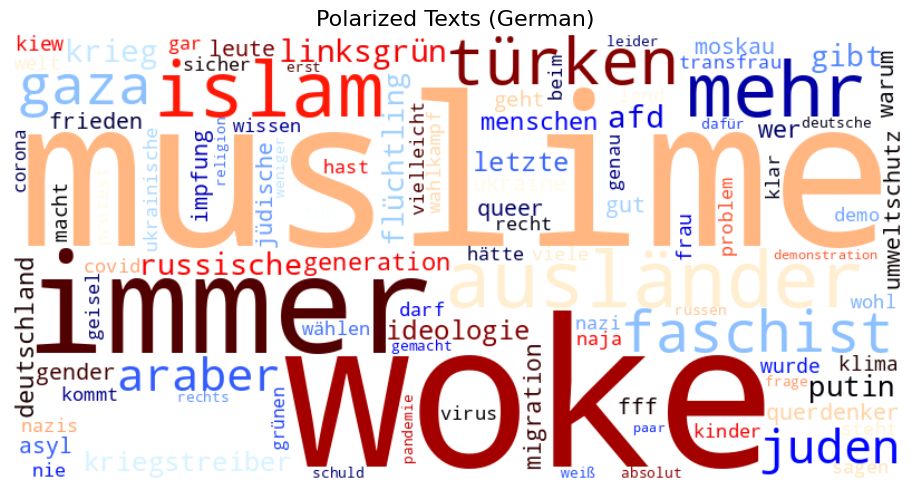

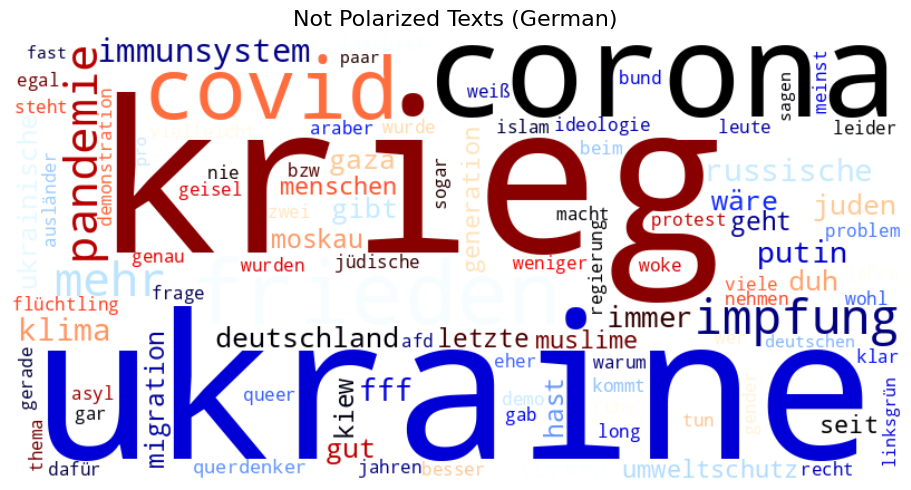

In [12]:
df_deu = pd.read_csv("data/deu.csv", encoding="utf-8-sig")

stop_words_deu = set(stopwords.words('german') + [
    'ja', 'nein', 'mal', 'also', 'dass', 'halt', 'einfach',
    'eigentlich', 'wirklich', 'ganz', 'natürlich', 'schon', 'doch', 'eben','russland', 'israel', 'hamas'
    ,'user'
])

def clean_and_tokenize_german(text_series, stop_words):
    words = []
    for text in text_series:
        text = str(text).lower()
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'www\S+', '', text)
        text = re.sub(r'[^a-zäöüß\s]', '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        words.extend(tokens)
    return words

polarized_words_deu = clean_and_tokenize_german(
    df_deu[df_deu['polarization'] == 1]['text'],
    stop_words_deu
)
not_polarized_words_deu = clean_and_tokenize_german(
    df_deu[df_deu['polarization'] == 0]['text'],
    stop_words_deu
)

polarized_counter_deu = Counter(polarized_words_deu)
not_polarized_counter_deu = Counter(not_polarized_words_deu)

# Polarized (German)
wordcloud_pol_deu = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='flag',
    max_words=100
).generate_from_frequencies(polarized_counter_deu)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pol_deu, interpolation='bilinear')
plt.axis("off")
plt.title("Polarized Texts (German)", fontsize=16)
plt.tight_layout()
# plt.savefig("plots/german_wordcloud_not_polar.pdf", format="pdf", bbox_inches="tight")
plt.show()
# Not Polarized (German)
wordcloud_not_deu = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='flag',
    max_words=100
).generate_from_frequencies(not_polarized_counter_deu)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_deu, interpolation='bilinear')
plt.axis("off")
plt.title("Not Polarized Texts (German)", fontsize=16)
plt.tight_layout()
# plt.savefig("plots/german_wordcloud_polar.pdf", format="pdf", bbox_inches="tight")
plt.show()




> Spanish



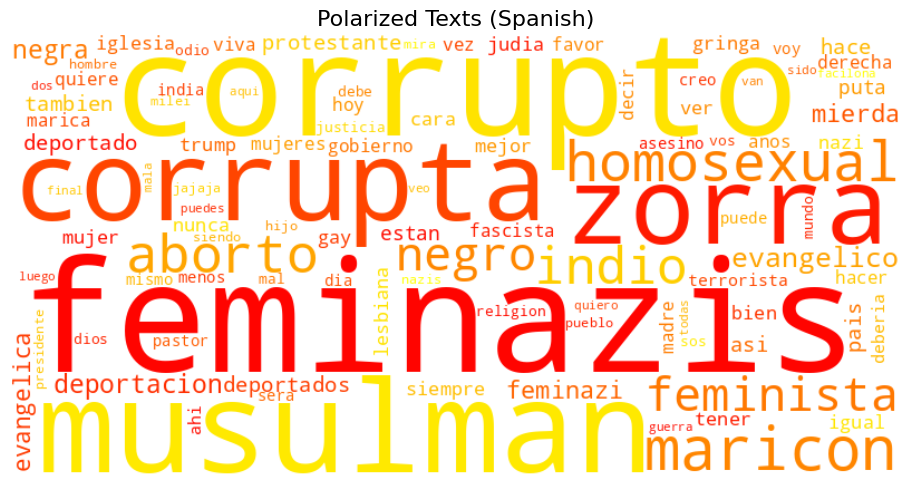

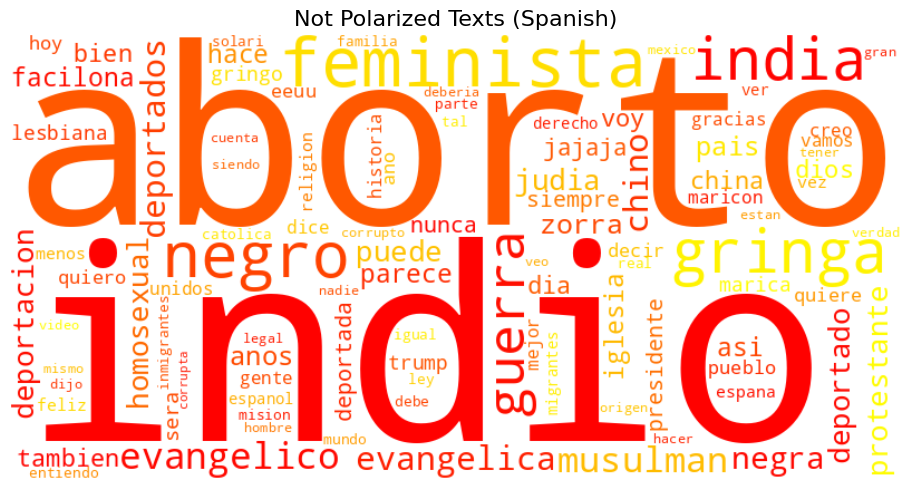

In [13]:
# Load Spanish data
df_spa = pd.read_csv("data/spa.csv", encoding="utf-8")

stop_words_spa = set(stopwords.words('spanish') + [
    'sí', 'no', 'bueno', 'pues', 'entonces', 'ahora', 'así', 'vale',
    'eh', 'oye', 'claro', 'ya', 'tan', 'aquí', 'allí', 'solo', 'también','judio', 'indigena', 'abortar', 'mas' ,
    'israel','islam','corrupcion','ser','si'
])

def clean_and_tokenize_spanish(text_series, stop_words):
    words = []
    for text in text_series:
        text = str(text).lower()
        text = re.sub(r'[^a-záéíóúüñ\s]', '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        words.extend(tokens)
    return words

polarized_words_spa = clean_and_tokenize_spanish(
    df_spa[df_spa['polarization'] == 1]['text'],
    stop_words_spa
)
not_polarized_words_spa = clean_and_tokenize_spanish(
    df_spa[df_spa['polarization'] == 0]['text'],
    stop_words_spa
)

polarized_counter_spa = Counter(polarized_words_spa)
not_polarized_counter_spa = Counter(not_polarized_words_spa)

# Polarized (Spanish)
wordcloud_pol_spa = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='autumn',
    max_words=100
).generate_from_frequencies(polarized_counter_spa)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pol_spa, interpolation='bilinear')
plt.axis("off")
plt.title("Polarized Texts (Spanish)", fontsize=16)
plt.tight_layout()
# plt.savefig("plots/spanish_wordcloud_polar.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Not Polarized (Spanish)
wordcloud_not_spa = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='autumn',
    max_words=100
).generate_from_frequencies(not_polarized_counter_spa)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_spa, interpolation='bilinear')
plt.axis("off")
plt.title("Not Polarized Texts (Spanish)", fontsize=16)
plt.tight_layout()
# plt.savefig("plots/spanish_wordcloud_not_polar.pdf", format="pdf", bbox_inches="tight")
plt.show()




> Overall (all languages combined)



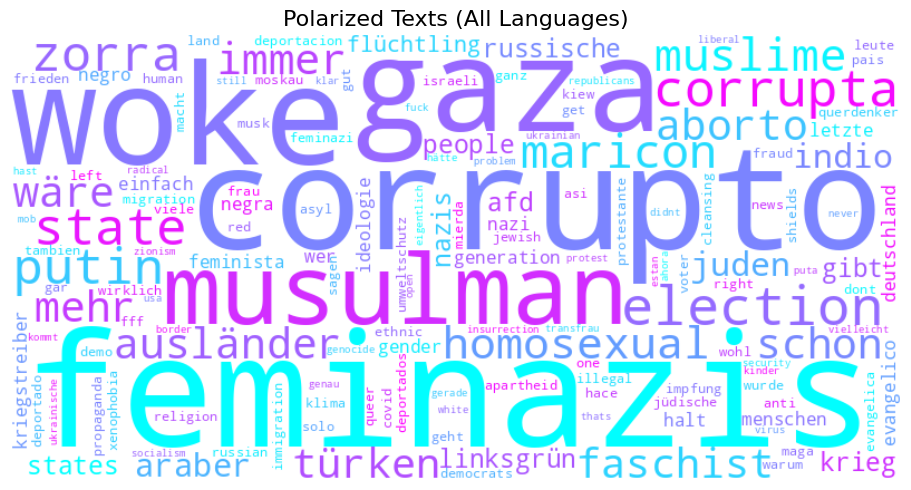

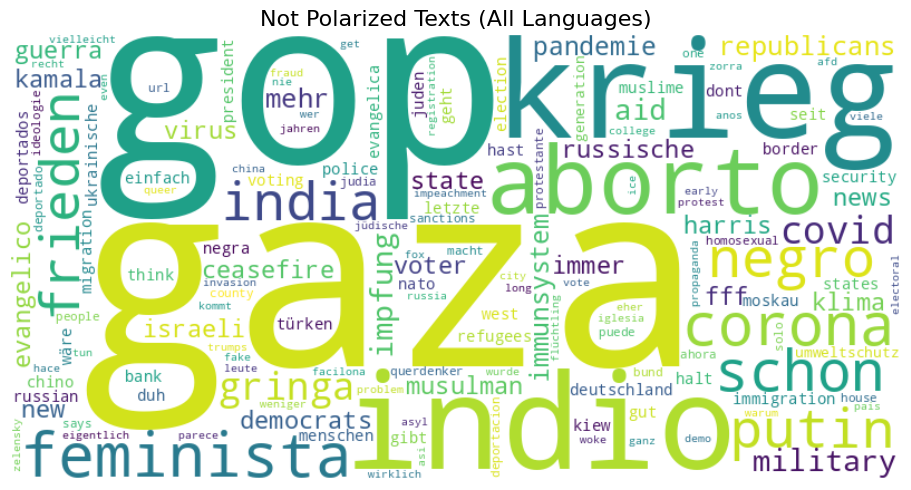

In [14]:
data = pd.concat([df_eng, df_deu, df_spa], ignore_index=True)

# Combine all stop words
stop_words_all = (
    set(w.strip().lower() for w in stopwords.words('english')+['trump','ukraine','donald','joe','biden','don\'t','would','like','israel']) |
    set(w.strip().lower() for w in stopwords.words('german')+['user','russland', 'israel', 'hamas','ja','also','mal','nein']) |
    set(w.strip().lower() for w in stopwords.words('spanish')+["judio",'si','ser',"indigena", "abortar", "mas",'islam','corrupcion','israel'])
)

def clean_and_tokenize_all(text_series, stop_words):
    words = []
    for text in text_series:
        text = str(text).lower()
        text = re.sub(r'[^a-záéíóúüñäöß\s]', '', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
        words.extend(tokens)
    return words

polarized_texts_all = data[data['polarization'] == 1]['text']
not_polarized_texts_all = data[data['polarization'] == 0]['text']

polarized_words_all = clean_and_tokenize_all(polarized_texts_all, stop_words_all)
not_polarized_words_all = clean_and_tokenize_all(not_polarized_texts_all, stop_words_all)

polarized_counter_all = Counter(polarized_words_all)
not_polarized_counter_all = Counter(not_polarized_words_all)

# Polarized Word Cloud (All Languages)
wordcloud_pol_all = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='cool',
    max_words=150
).generate_from_frequencies(polarized_counter_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pol_all, interpolation='bilinear')
plt.axis("off")
plt.title("Polarized Texts (All Languages)", fontsize=16)
plt.tight_layout()
# plt.savefig("plots/overall_wordcloud_polarized.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Not Polarized Word Cloud (All Languages)
wordcloud_not_all = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis',
    max_words=150
).generate_from_frequencies(not_polarized_counter_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_all, interpolation='bilinear')
plt.axis("off")
plt.title("Not Polarized Texts (All Languages)", fontsize=16)
plt.tight_layout()
# plt.savefig("plots/overall_wordcloud_not_polarized.pdf", format="pdf", bbox_inches="tight")
plt.show()


# **Fatima Sajjad ___ 503676**

<span style="font-size:20px; font-weight:700;"><em>For English DataSet</em></span>

ENGLISH DATASET ANALYSIS

DATA VALIDATION & CLEANING
✓ Required columns present: ['text', 'polarization']

Initial dataset shape: (2676, 3)

Column data types:
id              object
text            object
polarization     int64
dtype: object

Missing values per column:
id              0
text            0
polarization    0
dtype: int64

✓ Data cleaned:
  - Original rows: 2676
  - Cleaned rows: 2676
  - Removed rows: 0

SAMPLE CLEANED DATA
                                    id  \
0  en_973938b90b0ff5d87d35a582f83f5c89   
1  en_07dfd4600426caca6e2c5883fcbea9ea   
2  en_f14519ff2302b6cd47712073f13bc461   
3  en_e48b7e7542faafa544ac57b64bc80daf   
4  en_7c581fb77bce8033aeba3d6dbd6273eb   

                                                text  polarization  
0           is defending imperialism in the dnd chat             0  
1  Still playing with this. I am now following Ra...             0  
2  .senate.gov Theres 3 groups out there Republic...             0  
3  "ABC MD, David Anderson, 

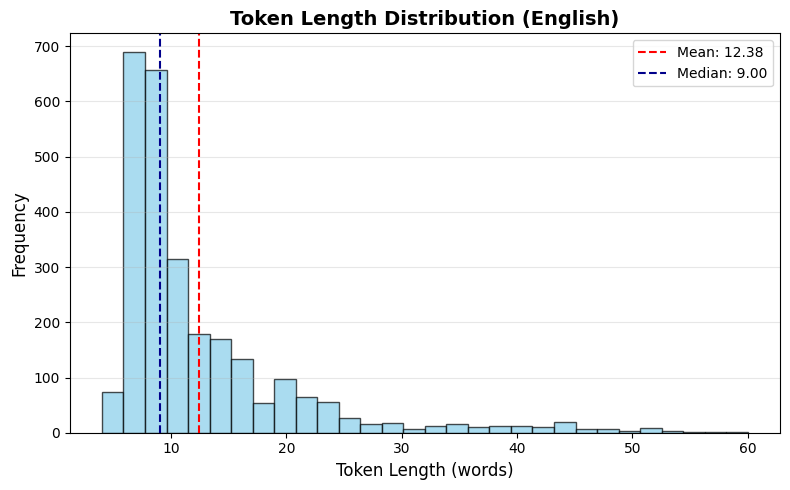


EXTRA: TEXT VS TOKEN LENGTH RELATIONSHIP
✓ Saved: plots/english/text_vs_token_length.pdf


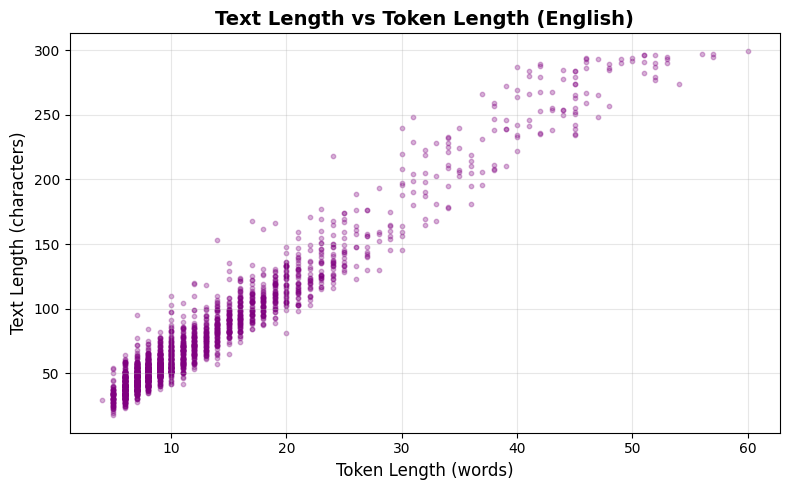


Average characters per word: 6.11
Correlation between text and token length: 0.974

TASK 3: SENTIMENT DISTRIBUTION
✓ Mapped numeric polarization to labels (0→negative, 1→positive)

Sentiment Distribution:
sentiment
negative    1674
positive    1002
Name: count, dtype: int64

Sentiment Proportions:
sentiment
negative    62.556054
positive    37.443946
Name: proportion, dtype: float64
✓ Saved: plots/english/sentiment_distribution.pdf


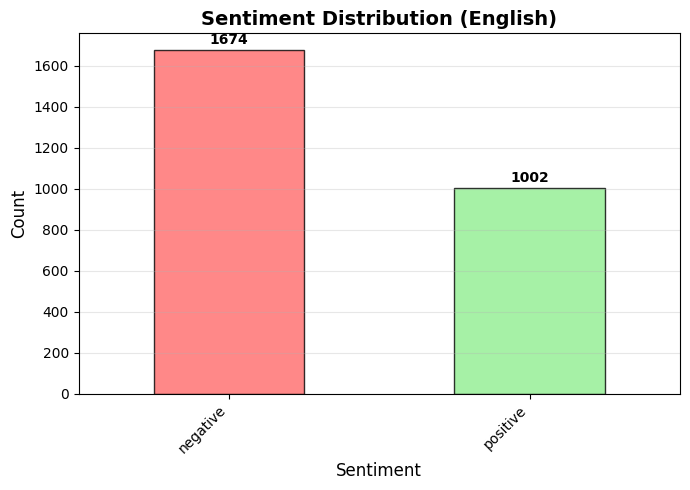


SUMMARY STATISTICS

Dataset Overview:
  - Total samples: 2676
  - Sentiment classes: 2
  - Class balance ratio: 0.60
  - Average token length: 12.38 words
  - Average text length: 75.68 characters

✓ Classes are reasonably balanced (ratio: 1.67)

ANALYSIS COMPLETE
All plots saved to: plots/english/


In [ ]:
# --- English Dataset Analysis

# Create folder for saving plots
lang = "english"
os.makedirs(f"plots/{lang}", exist_ok=True)

print("="*60)
print("ENGLISH DATASET ANALYSIS")
print("="*60)

# --- DATA VALIDATION & CLEANING ---
print("\n" + "="*60)
print("DATA VALIDATION & CLEANING")
print("="*60)
eng_df = pd.read_csv("data/eng.csv", encoding="windows-1252")
# Check required columns
required_cols = ['text', 'polarization']
missing_cols = [col for col in required_cols if col not in eng_df.columns]
if missing_cols:
    print(f"ERROR: Missing required columns: {missing_cols}")
    print(f"Available columns: {list(eng_df.columns)}")
    exit()

print(f"✓ Required columns present: {required_cols}")

# Initial data info
print(f"\nInitial dataset shape: {eng_df.shape}")
print(f"\nColumn data types:")
print(eng_df.dtypes)

# Check for missing values
print(f"\nMissing values per column:")
print(eng_df.isnull().sum())

# Store original size
original_size = len(eng_df)

# Clean the data
# 1. Remove rows with missing text or polarization
eng_df = eng_df.dropna(subset=['text', 'polarization'])

# 2. Convert text to string and strip whitespace
eng_df['text'] = eng_df['text'].astype(str).str.strip()

# 3. Remove empty strings
eng_df = eng_df[eng_df['text'] != '']
eng_df = eng_df[eng_df['text'].str.len() > 0]

# 4. Reset index after cleaning
eng_df = eng_df.reset_index(drop=True)

cleaned_size = len(eng_df)
removed_rows = original_size - cleaned_size

print(f"\n✓ Data cleaned:")
print(f"  - Original rows: {original_size}")
print(f"  - Cleaned rows: {cleaned_size}")
print(f"  - Removed rows: {removed_rows}")

# Preview cleaned data
print("\n" + "="*60)
print("SAMPLE CLEANED DATA")
print("="*60)
print(eng_df.head())

# --- Task 1: Token Length Statistics ---
print("\n" + "="*60)
print("TASK 1: TOKEN LENGTH STATISTICS")
print("="*60)

# Calculate lengths
eng_df['text_length'] = eng_df['text'].apply(len)
eng_df['token_length'] = eng_df['text'].apply(lambda x: len(x.split()))

# Check for potential issues
zero_tokens = (eng_df['token_length'] == 0).sum()
if zero_tokens > 0:
    print(f"⚠ Warning: {zero_tokens} texts have 0 tokens (will be removed)")
    eng_df = eng_df[eng_df['token_length'] > 0]

print("\nToken Length Statistics:")
print(eng_df['token_length'].describe())

print("\nText Length (Characters) Statistics:")
print(eng_df['text_length'].describe())

# Identify outliers (texts that are unusually long)
q75 = eng_df['token_length'].quantile(0.75)
q25 = eng_df['token_length'].quantile(0.25)
iqr = q75 - q25
outlier_threshold = q75 + 1.5 * iqr
outliers = eng_df[eng_df['token_length'] > outlier_threshold]

print(f"\nOutlier Detection:")
print(f"  - IQR threshold: {outlier_threshold:.2f} tokens")
print(f"  - Number of outliers: {len(outliers)} ({len(outliers)/len(eng_df)*100:.2f}%)")

# --- Task 2: Token Length Histogram ---
print("\n" + "="*60)
print("TASK 2: TOKEN LENGTH DISTRIBUTION")
print("="*60)

plt.figure(figsize=(8, 5))
plt.hist(eng_df['token_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Token Length Distribution (English)', fontsize=14, fontweight='bold')
plt.xlabel('Token Length (words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(eng_df['token_length'].mean(), color='red', linestyle='--',
            label=f'Mean: {eng_df["token_length"].mean():.2f}')
plt.axvline(eng_df['token_length'].median(), color='darkblue', linestyle='--',
            label=f'Median: {eng_df["token_length"].median():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
print(f"✓ Saved: plots/{lang}/token_length_distribution.pdf")
plt.show()

# --- Extra: Text vs Token Length Scatter Plot ---
print("\n" + "="*60)
print("EXTRA: TEXT VS TOKEN LENGTH RELATIONSHIP")
print("="*60)

plt.figure(figsize=(8, 5))
plt.scatter(eng_df['token_length'], eng_df['text_length'],
            color='purple', alpha=0.3, s=10)
plt.title('Text Length vs Token Length (English)', fontsize=14, fontweight='bold')
plt.xlabel('Token Length (words)', fontsize=12)
plt.ylabel('Text Length (characters)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
print(f"✓ Saved: plots/{lang}/text_vs_token_length.pdf")
plt.show()

# Calculate average characters per word
avg_chars_per_word = eng_df['text_length'].sum() / eng_df['token_length'].sum()
print(f"\nAverage characters per word: {avg_chars_per_word:.2f}")

# Calculate and print correlation
correlation = eng_df['token_length'].corr(eng_df['text_length'])
print(f"Correlation between text and token length: {correlation:.3f}")

# --- Task 3: Sentiment Distribution ---
print("\n" + "="*60)
print("TASK 3: SENTIMENT DISTRIBUTION")
print("="*60)

# Map polarization to readable labels (if numeric)
if eng_df['polarization'].dtype in ['int64', 'float64']:
    sentiment_map = {0: 'negative', 1: 'positive'}
    eng_df['sentiment'] = eng_df['polarization'].map(sentiment_map)
    sentiment_col = 'sentiment'
    print("✓ Mapped numeric polarization to labels (0→negative, 1→positive)")
else:
    sentiment_col = 'polarization'
    print("✓ Using existing polarization labels")

sentiment_counts = eng_df[sentiment_col].value_counts()
print(f"\nSentiment Distribution:")
print(sentiment_counts)
print(f"\nSentiment Proportions:")
print(eng_df[sentiment_col].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
colors = ['#ff6b6b', '#90ee90']  # salmon and lightgreen
sentiment_counts.plot(kind='bar', color=colors[:len(sentiment_counts)],
                      edgecolor='black', alpha=0.8)
plt.title('Sentiment Distribution (English)', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(sentiment_counts):
    plt.text(i, v + max(sentiment_counts)*0.01, str(v),
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
print(f"✓ Saved: plots/{lang}/sentiment_distribution.pdf")
plt.show()

# --- Summary Statistics ---
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"\nDataset Overview:")
print(f"  - Total samples: {len(eng_df)}")
print(f"  - Sentiment classes: {eng_df[sentiment_col].nunique()}")
print(f"  - Class balance ratio: {sentiment_counts.min() / sentiment_counts.max():.2f}")
print(f"  - Average token length: {eng_df['token_length'].mean():.2f} words")
print(f"  - Average text length: {eng_df['text_length'].mean():.2f} characters")

# Check class imbalance
max_class = sentiment_counts.max()
min_class = sentiment_counts.min()
imbalance_ratio = max_class / min_class

if imbalance_ratio > 3:
    print(f"\n⚠ WARNING: Significant class imbalance detected (ratio: {imbalance_ratio:.2f})")
    print("  Consider using techniques like oversampling, undersampling, or class weights")
else:
    print(f"\n✓ Classes are reasonably balanced (ratio: {imbalance_ratio:.2f})")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)
print(f"All plots saved to: plots/{lang}/")

<span style="font-size:20px; font-weight:700;"><em>For Spanish DataSet</em></span>

SPANISH DATASET ANALYSIS

DATA VALIDATION & CLEANING
✓ Required columns present: ['text', 'polarization']

Initial dataset shape: (3305, 3)

Column data types:
id              object
text            object
polarization     int64
dtype: object

Missing values per column:
id              0
text            0
polarization    0
dtype: int64

✓ Data cleaned:
  - Original rows: 3305
  - Cleaned rows: 3305
  - Removed rows: 0

SAMPLE CLEANED DATA
                                     id  \
0  spa_bc7bf0a1b710cd724cf96b5eeb020bff   
1  spa_688aec0f6abf4e0be44ecbfa886251cc   
2  spa_47019efabe7295c630bcc04bd0429230   
3  spa_8b4b244dbb90e0a813661ed12a1af5af   
4  spa_e2f37881da08b8d7b6eb07bc37356746   

                                                text  polarization  
0  "bueno, tirando"\r\ny si hay repregunta, enton...             0  
1                "caimos en su retorica de indigena"             0  
2   "cara de indigena sudaca", porque pio asi luego?             0  
3  "violar a una nina 

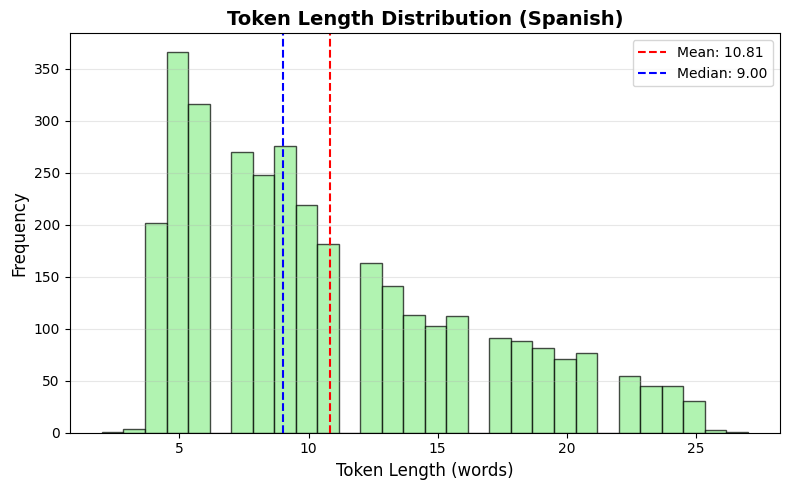


EXTRA: TEXT VS TOKEN LENGTH RELATIONSHIP
✓ Saved: plots/spanish/text_vs_token_length.pdf


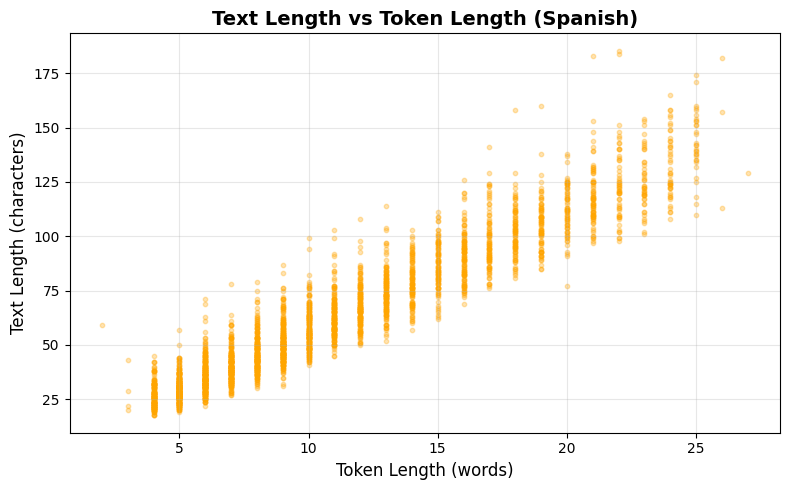


Average characters per word: 5.72

TASK 3: SENTIMENT DISTRIBUTION

Sentiment Distribution:
polarization
1    1660
0    1645
Name: count, dtype: int64

Sentiment Proportions:
polarization
1    50.226929
0    49.773071
Name: proportion, dtype: float64
✓ Saved: plots/spanish/sentiment_distribution.pdf


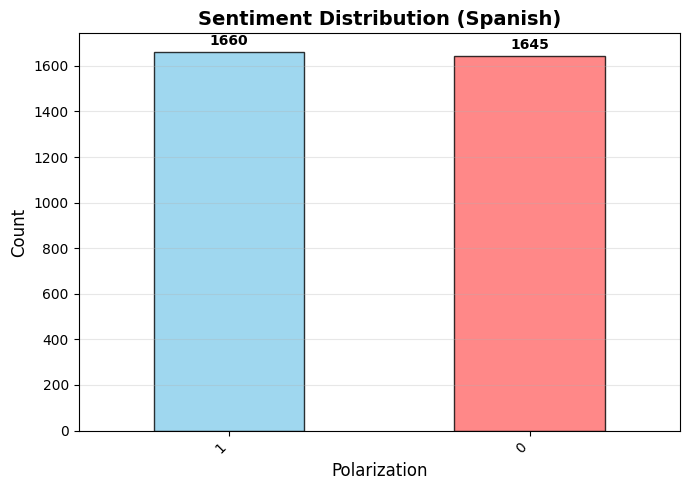


SUMMARY STATISTICS

Dataset Overview:
  - Total samples: 3305
  - Sentiment classes: 2
  - Class balance ratio: 0.99
  - Average token length: 10.81 words
  - Average text length: 61.88 characters

✓ Classes are reasonably balanced (ratio: 1.01)

ANALYSIS COMPLETE
All plots saved to: plots/spanish/


In [ ]:
# --- Spanish Dataset Analysis
# Create folder for saving plots
lang = "spanish"
os.makedirs(f"plots/{lang}", exist_ok=True)
spa_df = pd.read_csv("data/spa.csv", encoding="utf-8-sig")
print("="*60)
print("SPANISH DATASET ANALYSIS")
print("="*60)

# --- DATA VALIDATION & CLEANING ---
print("\n" + "="*60)
print("DATA VALIDATION & CLEANING")
print("="*60)

# Check required columns
required_cols = ['text', 'polarization']
missing_cols = [col for col in required_cols if col not in spa_df.columns]
if missing_cols:
    print(f"ERROR: Missing required columns: {missing_cols}")
    print(f"Available columns: {list(spa_df.columns)}")
    exit()

print(f"✓ Required columns present: {required_cols}")

# Initial data info
print(f"\nInitial dataset shape: {spa_df.shape}")
print(f"\nColumn data types:")
print(spa_df.dtypes)

# Check for missing values
print(f"\nMissing values per column:")
print(spa_df.isnull().sum())

# Store original size
original_size = len(spa_df)

# Clean the data
# 1. Remove rows with missing text or polarization
spa_df = spa_df.dropna(subset=['text', 'polarization'])

# 2. Convert text to string and strip whitespace
spa_df['text'] = spa_df['text'].astype(str).str.strip()

# 3. Remove empty strings
spa_df = spa_df[spa_df['text'] != '']
spa_df = spa_df[spa_df['text'].str.len() > 0]

# 4. Reset index after cleaning
spa_df = spa_df.reset_index(drop=True)

cleaned_size = len(spa_df)
removed_rows = original_size - cleaned_size

print(f"\n✓ Data cleaned:")
print(f"  - Original rows: {original_size}")
print(f"  - Cleaned rows: {cleaned_size}")
print(f"  - Removed rows: {removed_rows}")

# Preview cleaned data
print("\n" + "="*60)
print("SAMPLE CLEANED DATA")
print("="*60)
print(spa_df.head())

# --- Task 1: Token Length Statistics ---
print("\n" + "="*60)
print("TASK 1: TOKEN LENGTH STATISTICS")
print("="*60)

# Calculate lengths
spa_df['text_length'] = spa_df['text'].apply(len)
spa_df['token_length'] = spa_df['text'].apply(lambda x: len(x.split()))

# Check for potential issues
zero_tokens = (spa_df['token_length'] == 0).sum()
if zero_tokens > 0:
    print(f"⚠ Warning: {zero_tokens} texts have 0 tokens (will be removed)")
    spa_df = spa_df[spa_df['token_length'] > 0]

print("\nToken Length Statistics:")
print(spa_df['token_length'].describe())

print("\nText Length (Characters) Statistics:")
print(spa_df['text_length'].describe())

# Identify outliers (texts that are unusually long)
q75 = spa_df['token_length'].quantile(0.75)
q25 = spa_df['token_length'].quantile(0.25)
iqr = q75 - q25
outlier_threshold = q75 + 1.5 * iqr
outliers = spa_df[spa_df['token_length'] > outlier_threshold]

print(f"\nOutlier Detection:")
print(f"  - IQR threshold: {outlier_threshold:.2f} tokens")
print(f"  - Number of outliers: {len(outliers)} ({len(outliers)/len(spa_df)*100:.2f}%)")

# --- Task 2: Token Length Histogram ---
print("\n" + "="*60)
print("TASK 2: TOKEN LENGTH DISTRIBUTION")
print("="*60)

plt.figure(figsize=(8, 5))
plt.hist(spa_df['token_length'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Token Length Distribution (Spanish)', fontsize=14, fontweight='bold')
plt.xlabel('Token Length (words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(spa_df['token_length'].mean(), color='red', linestyle='--',
            label=f'Mean: {spa_df["token_length"].mean():.2f}')
plt.axvline(spa_df['token_length'].median(), color='blue', linestyle='--',
            label=f'Median: {spa_df["token_length"].median():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
print(f"✓ Saved: plots/{lang}/token_length_distribution.pdf")
plt.show()

# --- Extra: Text vs Token Length Scatter Plot ---
print("\n" + "="*60)
print("EXTRA: TEXT VS TOKEN LENGTH RELATIONSHIP")
print("="*60)

plt.figure(figsize=(8, 5))
plt.scatter(spa_df['token_length'], spa_df['text_length'],
            color='orange', alpha=0.3, s=10)
plt.title('Text Length vs Token Length (Spanish)', fontsize=14, fontweight='bold')
plt.xlabel('Token Length (words)', fontsize=12)
plt.ylabel('Text Length (characters)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
print(f"✓ Saved: plots/{lang}/text_vs_token_length.pdf")
plt.show()

# Calculate average characters per word
avg_chars_per_word = spa_df['text_length'].sum() / spa_df['token_length'].sum()
print(f"\nAverage characters per word: {avg_chars_per_word:.2f}")

# --- Task 3: Sentiment Distribution ---
print("\n" + "="*60)
print("TASK 3: SENTIMENT DISTRIBUTION")
print("="*60)

sentiment_counts = spa_df['polarization'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)
print("\nSentiment Proportions:")
print(spa_df['polarization'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
colors = ['#87ceeb', '#ff6b6b', '#95d5b2']
sentiment_counts.plot(kind='bar', color=colors[:len(sentiment_counts)],
                      edgecolor='black', alpha=0.8)
plt.title('Sentiment Distribution (Spanish)', fontsize=14, fontweight='bold')
plt.xlabel('Polarization', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
# Add count labels on bars
for i, v in enumerate(sentiment_counts):
    plt.text(i, v + max(sentiment_counts)*0.01, str(v),
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
print(f"✓ Saved: plots/{lang}/sentiment_distribution.pdf")
plt.show()

# --- Summary Statistics ---
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"\nDataset Overview:")
print(f"  - Total samples: {len(spa_df)}")
print(f"  - Sentiment classes: {spa_df['polarization'].nunique()}")
print(f"  - Class balance ratio: {sentiment_counts.min() / sentiment_counts.max():.2f}")
print(f"  - Average token length: {spa_df['token_length'].mean():.2f} words")
print(f"  - Average text length: {spa_df['text_length'].mean():.2f} characters")

# Check class imbalance
max_class = sentiment_counts.max()
min_class = sentiment_counts.min()
imbalance_ratio = max_class / min_class

if imbalance_ratio > 3:
    print(f"\n⚠ WARNING: Significant class imbalance detected (ratio: {imbalance_ratio:.2f})")
    print("  Consider using techniques like oversampling, undersampling, or class weights")
else:
    print(f"\n✓ Classes are reasonably balanced (ratio: {imbalance_ratio:.2f})")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)
print(f"All plots saved to: plots/{lang}/")

<span style="font-size:20px; font-weight:700;"><em>For German DataSet</em></span>

GERMAN DATASET ANALYSIS
✓ Dataset loaded successfully: 3180 rows

DATA VALIDATION & CLEANING
✓ Required columns present: ['text', 'polarization']

Initial dataset shape: (3180, 3)

Column data types:
id              object
text            object
polarization     int64
dtype: object

Missing values per column:
id              0
text            0
polarization    0
dtype: int64

✓ Data cleaned:
  - Original rows: 3180
  - Cleaned rows: 3180
  - Removed rows: 0

SAMPLE CLEANED DATA
                                     id  \
0  deu_fa07b0533db91281c049fb722ca121d7   
1  deu_10e753b5d49374d2de1f68dfc1e2d249   
2  deu_61be00002367a33400dade564edccc59   
3  deu_d28b20af64d590134448fcdbfbb0f7dd   
4  deu_005fc728be211eae1c308a0fc20d73df   

                                                text  polarization  
0  Natürlich bin ich linksgrün - ich habe Herz u n d             0  
1  Schuld sind Habeck,  die grünen und diese link...             1  
2  Vielleicht ist da ja tatsächlich was dran. Höc..

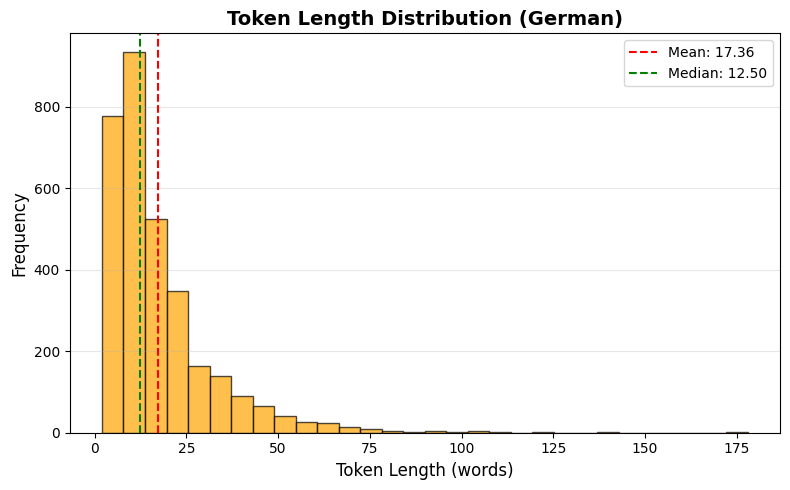


EXTRA: TEXT VS TOKEN LENGTH RELATIONSHIP
✓ Saved: plots/german/text_vs_token_length.pdf


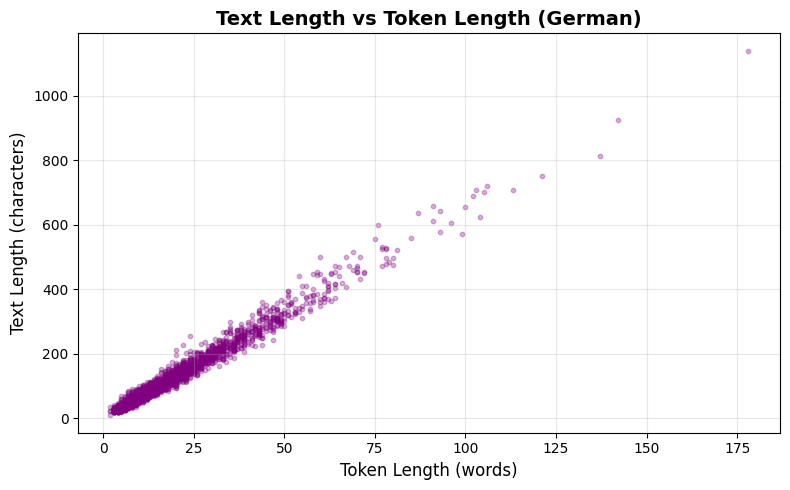


Average characters per word: 6.56

TASK 3: SENTIMENT DISTRIBUTION

Sentiment Distribution:
polarization
0    1668
1    1512
Name: count, dtype: int64

Sentiment Proportions:
polarization
0    52.45283
1    47.54717
Name: proportion, dtype: float64
✓ Saved: plots/german/sentiment_distribution.pdf


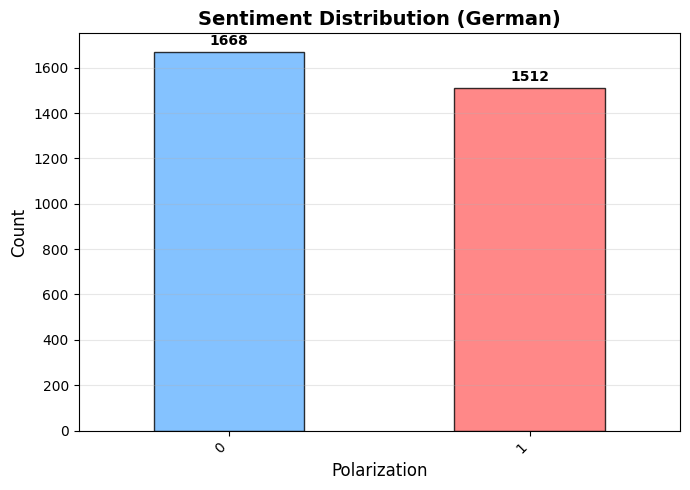


SUMMARY STATISTICS

Dataset Overview:
  - Total samples: 3180
  - Sentiment classes: 2
  - Class balance ratio: 0.91
  - Average token length: 17.36 words
  - Average text length: 113.94 characters

✓ Classes are reasonably balanced (ratio: 1.10)

ANALYSIS COMPLETE
All plots saved to: plots/german/


In [ ]:
# --- German Dataset Analysis
# Create folder for saving plots
lang = "german"
os.makedirs(f"plots/{lang}", exist_ok=True)


print("="*60)
print("GERMAN DATASET ANALYSIS")
print("="*60)

# Load German dataset
try:
    deu_df = pd.read_csv("data/deu.csv", encoding="utf-8")
    print(f"✓ Dataset loaded successfully: {len(deu_df)} rows")
except FileNotFoundError:
    print("ERROR: File 'deu.csv' not found!")
    exit()

# --- DATA VALIDATION & CLEANING ---
print("\n" + "="*60)
print("DATA VALIDATION & CLEANING")
print("="*60)

# Check required columns
required_cols = ['text', 'polarization']
missing_cols = [col for col in required_cols if col not in deu_df.columns]
if missing_cols:
    print(f"ERROR: Missing required columns: {missing_cols}")
    print(f"Available columns: {list(deu_df.columns)}")
    exit()

print(f"✓ Required columns present: {required_cols}")

# Initial data info
print(f"\nInitial dataset shape: {deu_df.shape}")
print(f"\nColumn data types:")
print(deu_df.dtypes)

# Check for missing values
print(f"\nMissing values per column:")
print(deu_df.isnull().sum())

# Store original size
original_size = len(deu_df)

# Clean the data
# 1. Remove rows with missing text or polarization
deu_df = deu_df.dropna(subset=['text', 'polarization'])

# 2. Convert text to string and strip whitespace
deu_df['text'] = deu_df['text'].astype(str).str.strip()

# 3. Remove empty strings
deu_df = deu_df[deu_df['text'] != '']
deu_df = deu_df[deu_df['text'].str.len() > 0]

# 4. Reset index after cleaning
deu_df = deu_df.reset_index(drop=True)

cleaned_size = len(deu_df)
removed_rows = original_size - cleaned_size

print(f"\n✓ Data cleaned:")
print(f"  - Original rows: {original_size}")
print(f"  - Cleaned rows: {cleaned_size}")
print(f"  - Removed rows: {removed_rows}")

# Preview cleaned data
print("\n" + "="*60)
print("SAMPLE CLEANED DATA")
print("="*60)
print(deu_df.head())

# --- Task 1: Token Length Statistics ---
print("\n" + "="*60)
print("TASK 1: TOKEN LENGTH STATISTICS")
print("="*60)

# Calculate lengths
deu_df['text_length'] = deu_df['text'].apply(len)
deu_df['token_length'] = deu_df['text'].apply(lambda x: len(x.split()))

# Check for potential issues
zero_tokens = (deu_df['token_length'] == 0).sum()
if zero_tokens > 0:
    print(f"⚠ Warning: {zero_tokens} texts have 0 tokens (will be removed)")
    deu_df = deu_df[deu_df['token_length'] > 0]

print("\nToken Length Statistics:")
print(deu_df['token_length'].describe())

print("\nText Length (Characters) Statistics:")
print(deu_df['text_length'].describe())

# Identify outliers (texts that are unusually long)
q75 = deu_df['token_length'].quantile(0.75)
q25 = deu_df['token_length'].quantile(0.25)
iqr = q75 - q25
outlier_threshold = q75 + 1.5 * iqr
outliers = deu_df[deu_df['token_length'] > outlier_threshold]

print(f"\nOutlier Detection:")
print(f"  - IQR threshold: {outlier_threshold:.2f} tokens")
print(f"  - Number of outliers: {len(outliers)} ({len(outliers)/len(deu_df)*100:.2f}%)")

# --- Task 2: Token Length Histogram ---
print("\n" + "="*60)
print("TASK 2: TOKEN LENGTH DISTRIBUTION")
print("="*60)

plt.figure(figsize=(8, 5))
plt.hist(deu_df['token_length'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Token Length Distribution (German)', fontsize=14, fontweight='bold')
plt.xlabel('Token Length (words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(deu_df['token_length'].mean(), color='red', linestyle='--',
            label=f'Mean: {deu_df["token_length"].mean():.2f}')
plt.axvline(deu_df['token_length'].median(), color='green', linestyle='--',
            label=f'Median: {deu_df["token_length"].median():.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
print(f"✓ Saved: plots/{lang}/token_length_distribution.pdf")
plt.show()

# --- Extra: Text vs Token Length Scatter Plot ---
print("\n" + "="*60)
print("EXTRA: TEXT VS TOKEN LENGTH RELATIONSHIP")
print("="*60)

plt.figure(figsize=(8, 5))
plt.scatter(deu_df['token_length'], deu_df['text_length'],
            color='purple', alpha=0.3, s=10)
plt.title('Text Length vs Token Length (German)', fontsize=14, fontweight='bold')
plt.xlabel('Token Length (words)', fontsize=12)
plt.ylabel('Text Length (characters)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
print(f"✓ Saved: plots/{lang}/text_vs_token_length.pdf")
plt.show()

# Calculate average characters per word
avg_chars_per_word = deu_df['text_length'].sum() / deu_df['token_length'].sum()
print(f"\nAverage characters per word: {avg_chars_per_word:.2f}")

# --- Task 3: Sentiment Distribution ---
print("\n" + "="*60)
print("TASK 3: SENTIMENT DISTRIBUTION")
print("="*60)

sentiment_counts = deu_df['polarization'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)
print("\nSentiment Proportions:")
print(deu_df['polarization'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
colors = ['#66b3ff', '#ff6b6b', '#95d5b2']
sentiment_counts.plot(kind='bar', color=colors[:len(sentiment_counts)],
                      edgecolor='black', alpha=0.8)
plt.title('Sentiment Distribution (German)', fontsize=14, fontweight='bold')
plt.xlabel('Polarization', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(sentiment_counts):
    plt.text(i, v + max(sentiment_counts)*0.01, str(v),
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
print(f"✓ Saved: plots/{lang}/sentiment_distribution.pdf")
plt.show()

# --- Summary Statistics ---
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"\nDataset Overview:")
print(f"  - Total samples: {len(deu_df)}")
print(f"  - Sentiment classes: {deu_df['polarization'].nunique()}")
print(f"  - Class balance ratio: {sentiment_counts.min() / sentiment_counts.max():.2f}")
print(f"  - Average token length: {deu_df['token_length'].mean():.2f} words")
print(f"  - Average text length: {deu_df['text_length'].mean():.2f} characters")

# Check class imbalance
max_class = sentiment_counts.max()
min_class = sentiment_counts.min()
imbalance_ratio = max_class / min_class

if imbalance_ratio > 3:
    print(f"\n⚠ WARNING: Significant class imbalance detected (ratio: {imbalance_ratio:.2f})")
    print("  Consider using techniques like oversampling, undersampling, or class weights")
else:
    print(f"\n✓ Classes are reasonably balanced (ratio: {imbalance_ratio:.2f})")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)
print(f"All plots saved to: plots/{lang}/")

<span style="font-size:20px; font-weight:700;"><em>Combining all 3 DataSets</em></span>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from PyPDF2 import PdfMerger
import os

# === Combined Multi-Language Dataset Analysis ===
print("="*60)
print("COMBINED MULTI-LANGUAGE DATASET ANALYSIS")
print("="*60)

# Create the plots folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

# --- LOAD AND COMBINE ALL DATASETS ---
print("\n" + "="*60)
print("LOADING DATASETS")
print("="*60)

datasets = []
languages = ['english', 'spanish', 'german']
file_names = {
    'english': 'data/eng.csv',
    'spanish': 'data/spa.csv',
    'german': 'data/deu.csv'
}

print("Current working directory:", os.getcwd())
print("\nAttempting to load files:")

for lang in languages:
    try:
        file_path = file_names[lang]
        print(f"\nTrying {lang}: {file_path}")
        print(f"  File exists? {os.path.exists(file_path)}")

        temp_df = pd.read_csv(file_path, encoding="utf-8")
        temp_df['language'] = lang
        datasets.append(temp_df)
        print(f"  ✓ Loaded {lang}: {len(temp_df)} rows")
    except FileNotFoundError as e:
        print(f"  ✗ FileNotFoundError: {e}")
    except Exception as e:
        print(f"  ✗ Error: {type(e).__name__}: {e}")

print(f"\nTotal datasets loaded: {len(datasets)}")

if not datasets:
    print("ERROR: No datasets were loaded successfully!")
    exit()

# Combine all datasets
df = pd.concat(datasets, ignore_index=True)
print(f"\n✓ Combined dataset created: {len(df)} total rows")

# --- DATA VALIDATION & CLEANING ---
print("\n" + "="*60)
print("DATA VALIDATION & CLEANING")
print("="*60)

# Check required columns
required_cols = ['text', 'polarization']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"ERROR: Missing required columns: {missing_cols}")
    print(f"Available columns: {list(df.columns)}")
    exit()

print(f"✓ Required columns present: {required_cols}")

# Store original size
original_size = len(df)

# Clean the data
# 1. Remove rows with missing text or polarization
df = df.dropna(subset=['text', 'polarization'])

# 2. Convert text to string and strip whitespace
df['text'] = df['text'].astype(str).str.strip()

# 3. Remove empty strings
df = df[df['text'] != '']
df = df[df['text'].str.len() > 0]

# 4. Reset index after cleaning
df = df.reset_index(drop=True)

cleaned_size = len(df)
removed_rows = original_size - cleaned_size

print(f"\n✓ Data cleaned:")
print(f"  - Original rows: {original_size}")
print(f"  - Cleaned rows: {cleaned_size}")
print(f"  - Removed rows: {removed_rows}")

# --- CALCULATE TOKEN STATISTICS ---
print("\n" + "="*60)
print("CALCULATING TOKEN STATISTICS")
print("="*60)

df['text_length'] = df['text'].apply(len)
df['token_length'] = df['text'].apply(lambda x: len(x.split()))

# Remove zero-token texts
zero_tokens = (df['token_length'] == 0).sum()
if zero_tokens > 0:
    print(f"⚠ Warning: Removing {zero_tokens} texts with 0 tokens")
    df = df[df['token_length'] > 0]

# Calculate statistics per language
token_stats = df.groupby('language')['token_length'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nToken Length Statistics per Language:")
print(token_stats)

# --- CREATE COMBINED COMPARISON PLOTS ---
print("\n" + "="*60)
print("CREATING COMBINED COMPARISON PLOTS")
print("="*60)

# Save all combined graphs to a single PDF
with PdfPages("plots/combined_graphs.pdf") as pdf:

    # === Plot 1: Token Length Distribution (Boxplot) ===
    print("Creating Plot 1: Token Length Boxplot...")
    plt.figure(figsize=(10, 6))

    # Create boxplot with better styling
    bp = df.boxplot(column="token_length", by="language", grid=False,
                     patch_artist=True, return_type='dict')

    # Color the boxes
    colors = ['#66c2a5', '#fc8d62', '#8da0cb']
    for patch, color in zip(bp['token_length']['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    plt.suptitle("")  # Remove automatic title
    plt.title("Token Length Distribution per Language", fontsize=14, fontweight='bold', pad=20)
    plt.xlabel("Language", fontsize=12)
    plt.ylabel("Token Length (words)", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    print("✓ Plot 1 saved")

    # === Plot 2: Average Token Length (Bar Chart) ===
    print("Creating Plot 2: Average Token Length Bar Chart...")
    plt.figure(figsize=(10, 6))

    ax = token_stats["mean"].plot(kind="bar", color=colors, edgecolor='black', alpha=0.8)
    plt.title("Average Token Length per Language", fontsize=14, fontweight='bold')
    plt.xlabel("Language", fontsize=12)
    plt.ylabel("Average Token Length (words)", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(token_stats["mean"]):
        ax.text(i, v + token_stats["mean"].max()*0.01, f'{v:.2f}',
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    pdf.savefig()
    plt.close()
    print("✓ Plot 2 saved")

    # === Plot 3: Sentiment Distribution Across Languages ===
    print("Creating Plot 3: Sentiment Distribution...")
    plt.figure(figsize=(10, 6))

    # Create sentiment distribution
    sentiment_dist = df.groupby(["language", "polarization"]).size().unstack(fill_value=0)

    ax = sentiment_dist.plot(kind="bar", stacked=True,
                              color=['#ff6b6b', '#90ee90'],
                              edgecolor='black', alpha=0.8)
    plt.title("Sentiment Distribution Across Languages", fontsize=14, fontweight='bold')
    plt.xlabel("Language", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Polarization", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    print("✓ Plot 3 saved")

    # === Plot 4: Token Length Distribution (Histogram Overlay) ===
    print("Creating Plot 4: Token Length Histogram Comparison...")
    plt.figure(figsize=(10, 6))

    for lang, color in zip(languages, colors):
        lang_data = df[df['language'] == lang]['token_length']
        plt.hist(lang_data, bins=30, alpha=0.5, label=lang.capitalize(),
                color=color, edgecolor='black')

    plt.title("Token Length Distribution Comparison", fontsize=14, fontweight='bold')
    plt.xlabel("Token Length (words)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    print("✓ Plot 4 saved")

    # === Plot 5: Average Text vs Token Length per Language ===
    print("Creating Plot 5: Text vs Token Length Comparison...")
    plt.figure(figsize=(10, 6))

    for lang, color in zip(languages, colors):
        lang_data = df[df['language'] == lang]
        plt.scatter(lang_data['token_length'], lang_data['text_length'],
                   alpha=0.3, label=lang.capitalize(), color=color, s=10)

    plt.title("Text Length vs Token Length (All Languages)", fontsize=14, fontweight='bold')
    plt.xlabel("Token Length (words)", fontsize=12)
    plt.ylabel("Text Length (characters)", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    pdf.savefig()
    plt.close()
    print("✓ Plot 5 saved")

print("\n✓ All combined graphs saved to 'plots/combined_graphs.pdf'")

# --- SUMMARY STATISTICS ---
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"\nOverall Dataset:")
print(f"  - Total samples: {len(df)}")
print(f"  - Languages: {df['language'].nunique()}")

print(f"\nSamples per Language:")
for lang in languages:
    count = len(df[df['language'] == lang])
    pct = count / len(df) * 100
    print(f"  - {lang.capitalize()}: {count} ({pct:.1f}%)")

print(f"\nAverage Characters per Word:")
for lang in languages:
    lang_data = df[df['language'] == lang]
    avg_chars = lang_data['text_length'].sum() / lang_data['token_length'].sum()
    print(f"  - {lang.capitalize()}: {avg_chars:.2f}")

print(f"\nSentiment Balance per Language:")
for lang in languages:
    lang_data = df[df['language'] == lang]
    sentiment_counts = lang_data['polarization'].value_counts()
    if len(sentiment_counts) > 1:
        balance = sentiment_counts.min() / sentiment_counts.max()
        print(f"  - {lang.capitalize()}: {balance:.2f} (1.0 = perfect balance)")
    else:
        print(f"  - {lang.capitalize()}: Only one sentiment class present")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)
print(f"Output file: plots/combined_graphs.pdf (5 comparison plots)")

COMBINED MULTI-LANGUAGE DATASET ANALYSIS

LOADING DATASETS
Current working directory: D:\CS Nust Assignments\3rd semester\Assignments\AI\Testing\SemEval-POLAR-Task9-Subtask1_NUSTBYTES\SemEval-POLAR-Task9-Subtask1_NUSTBYTES

Attempting to load files:

Trying english: data/eng.csv
  File exists? True
  ✓ Loaded english: 2676 rows

Trying spanish: data/spa.csv
  File exists? True
  ✓ Loaded spanish: 3305 rows

Trying german: data/deu.csv
  File exists? True
  ✓ Loaded german: 3180 rows

Total datasets loaded: 3

✓ Combined dataset created: 9161 total rows

DATA VALIDATION & CLEANING
✓ Required columns present: ['text', 'polarization']

✓ Data cleaned:
  - Original rows: 9161
  - Cleaned rows: 9161
  - Removed rows: 0

CALCULATING TOKEN STATISTICS

Token Length Statistics per Language:
               mean  median        std  min  max
language                                        
english   12.379297     9.0   8.447972    4   60
german    17.360692    12.5  15.094452    2  178
spanish   1

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>



---

<font size = "5"><b>
Raihana Walizada ___
534532</b></font>


---

In [ ]:
print("English:", df_eng.shape)
print("Spanish:", df_spa.shape)
print("German:", df_deu.shape)

NameError: name 'df_eng' is not defined



---

<font size = "3"><b>
Label Distribution
</b></font>


---

==============================================================

💾 Saved to Colab: /content/plots/label_distribution_english.pdf
💾 Saved to Repo:  plots/plots_Raihana/english/label_distribution_english.pdf


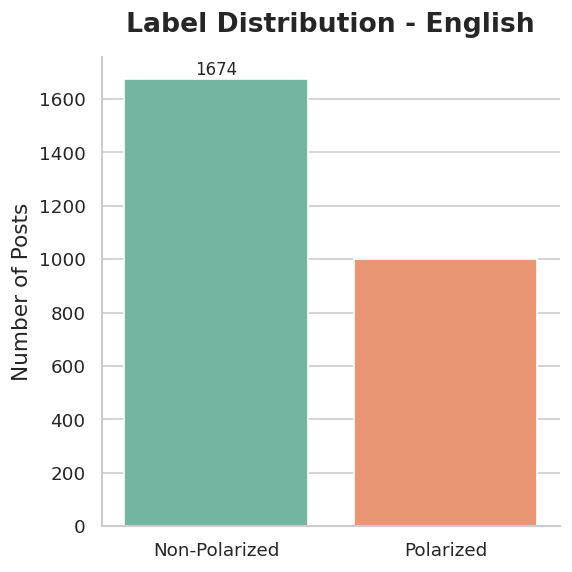

📊 Displayed: Label Distribution (English)
💾 Saved to Colab: /content/plots/label_distribution_spanish.pdf
💾 Saved to Repo:  plots/plots_Raihana/spanish/label_distribution_spanish.pdf


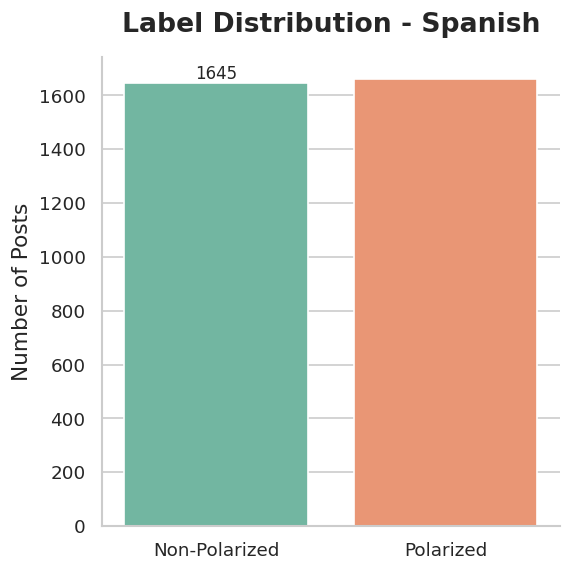

📊 Displayed: Label Distribution (Spanish)
💾 Saved to Colab: /content/plots/label_distribution_german.pdf
💾 Saved to Repo:  plots/plots_Raihana/german/label_distribution_german.pdf


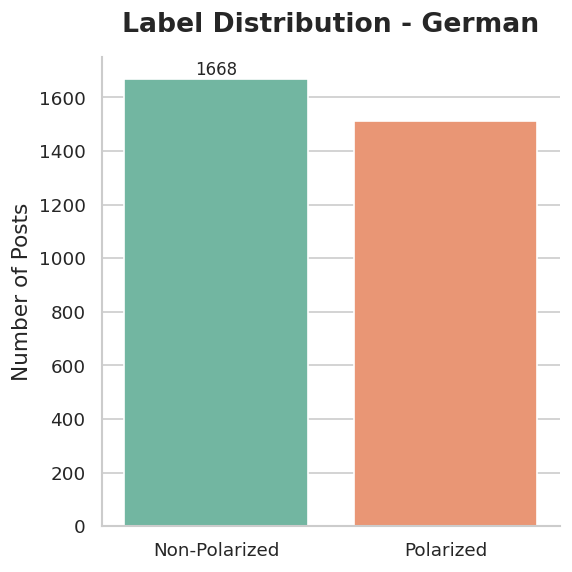

📊 Displayed: Label Distribution (German)
💾 Saved to Colab: /content/plots/label_distribution_combined.pdf
💾 Saved to Repo:  plots/plots_Raihana/overall/label_distribution_combined.pdf


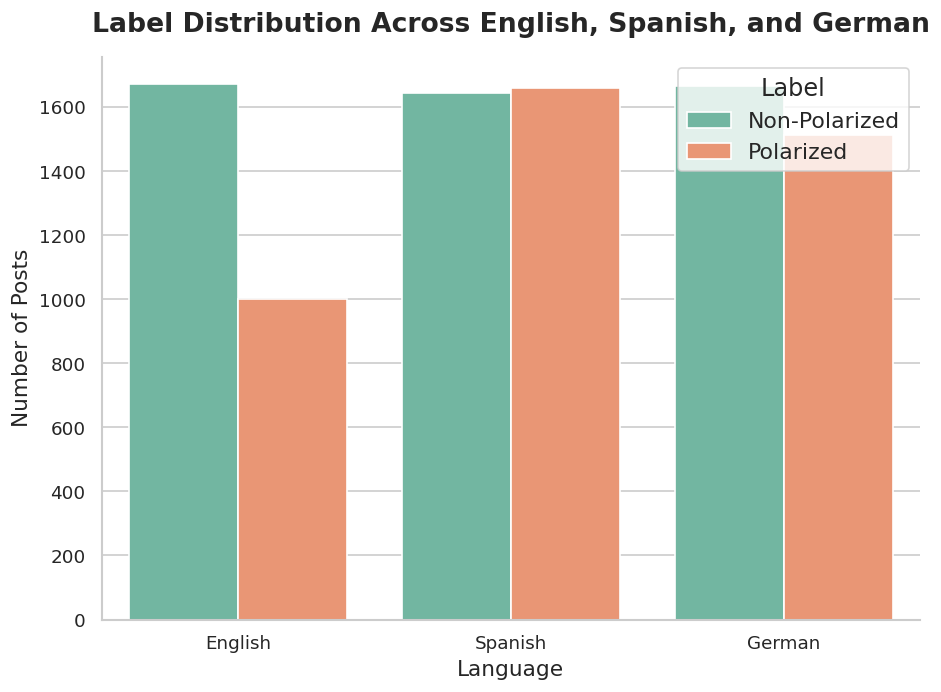

📊 Displayed: Combined Label Distribution


In [ ]:
# Base folder for your outputs
base_dir = "plots/plots_Raihana"

# Create subfolders just like your teammates’ structure
os.makedirs(f"{base_dir}/english", exist_ok=True)
os.makedirs(f"{base_dir}/spanish", exist_ok=True)
os.makedirs(f"{base_dir}/german", exist_ok=True)
os.makedirs(f"{base_dir}/overall", exist_ok=True)
os.makedirs("/content/plots", exist_ok=True)

# 💎 Global style settings
sns.set_theme(style="whitegrid", font="DejaVu Sans", font_scale=1.2)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["figure.dpi"] = 120

# --- Individual label distributions ---
datasets = {
    "english": df_eng,
    "spanish": df_spa,
    "german": df_deu
}

# 🎨 Custom pastel palette
colors = sns.color_palette("Set2", 2)

for lang, df in datasets.items():
    counts = df["polarization"].value_counts().sort_index()
    labels = ["Non-Polarized", "Polarized"]

    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x=labels, y=counts.values, palette=colors, ax=ax)

    ax.set_title(f"Label Distribution - {lang.capitalize()}", pad=15, weight="bold")
    ax.set_ylabel("Number of Posts")
    ax.set_xlabel("")
    ax.bar_label(ax.containers[0], fmt="%d", label_type="edge", fontsize=10)
    sns.despine()

    plt.tight_layout()
    # 💾 Save both locally (for Colab view) and to repo folder
    colab_save_path = f"/content/plots/label_distribution_{lang}.pdf"
    repo_save_path = f"{base_dir}/{lang}/label_distribution_{lang}.pdf"

    plt.savefig(colab_save_path, bbox_inches="tight", dpi=300)
    plt.savefig(repo_save_path, bbox_inches="tight", dpi=300)

    print(f"💾 Saved to Colab: {colab_save_path}")
    print(f"💾 Saved to Repo:  {repo_save_path}")

    plt.show()
    print(f"📊 Displayed: Label Distribution ({lang.capitalize()})")

# --- Combined label distribution ---
data_summary = {
    "Language": ["English", "English", "Spanish", "Spanish", "German", "German"],
    "Label": ["Non-Polarized", "Polarized", "Non-Polarized", "Polarized", "Non-Polarized", "Polarized"],
    "Count": [
        df_eng["polarization"].value_counts().get(0, 0),
        df_eng["polarization"].value_counts().get(1, 0),
        df_spa["polarization"].value_counts().get(0, 0),
        df_spa["polarization"].value_counts().get(1, 0),
        df_deu["polarization"].value_counts().get(0, 0),
        df_deu["polarization"].value_counts().get(1, 0),
    ]
}

df_summary = pd.DataFrame(data_summary)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    x="Language", y="Count", hue="Label",
    data=df_summary, palette=colors, ax=ax
)
ax.set_title("Label Distribution Across English, Spanish, and German", pad=15, weight="bold")
ax.set_ylabel("Number of Posts")
ax.set_xlabel("Language")
ax.legend(title="Label", loc="upper right", frameon=True)
sns.despine()

plt.tight_layout()

colab_save_path = "/content/plots/label_distribution_combined.pdf"
repo_save_path = f"{base_dir}/overall/label_distribution_combined.pdf"

plt.savefig(colab_save_path, bbox_inches="tight", dpi=300)
plt.savefig(repo_save_path, bbox_inches="tight", dpi=300)

print(f"💾 Saved to Colab: {colab_save_path}")
print(f"💾 Saved to Repo:  {repo_save_path}")

plt.show()
print("📊 Displayed: Combined Label Distribution")




---

<font size = "3"><b>
Language Mix
</b></font>


---

💾 Saved to Colab: /content/plots/language_mix_english.pdf
💾 Saved to Repo:  plots/plots_Raihana/english/language_mix_english.pdf


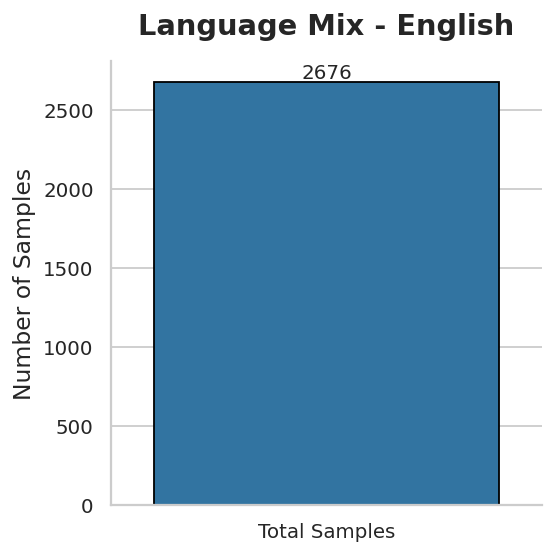

📊 Displayed: Language Mix (English)
💾 Saved to Colab: /content/plots/language_mix_spanish.pdf
💾 Saved to Repo:  plots/plots_Raihana/spanish/language_mix_spanish.pdf


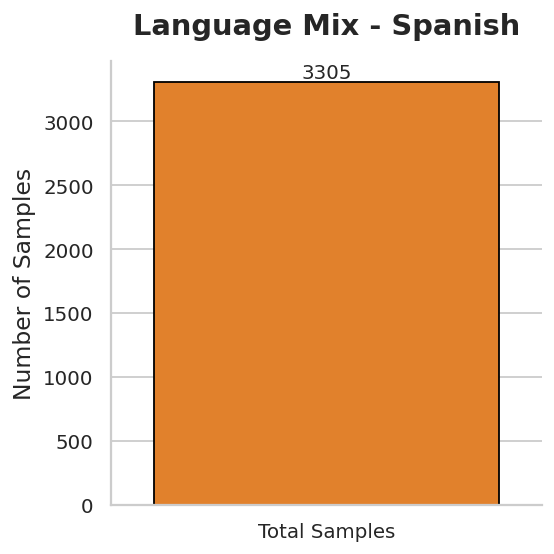

📊 Displayed: Language Mix (Spanish)
💾 Saved to Colab: /content/plots/language_mix_german.pdf
💾 Saved to Repo:  plots/plots_Raihana/german/language_mix_german.pdf


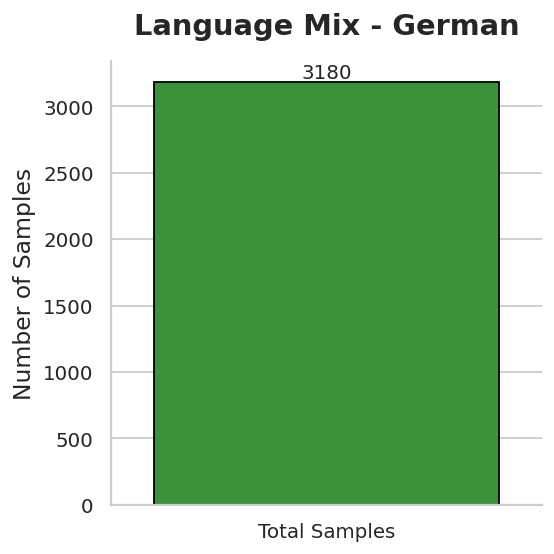

📊 Displayed: Language Mix (German)
💾 Saved to Colab: /content/plots/language_mix_combined.pdf
💾 Saved to Repo:  plots/plots_Raihana/overall/language_mix_combined.pdf


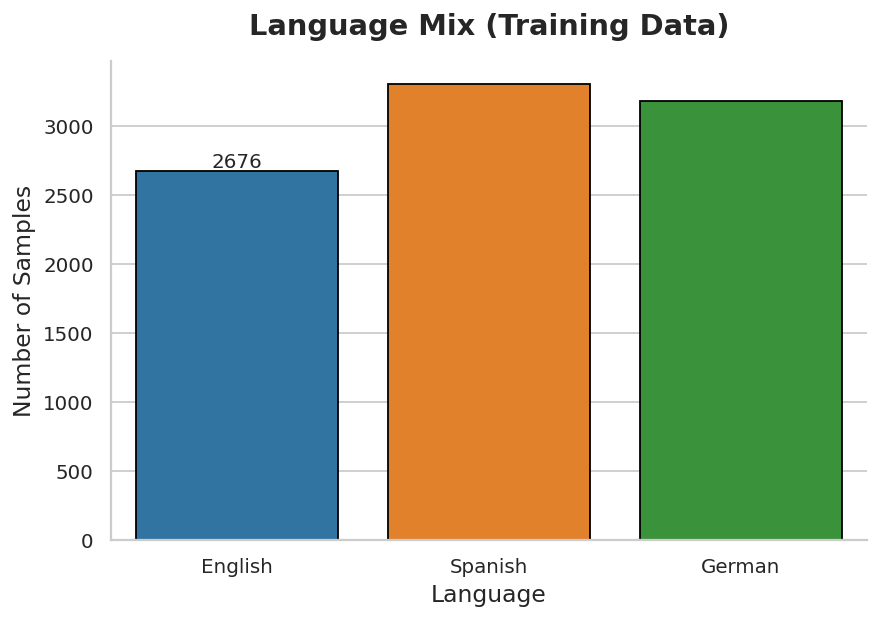

📊 Displayed: Combined Language Mix


In [ ]:
# 💎 Global aesthetic settings
sns.set_theme(style="whitegrid", font="DejaVu Sans", font_scale=1.2)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["figure.dpi"] = 130

# Vibrant color palette (distinct and clean)
vibrant_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # blue, orange, green

# --- Language-specific plots ---
datasets = {
    "english": df_eng,
    "spanish": df_spa,
    "german": df_deu
}

for i, (lang, df) in enumerate(datasets.items()):
    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    sns.barplot(
        x=["Total Samples"],
        y=[len(df)],
        palette=[vibrant_palette[i]],
        edgecolor="black",
        ax=ax
    )

    ax.set_title(f"Language Mix - {lang.capitalize()}", pad=15, weight="bold")
    ax.set_ylabel("Number of Samples")
    ax.set_xlabel("")
    ax.bar_label(ax.containers[0], fmt="%d", label_type="edge", fontsize=11)
    sns.despine()

    plt.tight_layout()
    # 💾 Save both locally (for Colab view) and to repo folder
    colab_save_path = f"/content/plots/language_mix_{lang}.pdf"
    repo_save_path = f"{base_dir}/{lang}/language_mix_{lang}.pdf"

    plt.savefig(colab_save_path, bbox_inches="tight", dpi=300)
    plt.savefig(repo_save_path, bbox_inches="tight", dpi=300)

    print(f"💾 Saved to Colab: {colab_save_path}")
    print(f"💾 Saved to Repo:  {repo_save_path}")

    plt.show()
    print(f"📊 Displayed: Language Mix ({lang.capitalize()})")

# --- Combined language mix ---
totals = {
    "English": len(df_eng),
    "Spanish": len(df_spa),
    "German": len(df_deu)
}

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(
    x=list(totals.keys()),
    y=list(totals.values()),
    palette=vibrant_palette,
    edgecolor="black",
    ax=ax
)

ax.set_title("Language Mix (Training Data)", pad=15, weight="bold")
ax.set_ylabel("Number of Samples")
ax.set_xlabel("Language")
ax.bar_label(ax.containers[0], fmt="%d", label_type="edge", fontsize=11)
sns.despine()

plt.tight_layout()
colab_save_path = "/content/plots/language_mix_combined.pdf"
repo_save_path = f"{base_dir}/overall/language_mix_combined.pdf"

plt.savefig(colab_save_path, bbox_inches="tight", dpi=300)
plt.savefig(repo_save_path, bbox_inches="tight", dpi=300)

print(f"💾 Saved to Colab: {colab_save_path}")
print(f"💾 Saved to Repo:  {repo_save_path}")

plt.show()
print("📊 Displayed: Combined Language Mix")


---

<font size = "3"><b>
Unigrams
</b></font>


---


🔹 Processing English...
💾 Saved to Colab: /content/plots/most_frequent_unigrams_non-polarized_english.pdf
💾 Saved to Repo:  plots/plots_Raihana/english/most_frequent_unigrams_non-polarized_english.pdf


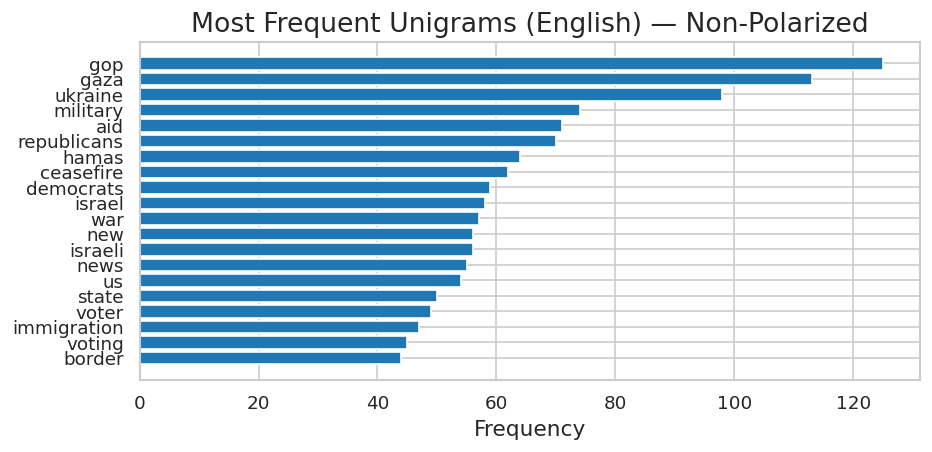

📊 Displayed: Top 20 (Non-Polarized) for English
💾 Saved to Colab: /content/plots/least_frequent_unigrams_non-polarized_english.pdf
💾 Saved to Repo:  plots/plots_Raihana/english/least_frequent_unigrams_non-polarized_english.pdf


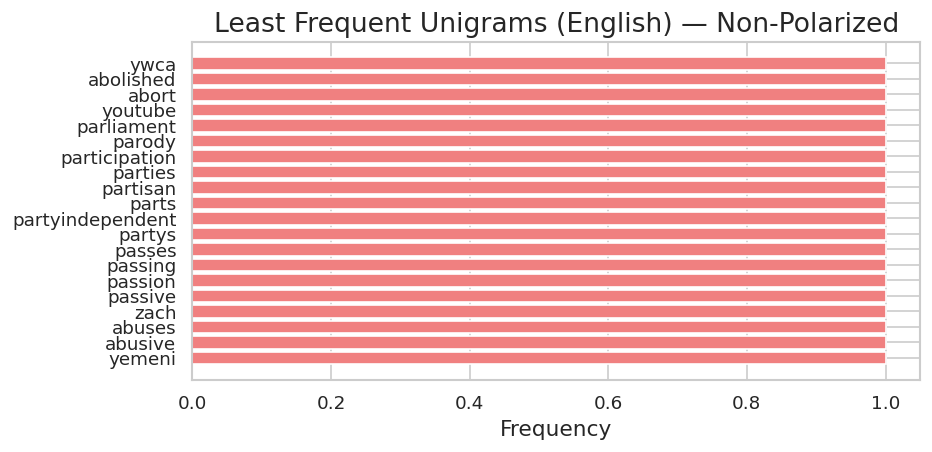

📊 Displayed: Least 20 (Non-Polarized) for English
💾 Saved to Colab: /content/plots/most_frequent_unigrams_polarized_english.pdf
💾 Saved to Repo:  plots/plots_Raihana/english/most_frequent_unigrams_polarized_english.pdf


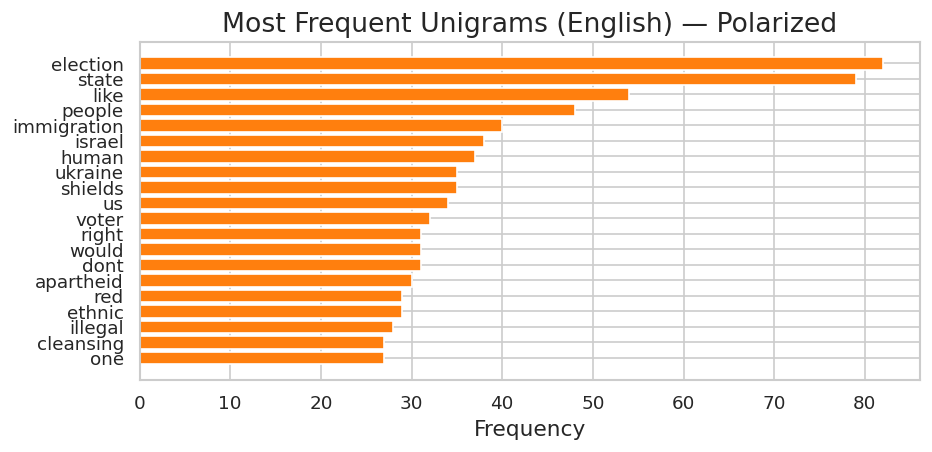

📊 Displayed: Top 20 (Polarized) for English
💾 Saved to Colab: /content/plots/least_frequent_unigrams_polarized_english.pdf
💾 Saved to Repo:  plots/plots_Raihana/english/least_frequent_unigrams_polarized_english.pdf


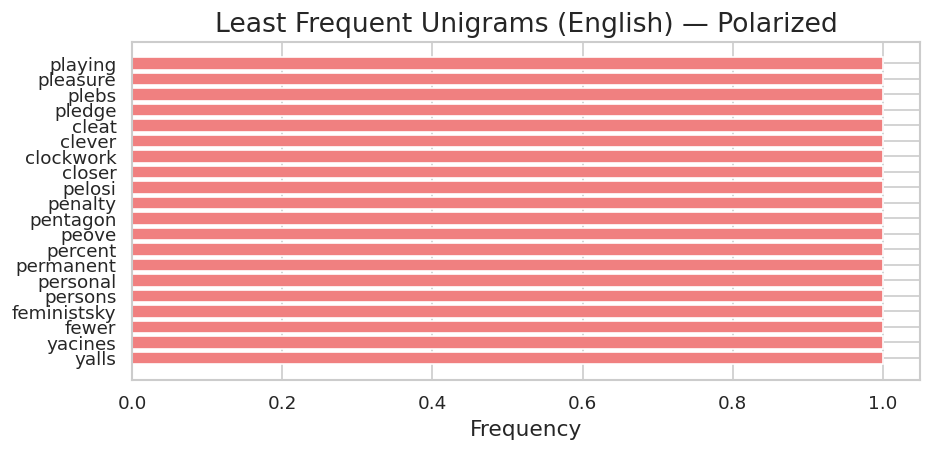

📊 Displayed: Least 20 (Polarized) for English
💾 Saved to Colab: /content/plots/most_frequent_unigrams_comparison_english.pdf
💾 Saved to Repo:  plots/plots_Raihana/english/most_frequent_unigrams_comparison_english.pdf


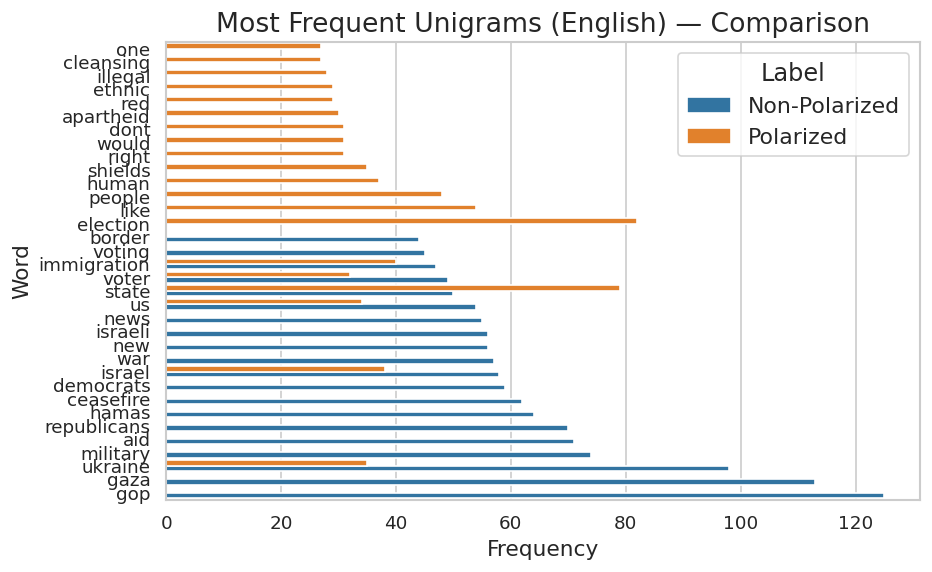

📊 Displayed: Comparison Plot for English
✅ Done plotting English

🔹 Processing Spanish...
💾 Saved to Colab: /content/plots/most_frequent_unigrams_non-polarized_spanish.pdf
💾 Saved to Repo:  plots/plots_Raihana/spanish/most_frequent_unigrams_non-polarized_spanish.pdf


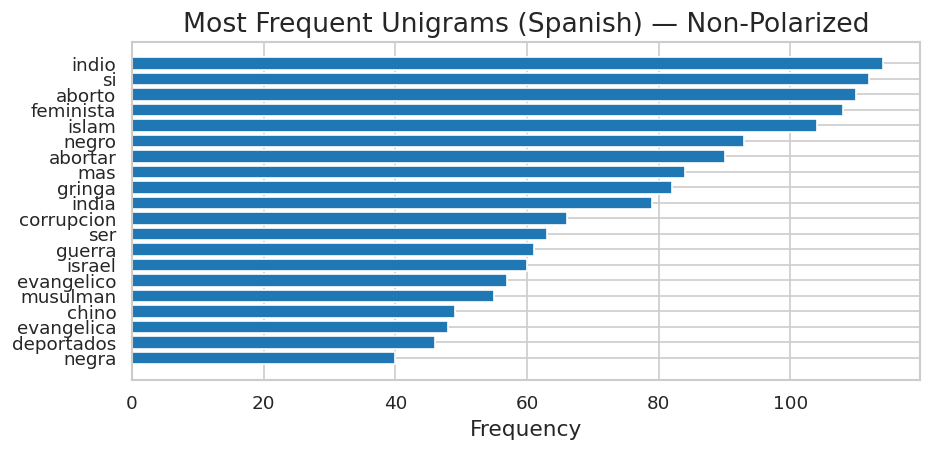

📊 Displayed: Top 20 (Non-Polarized) for Spanish
💾 Saved to Colab: /content/plots/least_frequent_unigrams_non-polarized_spanish.pdf
💾 Saved to Repo:  plots/plots_Raihana/spanish/least_frequent_unigrams_non-polarized_spanish.pdf


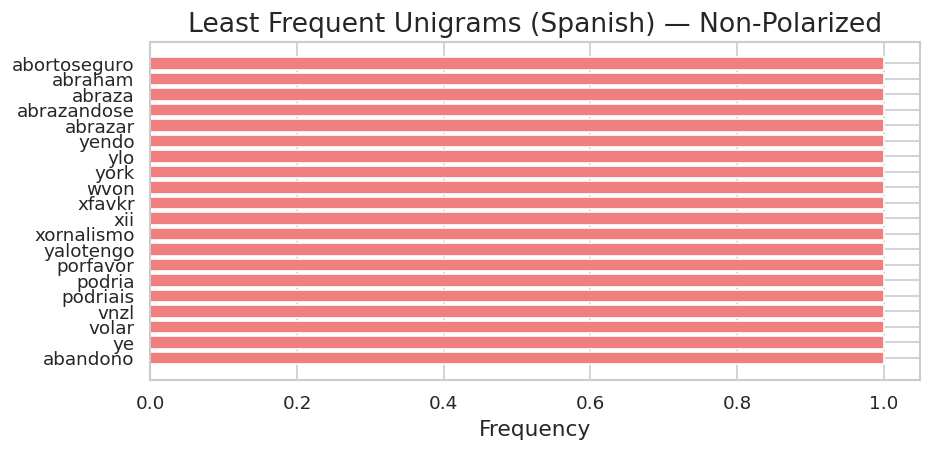

📊 Displayed: Least 20 (Non-Polarized) for Spanish
💾 Saved to Colab: /content/plots/most_frequent_unigrams_polarized_spanish.pdf
💾 Saved to Repo:  plots/plots_Raihana/spanish/most_frequent_unigrams_polarized_spanish.pdf


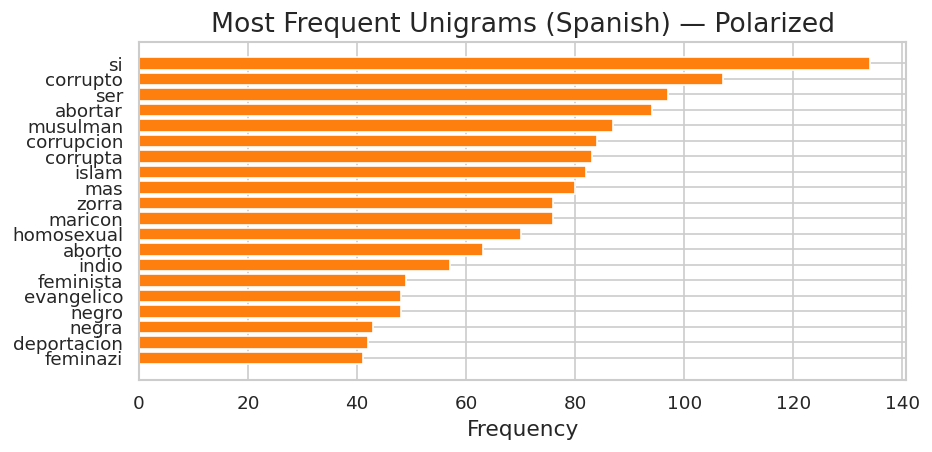

📊 Displayed: Top 20 (Polarized) for Spanish
💾 Saved to Colab: /content/plots/least_frequent_unigrams_polarized_spanish.pdf
💾 Saved to Repo:  plots/plots_Raihana/spanish/least_frequent_unigrams_polarized_spanish.pdf


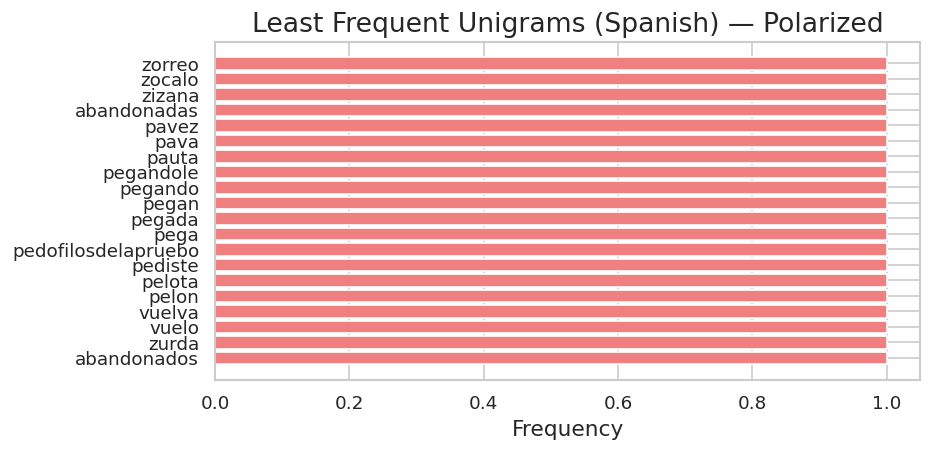

📊 Displayed: Least 20 (Polarized) for Spanish
💾 Saved to Colab: /content/plots/most_frequent_unigrams_comparison_spanish.pdf
💾 Saved to Repo:  plots/plots_Raihana/spanish/most_frequent_unigrams_comparison_spanish.pdf


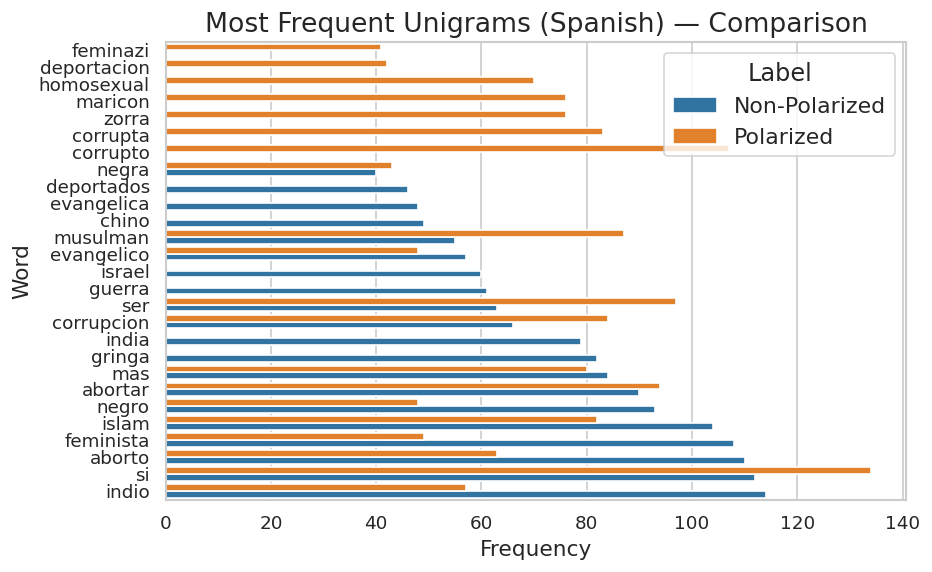

📊 Displayed: Comparison Plot for Spanish
✅ Done plotting Spanish

🔹 Processing German...
💾 Saved to Colab: /content/plots/most_frequent_unigrams_non-polarized_german.pdf
💾 Saved to Repo:  plots/plots_Raihana/german/most_frequent_unigrams_non-polarized_german.pdf


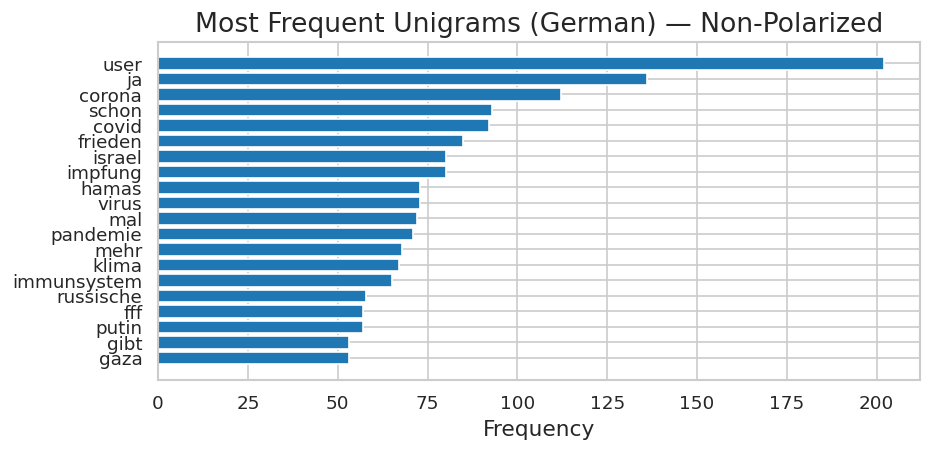

📊 Displayed: Top 20 (Non-Polarized) for German
💾 Saved to Colab: /content/plots/least_frequent_unigrams_non-polarized_german.pdf
💾 Saved to Repo:  plots/plots_Raihana/german/least_frequent_unigrams_non-polarized_german.pdf


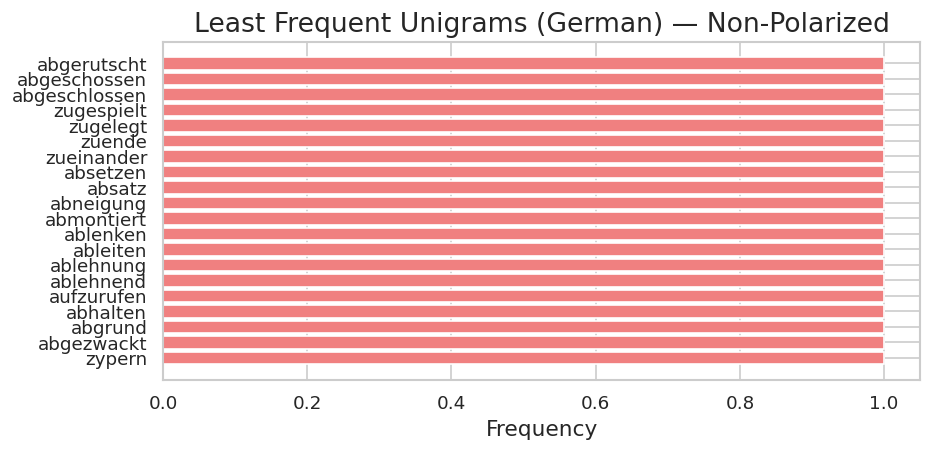

📊 Displayed: Least 20 (Non-Polarized) for German
💾 Saved to Colab: /content/plots/most_frequent_unigrams_polarized_german.pdf
💾 Saved to Repo:  plots/plots_Raihana/german/most_frequent_unigrams_polarized_german.pdf


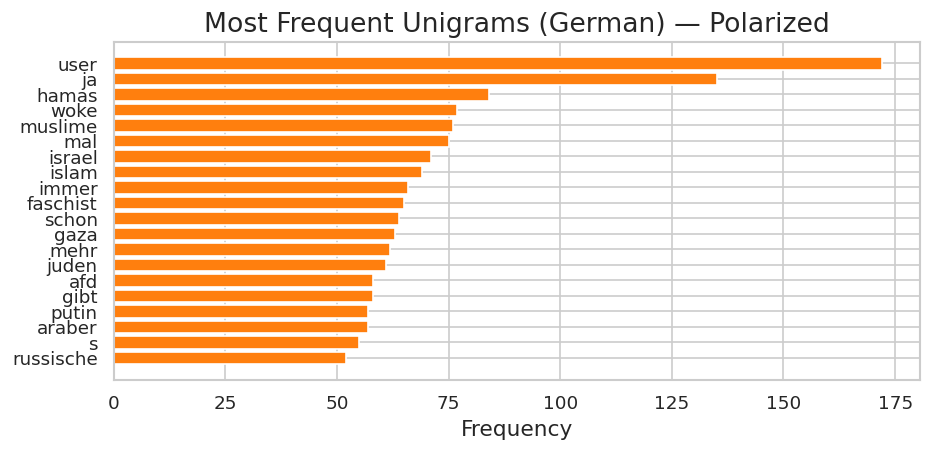

📊 Displayed: Top 20 (Polarized) for German
💾 Saved to Colab: /content/plots/least_frequent_unigrams_polarized_german.pdf
💾 Saved to Repo:  plots/plots_Raihana/german/least_frequent_unigrams_polarized_german.pdf


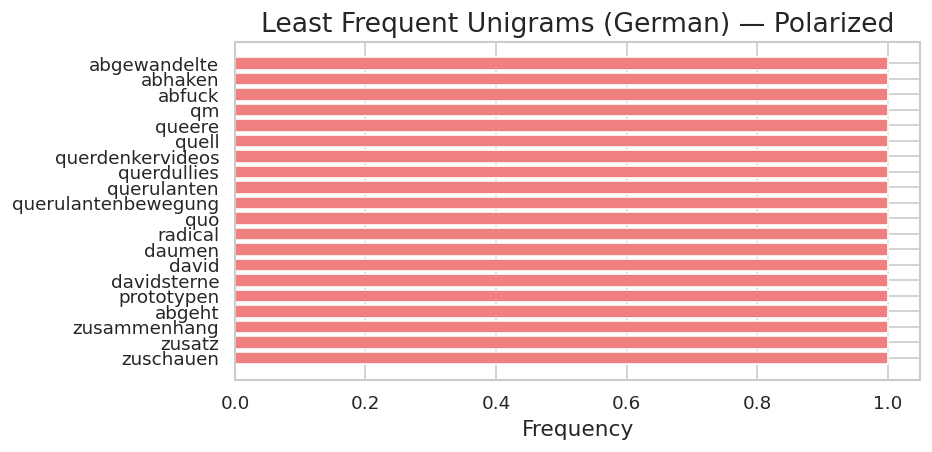

📊 Displayed: Least 20 (Polarized) for German
💾 Saved to Colab: /content/plots/most_frequent_unigrams_comparison_german.pdf
💾 Saved to Repo:  plots/plots_Raihana/german/most_frequent_unigrams_comparison_german.pdf


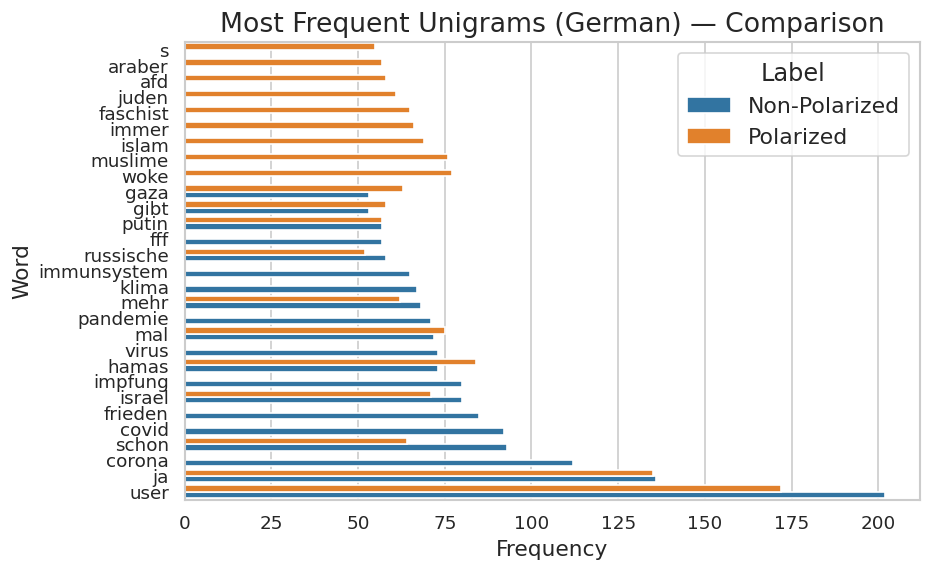

📊 Displayed: Comparison Plot for German
✅ Done plotting German


In [ ]:

# ====== STYLE SETTINGS ======
sns.set_theme(style="whitegrid", font="DejaVu Sans", font_scale=1.2)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11
plt.rcParams["figure.dpi"] = 120

# 🎨 contrasting colors
colors = {
    "Non-Polarized": "#1f77b4",  # blue
    "Polarized": "#ff7f0e"       # orange
}

# ====== STOPWORDS ======
english_stops = stopwords.words("english")
spanish_stops = stopwords.words("spanish")
german_stops  = stopwords.words("german")

# 🔹 Add custom high-frequency political/entity terms
custom_remove_english = [
    "trump", "donald", "biden", "joe", "kamala", "harris",
    "president", "republican", "democrat", "party",
    "america", "american", "states", "united"
]
custom_remove_spanish = ["judio", "indigena", "feminazis", "gobierno", "estado"]
custom_remove_german  = ["russland", "ukraine", "krieg", "regierung", "staat"]

# Combine all stopwords
english_stops.extend(custom_remove_english)
spanish_stops.extend(custom_remove_spanish)
german_stops.extend(custom_remove_german)

# ====== DATASETS ======
datasets = {
    "english": (df_eng, english_stops),
    "spanish": (df_spa, spanish_stops),
    "german":  (df_deu, german_stops)
}

# ====== MAIN LOOP ======
for lang, (df, stops) in datasets.items():
    print(f"\n🔹 Processing {lang.capitalize()}...")

    freq_dict = {}
    for label, label_name in [(0, "Non-Polarized"), (1, "Polarized")]:
        texts = df[df["polarization"] == label]["text"].astype(str).str.lower()

        vectorizer = CountVectorizer(stop_words=stops, ngram_range=(1,1), token_pattern=r'\b[a-zA-Z]+\b')
        X = vectorizer.fit_transform(texts)
        word_counts = X.toarray().sum(axis=0)
        vocab = vectorizer.get_feature_names_out()
        freq = pd.DataFrame({"word": vocab, "count": word_counts})
        freq_dict[label_name] = freq.sort_values("count", ascending=False)

    filtered_freqs = {}
    for label_name, freq in freq_dict.items():
        # ---- TOP 20 ----
        top20 = freq.head(20)
        plt.figure(figsize=(8,4))
        plt.barh(top20["word"], top20["count"], color=colors[label_name])
        plt.gca().invert_yaxis()
        plt.title(f"Most Frequent Unigrams ({lang.capitalize()}) — {label_name}")
        plt.xlabel("Frequency")
        plt.tight_layout()

        # 💾 Save to both Colab and repo folders
        colab_path = f"/content/plots/most_frequent_unigrams_{label_name.lower().replace(' ', '_')}_{lang}.pdf"
        repo_path = f"{base_dir}/{lang}/most_frequent_unigrams_{label_name.lower().replace(' ', '_')}_{lang}.pdf"
        plt.savefig(colab_path, bbox_inches="tight", dpi=300)
        plt.savefig(repo_path, bbox_inches="tight", dpi=300)
        print(f"💾 Saved to Colab: {colab_path}")
        print(f"💾 Saved to Repo:  {repo_path}")

        plt.show()
        print(f"📊 Displayed: Top 20 ({label_name}) for {lang.capitalize()}")

        # ---- LEAST COMMON 20 ----
        least20 = freq.sort_values("count", ascending=True).head(20)
        plt.figure(figsize=(8,4))
        plt.barh(least20["word"], least20["count"], color="lightcoral")
        plt.gca().invert_yaxis()
        plt.title(f"Least Frequent Unigrams ({lang.capitalize()}) — {label_name}")
        plt.xlabel("Frequency")
        plt.tight_layout()

        # 💾 Save least frequent as well
        colab_path = f"/content/plots/least_frequent_unigrams_{label_name.lower().replace(' ', '_')}_{lang}.pdf"
        repo_path = f"{base_dir}/{lang}/least_frequent_unigrams_{label_name.lower().replace(' ', '_')}_{lang}.pdf"
        plt.savefig(colab_path, bbox_inches="tight", dpi=300)
        plt.savefig(repo_path, bbox_inches="tight", dpi=300)
        print(f"💾 Saved to Colab: {colab_path}")
        print(f"💾 Saved to Repo:  {repo_path}")

        plt.show()
        print(f"📊 Displayed: Least 20 ({label_name}) for {lang.capitalize()}")

        filtered_freqs[label_name] = top20

    # ---- COMPARISON PLOT ----
    combined_df = pd.concat([
        filtered_freqs["Non-Polarized"].assign(Label="Non-Polarized"),
        filtered_freqs["Polarized"].assign(Label="Polarized")
    ])

    plt.figure(figsize=(8,5))
    sns.barplot(data=combined_df, x="count", y="word", hue="Label",
                palette=[colors["Non-Polarized"], colors["Polarized"]])
    plt.gca().invert_yaxis()
    plt.title(f"Most Frequent Unigrams ({lang.capitalize()}) — Comparison")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()

    # 💾 Save comparison
    colab_path = f"/content/plots/most_frequent_unigrams_comparison_{lang}.pdf"
    repo_path = f"{base_dir}/{lang}/most_frequent_unigrams_comparison_{lang}.pdf"
    plt.savefig(colab_path, bbox_inches="tight", dpi=300)
    plt.savefig(repo_path, bbox_inches="tight", dpi=300)
    print(f"💾 Saved to Colab: {colab_path}")
    print(f"💾 Saved to Repo:  {repo_path}")

    plt.show()
    print(f"📊 Displayed: Comparison Plot for {lang.capitalize()}")

    print(f"✅ Done plotting {lang.capitalize()}")




---

<font size = "5"><b>
AMAN AJMAL ___
503460</b></font>


---

In [ ]:
# load + clean data

print("\n" + "="*70)
#setup visualization
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
Path('plots').mkdir(exist_ok=True)

print("LOADING DATA")
print("="*70)

files = ["data/eng.csv", "data/deu.csv", "data/spa.csv"]
language_names = {"eng": "English", "deu": "German", "spa": "Spanish"}
dfs = []

for file_path in files:
    try:
        print(f"\nFile: {file_path}")

        #UTF-8 first, then latin-1 as fallback
        try:
            df_temp = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            print("  UTF-8 failed, trying latin-1...")
            df_temp = pd.read_csv(file_path, encoding='latin-1')

        #extract language code from filename
        lang_code = file_path.split('/')[-1].split('.')[0]
        df_temp['language'] = language_names.get(lang_code, lang_code)

        dfs.append(df_temp)
        print(f"Rows loaded: {len(df_temp)}")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

#combine all dataframes
if not dfs:
    print("\nNo files loaded! Check file paths.")
else:
    df = pd.concat(dfs, ignore_index=True)

    text_column = 'text'

    polarization_column = 'polarization'

    #clean data - remove NaN values
    df = df.dropna(subset=[text_column])
    df = df.dropna(subset=[polarization_column])

    print(f"\nCombined dataset shape: {df.shape}")
    print(f"Languages: {df['language'].unique()}")
    print(f"Polarization classes: {df[polarization_column].unique()}")
    print(f"Text column: '{text_column}'")
    print(f"Polarization column: '{polarization_column}'")

    print("\n" + "="*70)
    print("CLEANING TEXT DATA")
    print("="*70)

    def clean_social_media_text(text):
        """Remove URLs, mentions, RT markers while preserving punctuation"""
        text = str(text)

        #remove URLs
        text = re.sub(r'http\S+|www\.\S+', '', text)

        #remove mentions (@username)
        text = re.sub(r'@\w+', '', text)

        #remove RT (retweet marker)
        text = re.sub(r'\bRT\b', '', text, flags=re.IGNORECASE)

        #remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    #apply cleaning
    print(f"Cleaning {len(df)} texts...")
    df[text_column] = df[text_column].apply(clean_social_media_text)

    #remove any texts that became empty after cleaning
    original_len = len(df)
    df = df[df[text_column].str.strip().str.len() > 0]
    removed = original_len - len(df)

    print(f"Text cleaning complete!")
    print(f"  - Removed URLs, mentions, and RT markers")
    print(f"  - Removed {removed} empty texts after cleaning")
    print(f"  - Final dataset size: {len(df)} texts")



LOADING DATA

File: data/eng.csv
Rows loaded: 2676

File: data/deu.csv
Rows loaded: 3180

File: data/spa.csv
Rows loaded: 3305

Combined dataset shape: (9161, 4)
Languages: ['English' 'German' 'Spanish']
Polarization classes: [0 1]
Text column: 'text'
Polarization column: 'polarization'

CLEANING TEXT DATA
Cleaning 9161 texts...
Text cleaning complete!
  - Removed URLs, mentions, and RT markers
  - Removed 0 empty texts after cleaning
  - Final dataset size: 9161 texts




---

<font size = "4"><b>
CALCULATING METRICS</b></font>


---

In [ ]:

print("CALCULATING METRICS")

#token lengths (needed for n-grams and vocabulary)
df['token_length'] = df[text_column].apply(lambda x: len(re.findall(r'\b\w+\b', str(x))))

#punctuation metrics
df['punctuation_count'] = df[text_column].apply(lambda x: sum(1 for c in str(x) if c in '!?.,;:'))
df['exclamation_count'] = df[text_column].apply(lambda x: str(x).count('!'))
df['question_count'] = df[text_column].apply(lambda x: str(x).count('?'))
df['exclamation_ratio'] = df[text_column].apply(
    lambda x: str(x).count('!') / len(str(x)) if len(str(x)) > 0 else 0
)


print("✓ Metrics calculated successfully")

CALCULATING METRICS
✓ Metrics calculated successfully


<font color="blue">Emoji detection without mojibake fix </font>

In [ ]:
#Emoji detection without mojibake fix

def has_emoji(text):
    text = str(text)
    return bool(emoji.emoji_list(text))

df['has_emoji'] = df[text_column].apply(lambda x: has_emoji(x))



<font color = "blue">
with mojibake fix</font>


In [ ]:
#emoji detection with mojibake fix
#detect mojibake
mojibake_patterns = [
    r'√©',  # é → wrong
    r'√±',  # ñ → wrong
    r'√º',  # ü → wrong
    r'√∂',  # ö → wrong
    r'√ã',  # á → wrong
    r'Ã©',  # é alternative
    r'Ã±',  # ñ alternative
    r'Ã¼',  # ü alternative
    r'â€™', # apostrophe
    r'â€œ', # left quote
    r'â€', # right quote
    r'â€“', # dash
]
mojibake_regex = re.compile('|'.join(mojibake_patterns))

df['has_mojibake'] = df['text'].apply(
    lambda x: bool(mojibake_regex.search(str(x)))
)

mojibake_rows = df[df['has_mojibake']]
print(f"Found {len(mojibake_rows)} rows with possible mojibake.\n")
print(mojibake_rows[['text']].head(10))

def fix_mojibake(text):
    if not isinstance(text, str):
        return text
    return (text
        .replace("√©", "é")
        .replace("√∫", "ú")
        .replace("√±", "ñ")
        .replace("√ã", "á")
        .replace("√∂", "ö")
        .replace("√º", "ü")
        .replace("Ã©", "é")
        .replace("Ã±", "ñ")
        .replace("Ã¼", "ü")
        .replace("â€™", "'")
        .replace("â€“", "-")
        .replace("â€œ", '"')
        .replace("â€", '"')
    )

df['text_fixed'] = df['text'].apply(fix_mojibake)

def has_emoji(text):
    return bool(emoji.emoji_list(str(text)))

df['has_emoji'] = df['text_fixed'].apply(has_emoji)
print("Emoji count (cleaned):", df['has_emoji'].sum())

Found 4 rows with possible mojibake.

                                                                                                                                                                                                                                                                                             text
351                                                                                                                                                                                                                                               esp√±a digna lucha contra em neonazismo del IDF
560                                                                                                                                                                                                                                                 Ice ice ice lipton ice tea TheB√ºrsinBirthday
1064  Thats actually a common misconception about New England seafood. Mussels get saut√©ed,



---

<font size = "4"><b>
PUNCTUATION ANALYSIS</b></font>


---


PUNCTUATION ANALYSIS
Mean punctuation count: 1.66
Texts with exclamation marks: 618
Texts with question marks: 1415

PUNCTUATION STATISTICS BY LANGUAGE

         punctuation_count       exclamation_count       question_count      
                      mean   std              mean   std           mean   std
language                                                                     
English               1.29  1.63              0.10  0.50           0.17  0.51
German                2.39  2.46              0.12  0.68           0.27  0.65
Spanish               1.24  1.35              0.15  0.65           0.16  0.55


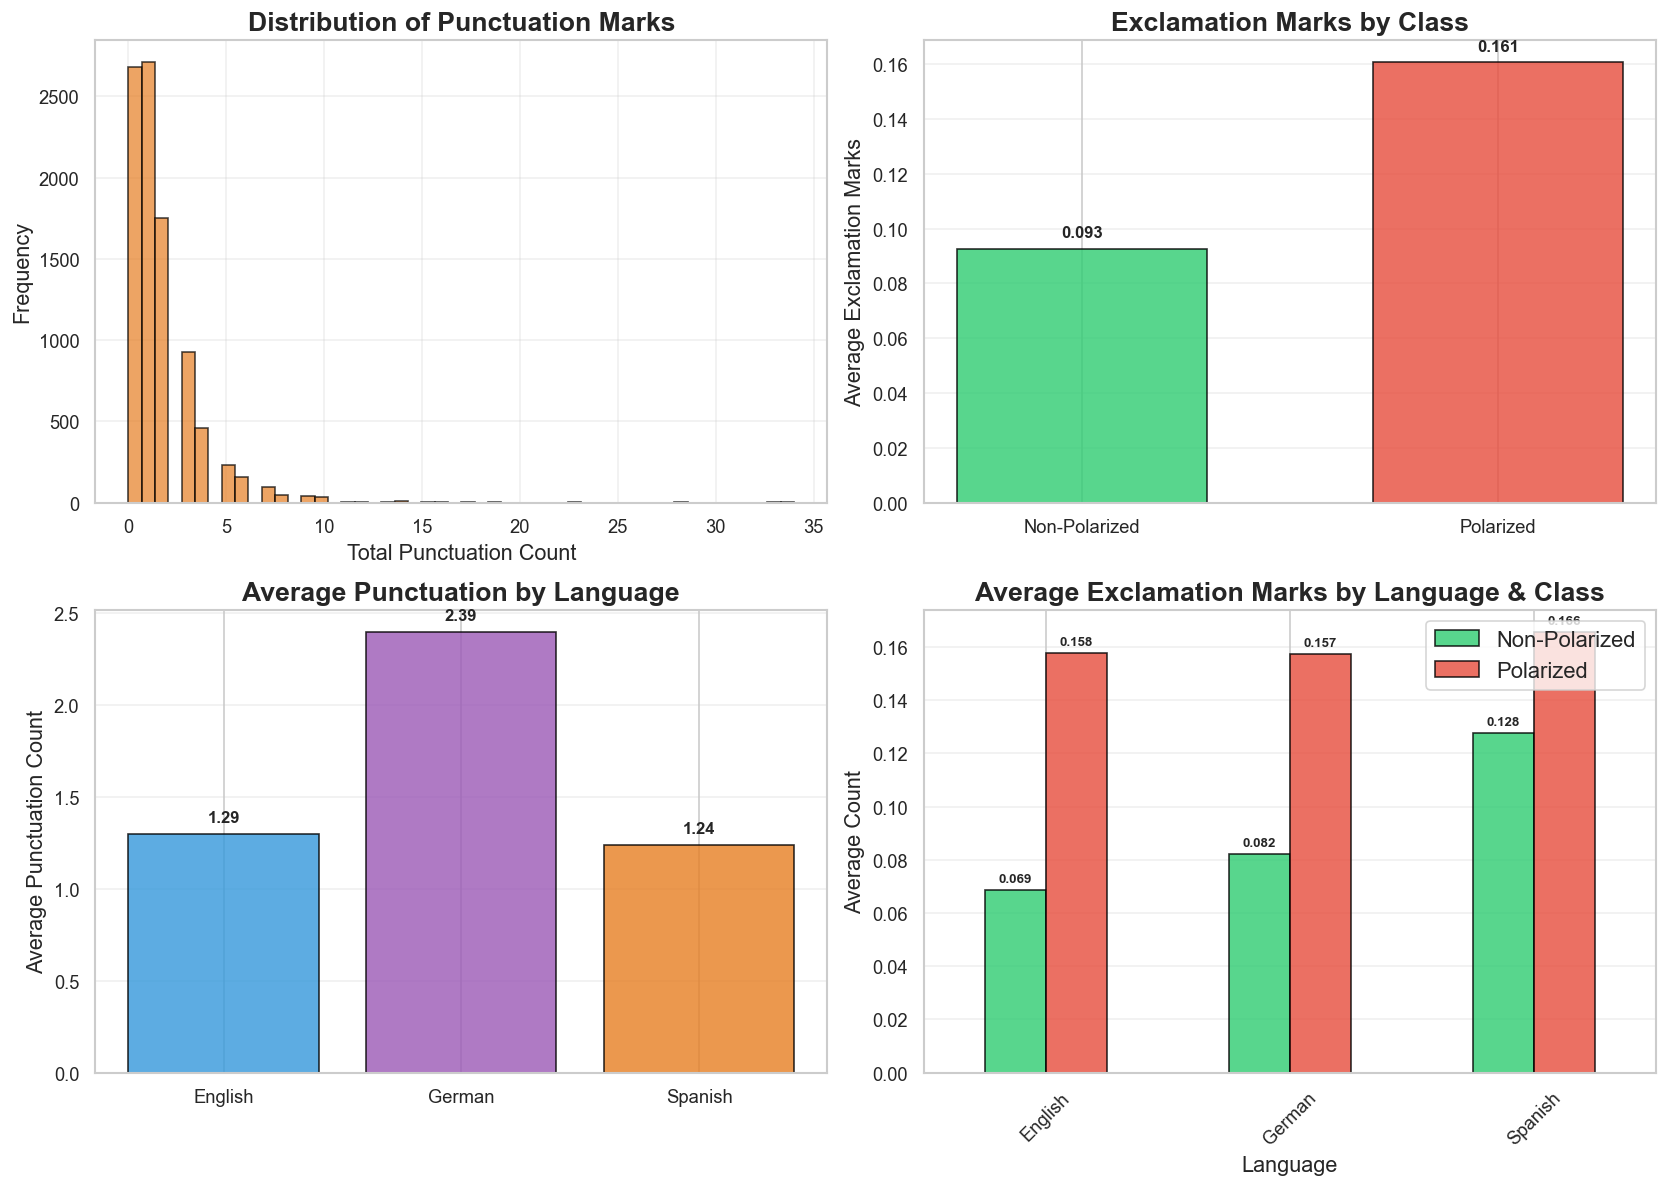

✓ Punctuation analysis saved to plots/plots_Aman/separate_languages/04_punctuation_analysis.pdf


In [ ]:
print("PUNCTUATION ANALYSIS")

print(f"Mean punctuation count: {df['punctuation_count'].mean():.2f}")
print(f"Texts with exclamation marks: {(df['exclamation_count'] > 0).sum()}")
print(f"Texts with question marks: {(df['question_count'] > 0).sum()}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#a. Punctuation count distribution
axes[0, 0].hist(df['punctuation_count'], bins=50, edgecolor='black', color='#e67e22', alpha=0.7)
axes[0, 0].set_xlabel('Total Punctuation Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Punctuation Marks', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

#b. Simple average comparison
exclaim_avg = df.groupby(polarization_column)['exclamation_count'].mean()
colors = ['#2ecc71', '#e74c3c']
labels = ['Non-Polarized', 'Polarized']

bars_8b = axes[0, 1].bar([0, 1], exclaim_avg.values, color=colors,
                          alpha=0.8, edgecolor='black', width=0.6)
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(labels)
axes[0, 1].set_ylabel('Average Exclamation Marks')
axes[0, 1].set_title('Exclamation Marks by Class', fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

#add values on bars
for i, (bar, val) in enumerate(zip(bars_8b, exclaim_avg.values)):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.003,
                    f'{val:.3f}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

#c. Punctuation by language
lang_punct_avg = df.groupby('language')['punctuation_count'].mean()
bars_8c = axes[1, 0].bar(lang_punct_avg.index, lang_punct_avg.values,
                          color=['#3498db', '#9b59b6', '#e67e22'],
                          alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('Average Punctuation Count')
axes[1, 0].set_title('Average Punctuation by Language', fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

#add values on bars
for bar in bars_8c:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'{height:.2f}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

#d. Exclamation counts by language and class
exclaim_counts = []
for lang in df['language'].unique():
    for label in [0, 1]:
        count = df[(df['language'] == lang) & (df[polarization_column] == label)]['exclamation_count'].mean()
        exclaim_counts.append({'Language': lang, 'Class': 'Polarized' if label else 'Non-Polarized',
                              'Avg Count': count})
exclaim_df = pd.DataFrame(exclaim_counts)
exclaim_pivot = exclaim_df.pivot(index='Language', columns='Class', values='Avg Count')
exclaim_pivot.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'],
                   alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Average Exclamation Marks by Language & Class', fontweight='bold')
axes[1, 1].set_ylabel('Average Count')
axes[1, 1].set_xlabel('Language')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3, axis='y')
axes[1, 1].legend(['Non-Polarized', 'Polarized'])

#add values on bars
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.3f', fontsize=8, fontweight='bold', padding=3)

print()
print("PUNCTUATION STATISTICS BY LANGUAGE")
print()

summary = df.groupby('language').agg({
    'punctuation_count': ['mean', 'std'],
    'exclamation_count': ['mean', 'std'],
    'question_count': ['mean', 'std']
}).round(2)
print(summary)

plt.tight_layout()
plt.savefig('plots/plots_Aman/separate_languages/04_punctuation_analysis.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Punctuation analysis saved to plots/plots_Aman/separate_languages/04_punctuation_analysis.pdf")



---

<font size = "4"><b>
VOCABULARY SIZE ANALYSIS per Language</b></font>


---

VOCABULARY SIZE ANALYSIS per language (with Stopword Filtering)

Vocabulary Statistics:
Language         Class  Total Tokens  Vocabulary Size      TTR
 English           All         21169             6545 0.309179
 English Non-Polarized         12635             4691 0.371270
 English     Polarized          8534             3304 0.387157
  German           All         29296             9704 0.331240
  German Non-Polarized         14887             5982 0.401827
  German     Polarized         14409             5928 0.411410
 Spanish           All         19756             7228 0.365864
 Spanish Non-Polarized          9754             4314 0.442280
 Spanish     Polarized         10002             4324 0.432314


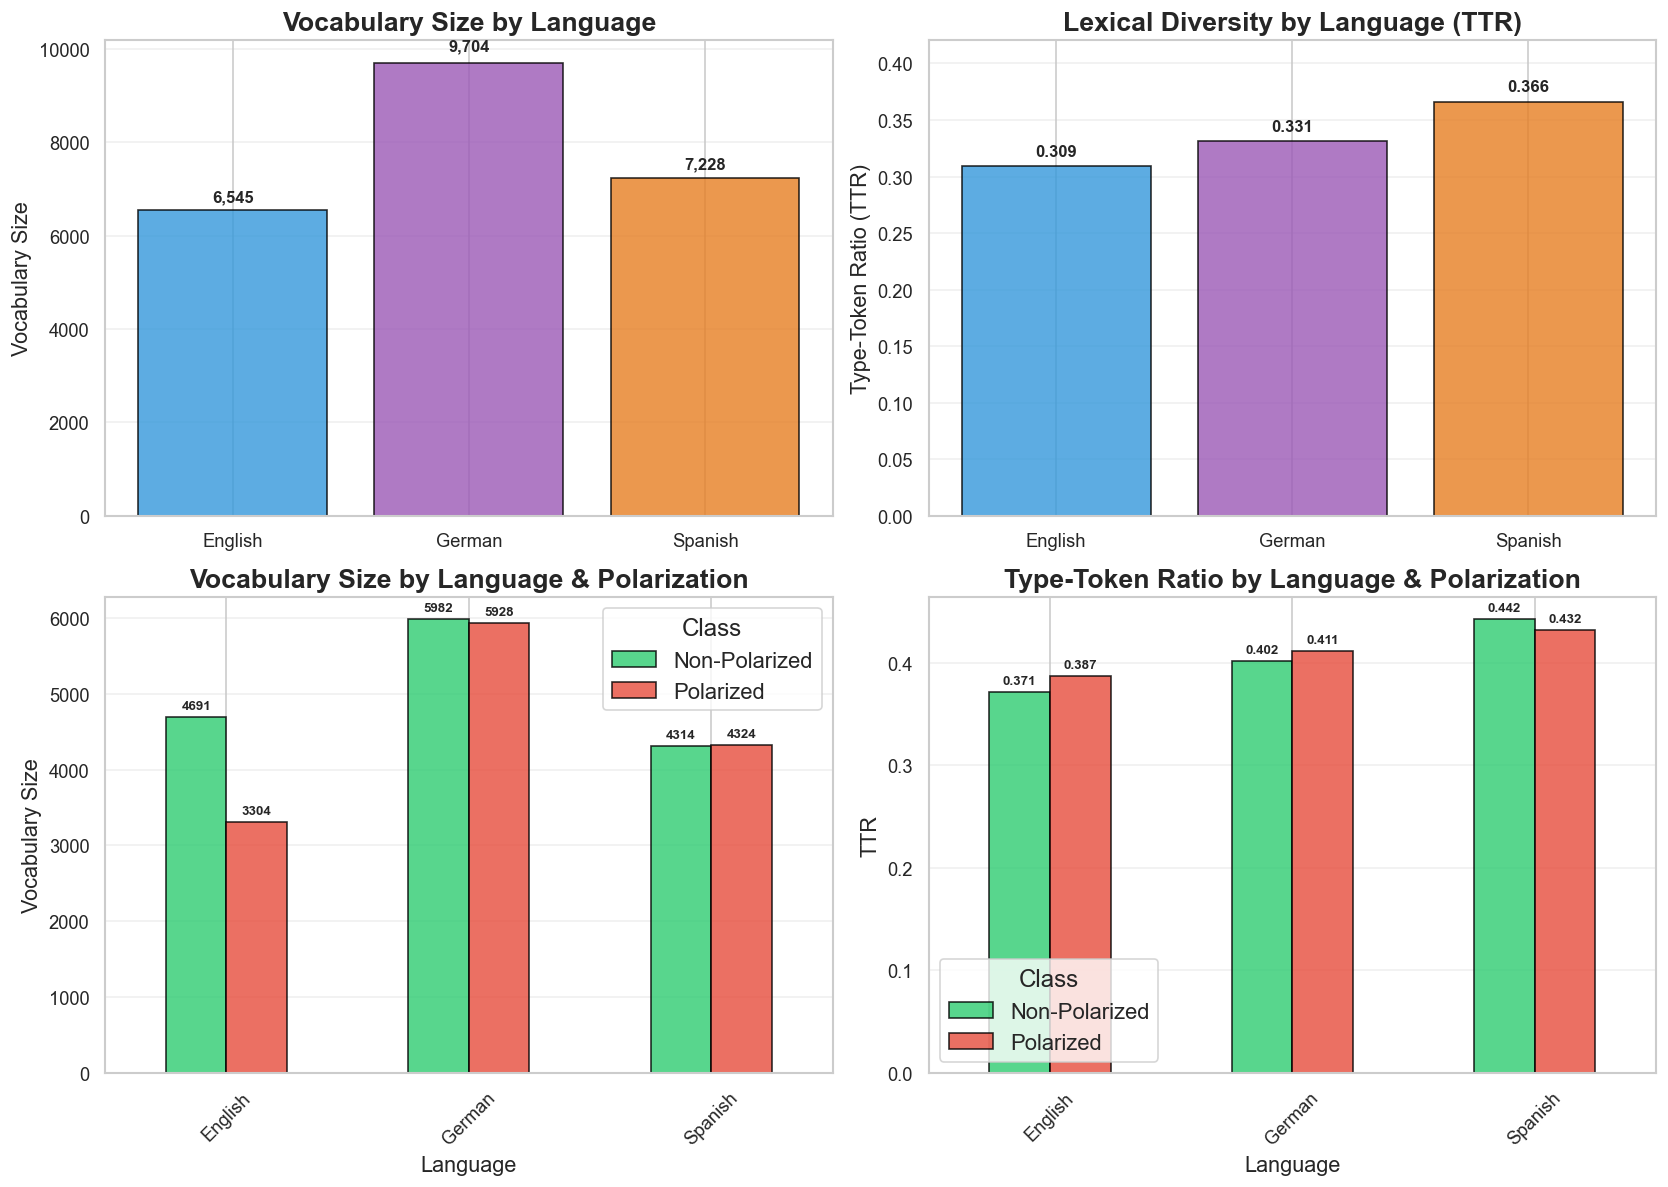

✓ Vocabulary size analysis saved to plots/plots_Aman/separate_languages/06_vocabulary_size.pdf


In [ ]:
print("VOCABULARY SIZE ANALYSIS per language (with Stopword Filtering)")


vocab_stats = []

#language mapping for NLTK stopwords
lang_mapping = {
    'English': 'english',
    'German': 'german',
    'Spanish': 'spanish'
}

#loop over each language dataset
for lang in df['language'].unique():
    lang_df = df[df['language'] == lang]
    lang_key = lang_mapping.get(lang, 'english')

    try:
        stop_words = set(stopwords.words(lang_key))
    except:
        print(f"Warning: Stopwords not found for {lang_key}, using English")
        stop_words = set(stopwords.words('english'))

    #tokenize and clean
    all_tokens = re.findall(r'\b\w+\b', ' '.join(lang_df[text_column].astype(str)).lower())
    all_tokens = [t for t in all_tokens if t.isalpha() and len(t) > 1 and t not in stop_words]

    vocab_all = set(all_tokens)

    vocab_stats.append({
        'Language': lang,
        'Class': 'All',
        'Total Tokens': len(all_tokens),
        'Vocabulary Size': len(vocab_all),
        'TTR': len(vocab_all) / len(all_tokens) if len(all_tokens) > 0 else 0
    })

    #by polarization class
    for label in [0, 1]:
        label_df = lang_df[lang_df[polarization_column] == label]
        label_tokens = re.findall(r'\b\w+\b', ' '.join(label_df[text_column].astype(str)).lower())
        label_tokens = [t for t in label_tokens if t.isalpha() and len(t) > 1 and t not in stop_words]
        label_vocab = set(label_tokens)

        label_name = 'Polarized' if label else 'Non-Polarized'
        vocab_stats.append({
            'Language': lang,
            'Class': label_name,
            'Total Tokens': len(label_tokens),
            'Vocabulary Size': len(label_vocab),
            'TTR': len(label_vocab) / len(label_tokens) if len(label_tokens) > 0 else 0
        })

vocab_df = pd.DataFrame(vocab_stats)

print("\nVocabulary Statistics:")
print(vocab_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#a. Vocabulary size by language
lang_vocab = vocab_df[vocab_df['Class'] == 'All']
bars_10a = axes[0, 0].bar(lang_vocab['Language'], lang_vocab['Vocabulary Size'],
                           color=['#3498db', '#9b59b6', '#e67e22'], alpha=0.8, edgecolor='black')
axes[0, 0].set_ylabel('Vocabulary Size')
axes[0, 0].set_title('Vocabulary Size by Language', fontweight='bold')
axes[0, 0].grid(alpha=0.3, axis='y')

#add value labels
for bar in bars_10a:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

#b. Type-Token Ratio by language (BAR CHART, not line)
bars_10b = axes[0, 1].bar(lang_vocab['Language'], lang_vocab['TTR'],
                           color=['#3498db', '#9b59b6', '#e67e22'], alpha=0.8, edgecolor='black')
axes[0, 1].set_ylabel('Type-Token Ratio (TTR)')
axes[0, 1].set_title('Lexical Diversity by Language (TTR)', fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')
axes[0, 1].set_ylim([0, max(lang_vocab['TTR']) * 1.15])

#add value labels
for bar in bars_10b:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

#c. Vocabulary by class and language
class_vocab = vocab_df[vocab_df['Class'].isin(['Non-Polarized', 'Polarized'])].copy()
class_vocab_pivot = class_vocab.pivot(index='Language', columns='Class', values='Vocabulary Size')
class_vocab_pivot.plot(kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'],
                       alpha=0.8, edgecolor='black')
axes[1, 0].set_title('Vocabulary Size by Language & Polarization', fontweight='bold')
axes[1, 0].set_ylabel('Vocabulary Size')
axes[1, 0].set_xlabel('Language')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3, axis='y')

#add value labels
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%d', fontsize=8, fontweight='bold', padding=3)

#d. TTR by class and language
ttr_pivot = class_vocab.pivot(index='Language', columns='Class', values='TTR')
ttr_pivot.plot(kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'],
               alpha=0.8, edgecolor='black')
axes[1, 1].set_title('Type-Token Ratio by Language & Polarization', fontweight='bold')
axes[1, 1].set_ylabel('TTR')
axes[1, 1].set_xlabel('Language')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3, axis='y')

#add value labels
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.3f', fontsize=8, fontweight='bold', padding=3)

plt.tight_layout()
plt.savefig('plots/plots_Aman/separate_languages/06_vocabulary_size.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Vocabulary size analysis saved to plots/plots_Aman/separate_languages/06_vocabulary_size.pdf")



---

<font size = "4"><b>
COMBINED VOCABULARY SIZE ANALYSIS (All Languages)</b></font>


---

COMBINED VOCABULARY SIZE ANALYSIS (All Languages)
Total Tokens (all languages): 69,854
Vocabulary Size (unique words): 22,263
Type-Token Ratio (TTR): 0.3187


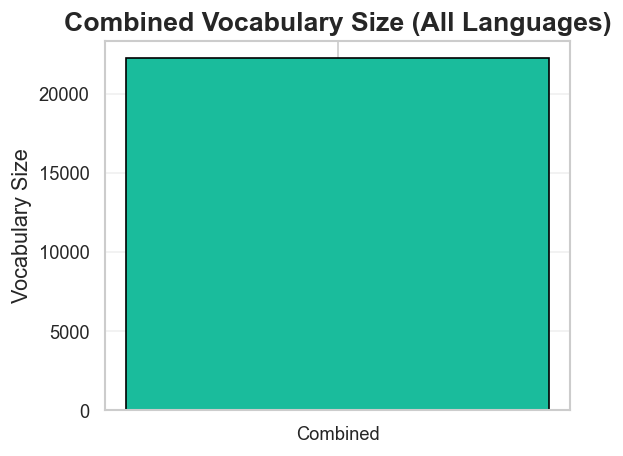

✓ Combined vocabulary analysis saved to plots/plots_Aman/combined_overall/06_vocabulary_size_combined.pdf


In [ ]:

print("COMBINED VOCABULARY SIZE ANALYSIS (All Languages)")


#merge all languages
combined_texts = ' '.join(df[text_column].astype(str)).lower()
all_tokens = re.findall(r'\b\w+\b', combined_texts)

#combine stopwords from all three languages
all_stopwords = set(stopwords.words('english')) | set(stopwords.words('german')) | set(stopwords.words('spanish'))
all_tokens = [t for t in all_tokens if t.isalpha() and t not in all_stopwords]

#overall stats
vocab_all = set(all_tokens)
total_tokens = len(all_tokens)
vocab_size = len(vocab_all)
ttr = vocab_size / total_tokens if total_tokens > 0 else 0

print(f"Total Tokens (all languages): {total_tokens:,}")
print(f"Vocabulary Size (unique words): {vocab_size:,}")
print(f"Type-Token Ratio (TTR): {ttr:.4f}")

plt.figure(figsize=(5, 4))
plt.bar(['Combined'], [vocab_size], color='#1abc9c', edgecolor='black', width=0.1)
plt.ylabel('Vocabulary Size')
plt.title('Combined Vocabulary Size (All Languages)', fontweight='bold')
plt.grid(alpha=0.3, axis='y')
plt.savefig('plots/plots_Aman/combined_overall/06_vocabulary_size_combined.pdf', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Combined vocabulary analysis saved to plots/plots_Aman/combined_overall/06_vocabulary_size_combined.pdf")




---

<font size = "4"><b>
EMOJI ANALYSIS</b></font>


---

EMOJI ANALYSIS BY LANGUAGE

Emoji Usage by Language:
Language  Total Texts  Texts with Emoji  Emoji %
 English         2676                 0 0.000000
  German         3180               125 3.930818
 Spanish         3305                 0 0.000000


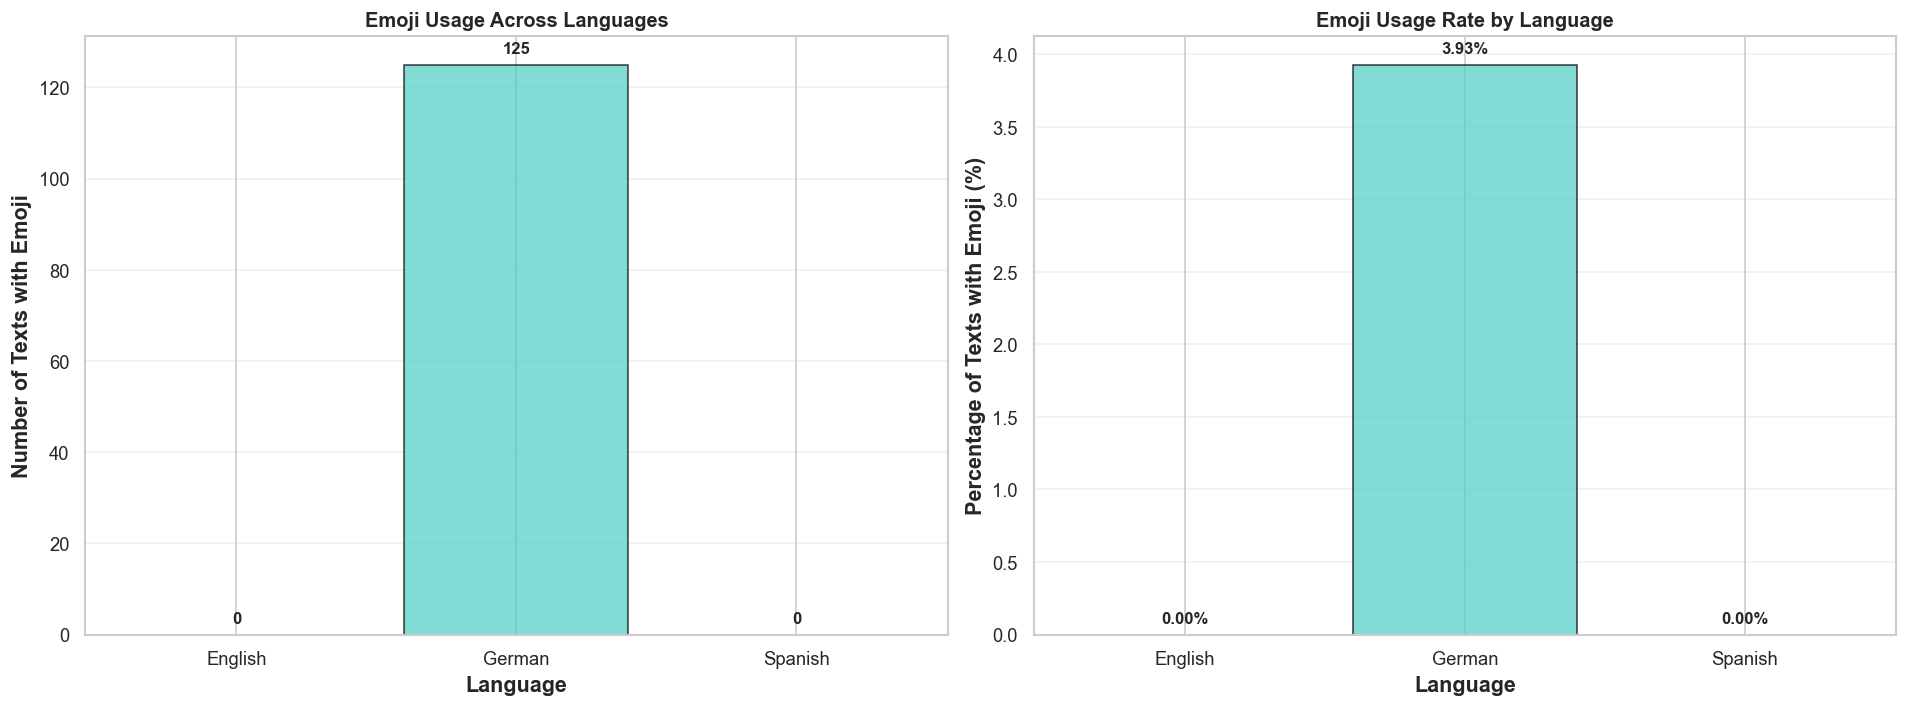


✓ Plot saved: plots/plots_Aman/separate_languages/emoji_analysis_by_language.pdf

EMOJI USAGE BY POLARIZATION CLASS


Emoji Usage by Polarization Class:
 Polarization  Total Texts  Texts with Emoji  Emoji %
Non-Polarized         4987                68 1.363545
    Polarized         4174                57 1.365597

COMBINED EMOJI ANALYSIS



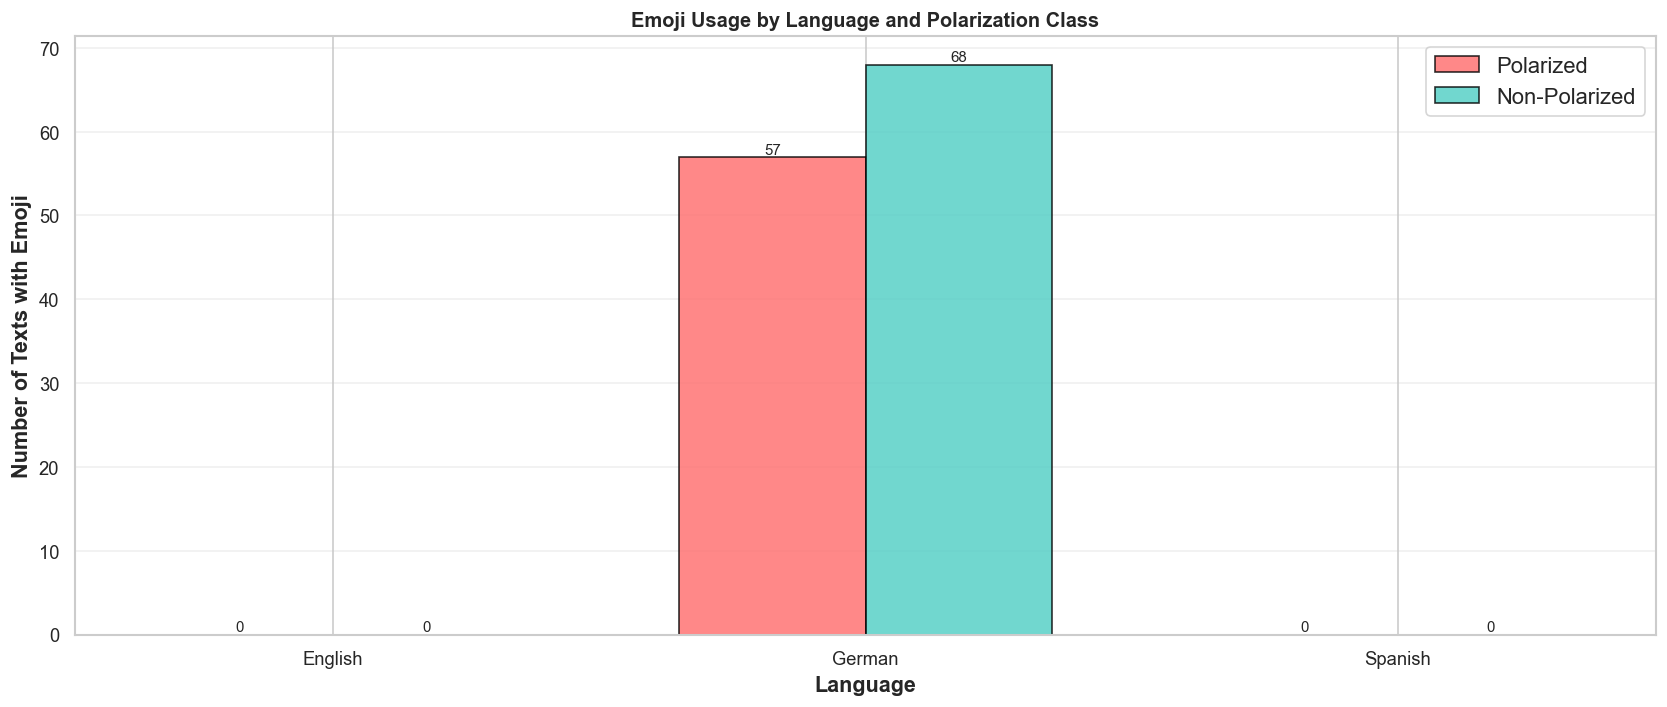


✓ Plot saved: plots/plots_Aman/separate_languages/emoji_by_language_and_polarization.pdf
                                        id  \
2683  deu_70a7159b70225731c8bdacf4b954ba6b   
2698  deu_b4c50cacabb32dbabe80d5b1cc43e1eb   
2710  deu_e8505f5a278e3644a773028cd412eea0   
2723  deu_fa5da52bf7b1f442fdd8154eae6db7e5   
2728  deu_dece2ea5d07bf3f8c77348a5d9133e9d   
...                                    ...   
5826  deu_e094f4396116db025475767b338bf265   
5832  deu_1e3c4098c55fe658f0cec33c70fe12cc   
5846  deu_fd42201aa6603f0481d28d9c29b77641   
5848  deu_98bec9a1039338dc1e7683c2aa3d0a68   
5850  deu_1f47f613dc759d9438738a5bbbec1455   

                                                                                                                                                              text  \
2683                                                                                                         Ja Weidel. Einige deiner besten Freunde sind Juden. 😏   
2698                     

In [ ]:
print("EMOJI ANALYSIS BY LANGUAGE")

#create the has_emoji column in your DataFrame
if 'has_emoji' not in df.columns:
    print("\nDetecting emoji presence in text...")
    df['has_emoji'] = df['text'].apply(has_emoji)
    print("✓ Added 'has_emoji' column to DataFrame.")

#calculate emoji statistics per language
emoji_stats = []
for lang in df['language'].unique():
    lang_df = df[df['language'] == lang]

    total_texts = len(lang_df)
    texts_with_emoji = lang_df['has_emoji'].sum()
    emoji_percentage = (texts_with_emoji / total_texts * 100) if total_texts > 0 else 0

    emoji_stats.append({
        'Language': lang,
        'Total Texts': total_texts,
        'Texts with Emoji': texts_with_emoji,
        'Emoji %': emoji_percentage
    })

emoji_df = pd.DataFrame(emoji_stats)
print("\nEmoji Usage by Language:")
print(emoji_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#bar chart of emoji counts
axes[0].bar(emoji_df['Language'], emoji_df['Texts with Emoji'],
            color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Language', fontweight='bold')
axes[0].set_ylabel('Number of Texts with Emoji', fontweight='bold')
axes[0].set_title('Emoji Usage Across Languages', fontweight='bold', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(emoji_df['Texts with Emoji']):
    axes[0].text(i, v + max(emoji_df['Texts with Emoji'])*0.02, str(int(v)),
                ha='center', fontweight='bold')

#percentage comparison
axes[1].bar(emoji_df['Language'], emoji_df['Emoji %'],
            color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Language', fontweight='bold')
axes[1].set_ylabel('Percentage of Texts with Emoji (%)', fontweight='bold')
axes[1].set_title('Emoji Usage Rate by Language', fontweight='bold', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(emoji_df['Emoji %']):
    axes[1].text(i, v + max(emoji_df['Emoji %'])*0.02, f'{v:.2f}%',
                ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('plots/plots_Aman/separate_languages/emoji_analysis_by_language.pdf', bbox_inches='tight', dpi=300)
plt.show()
print(f"\n✓ Plot saved: plots/plots_Aman/separate_languages/emoji_analysis_by_language.pdf")

print()
print("EMOJI USAGE BY POLARIZATION CLASS")
print()

polarization_emoji_stats = []
for pol_class in df[polarization_column].unique():
    pol_df = df[df[polarization_column] == pol_class]

    total_texts = len(pol_df)
    texts_with_emoji = pol_df['has_emoji'].sum()
    emoji_percentage = (texts_with_emoji / total_texts * 100) if total_texts > 0 else 0

    polarization_emoji_stats.append({
        'Polarization': 'Polarized' if pol_class == 1 else 'Non-Polarized',
        'Total Texts': total_texts,
        'Texts with Emoji': texts_with_emoji,
        'Emoji %': emoji_percentage
    })

pol_emoji_df = pd.DataFrame(polarization_emoji_stats)
print("\nEmoji Usage by Polarization Class:")
print(pol_emoji_df.to_string(index=False))

print()
print("COMBINED EMOJI ANALYSIS")
print()

fig, ax = plt.subplots(figsize=(14, 6))

languages = df['language'].unique()
x = np.arange(len(languages))
width = 0.35

#get counts for polarized and non-polarized
polarized_counts = []
non_polarized_counts = []

for lang in languages:
    lang_df = df[df['language'] == lang]
    polarized_counts.append(lang_df[(lang_df[polarization_column] == 1) & (lang_df['has_emoji'])].shape[0])
    non_polarized_counts.append(lang_df[(lang_df[polarization_column] == 0) & (lang_df['has_emoji'])].shape[0])

bars1 = ax.bar(x - width/2, polarized_counts, width, label='Polarized',
               color='#FF6B6B', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, non_polarized_counts, width, label='Non-Polarized',
               color='#4ECDC4', alpha=0.8, edgecolor='black')

ax.set_xlabel('Language', fontweight='bold')
ax.set_ylabel('Number of Texts with Emoji', fontweight='bold')
ax.set_title('Emoji Usage by Language and Polarization Class', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(languages)
ax.legend()
ax.grid(axis='y', alpha=0.3)

#add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('plots/plots_Aman/separate_languages/emoji_by_language_and_polarization.pdf', bbox_inches='tight', dpi=300)
plt.show()
print(f"\n✓ Plot saved: plots/plots_Aman/separate_languages/emoji_by_language_and_polarization.pdf")
pd.set_option('display.max_colwidth', None)
emoji_rows = df[df['has_emoji']]
print(emoji_rows)



In [ ]:

print("LANGUAGE MIXING ANALYSIS")
print()

#check for English content in German/Spanish datasets
for lang in ['German', 'Spanish']:
    if lang in df['language'].unique():
        sub_df = df[df['language'] == lang]

        #detect English words
        english_pattern = r'\b(the|you|for|and|this|that|with|from|have|more)\b'
        sub_df_temp = sub_df.copy()
        sub_df_temp['has_english'] = sub_df_temp[text_column].apply(
            lambda x: bool(re.search(english_pattern, str(x).lower()))
        )

        english_count = sub_df_temp['has_english'].sum()
        english_pct = (english_count / len(sub_df_temp)) * 100

        print(f"\n{lang} Dataset:")
        print(f"  Total texts: {len(sub_df_temp)}")
        print(f"  Texts with English words: {english_count} ({english_pct:.1f}%)")
        print(f"  Example mixed text: {sub_df_temp[sub_df_temp['has_english']][text_column].iloc[0][:150]}...")

LANGUAGE MIXING ANALYSIS


German Dataset:
  Total texts: 3180
  Texts with English words: 36 (1.1%)
  Example mixed text: Please get informed. It was an Islam critic and afd supporter....

Spanish Dataset:
  Total texts: 3305
  Texts with English words: 10 (0.3%)
  Example mixed text: "gay gay homosexual gay" with half second intervals between words...




---

<font size = "4"><b>
MULTILINGUAL N-GRAMS ANALYSIS - FILTERED (Bigrams & Trigrams)</b></font>


---


MULTILINGUAL N-GRAMS ANALYSIS - FILTERED (Bigrams & Trigrams)


🔹 Analyzing language: ENGLISH (FILTERED)

Top 12 Bigrams by Class (Filtered):
    Filtered 20 repetitions, top 3:
      - 'gaza gaza': 59
      - 'lies lies': 6
      - 'ice ice': 4

Non-Polarized:
  'donald trump': 77
  'military aid': 64
  'kamala harris': 54
  'west bank': 37
  'joe biden': 36
  'border security': 36
  'early voting': 29
  'aid ukraine': 29
  'electoral college': 25
  'voter registration': 25
  'mike pence': 21
  'fake news': 20
    Filtered 27 repetitions, top 3:
      - 'sanctions sanctions': 3
      - 'democrats democrats': 2
      - 'etc etc': 2

Polarized:
  'human shields': 35
  'ethnic cleansing': 27
  'apartheid state': 26
  'red states': 23
  'border security': 21
  'woke mob': 20
  'illegal immigration': 20
  'election interference': 19
  'joe biden': 19
  'open borders': 18
  'jewish state': 17
  'stolen election': 17

----------------------------------------------------------------------
To

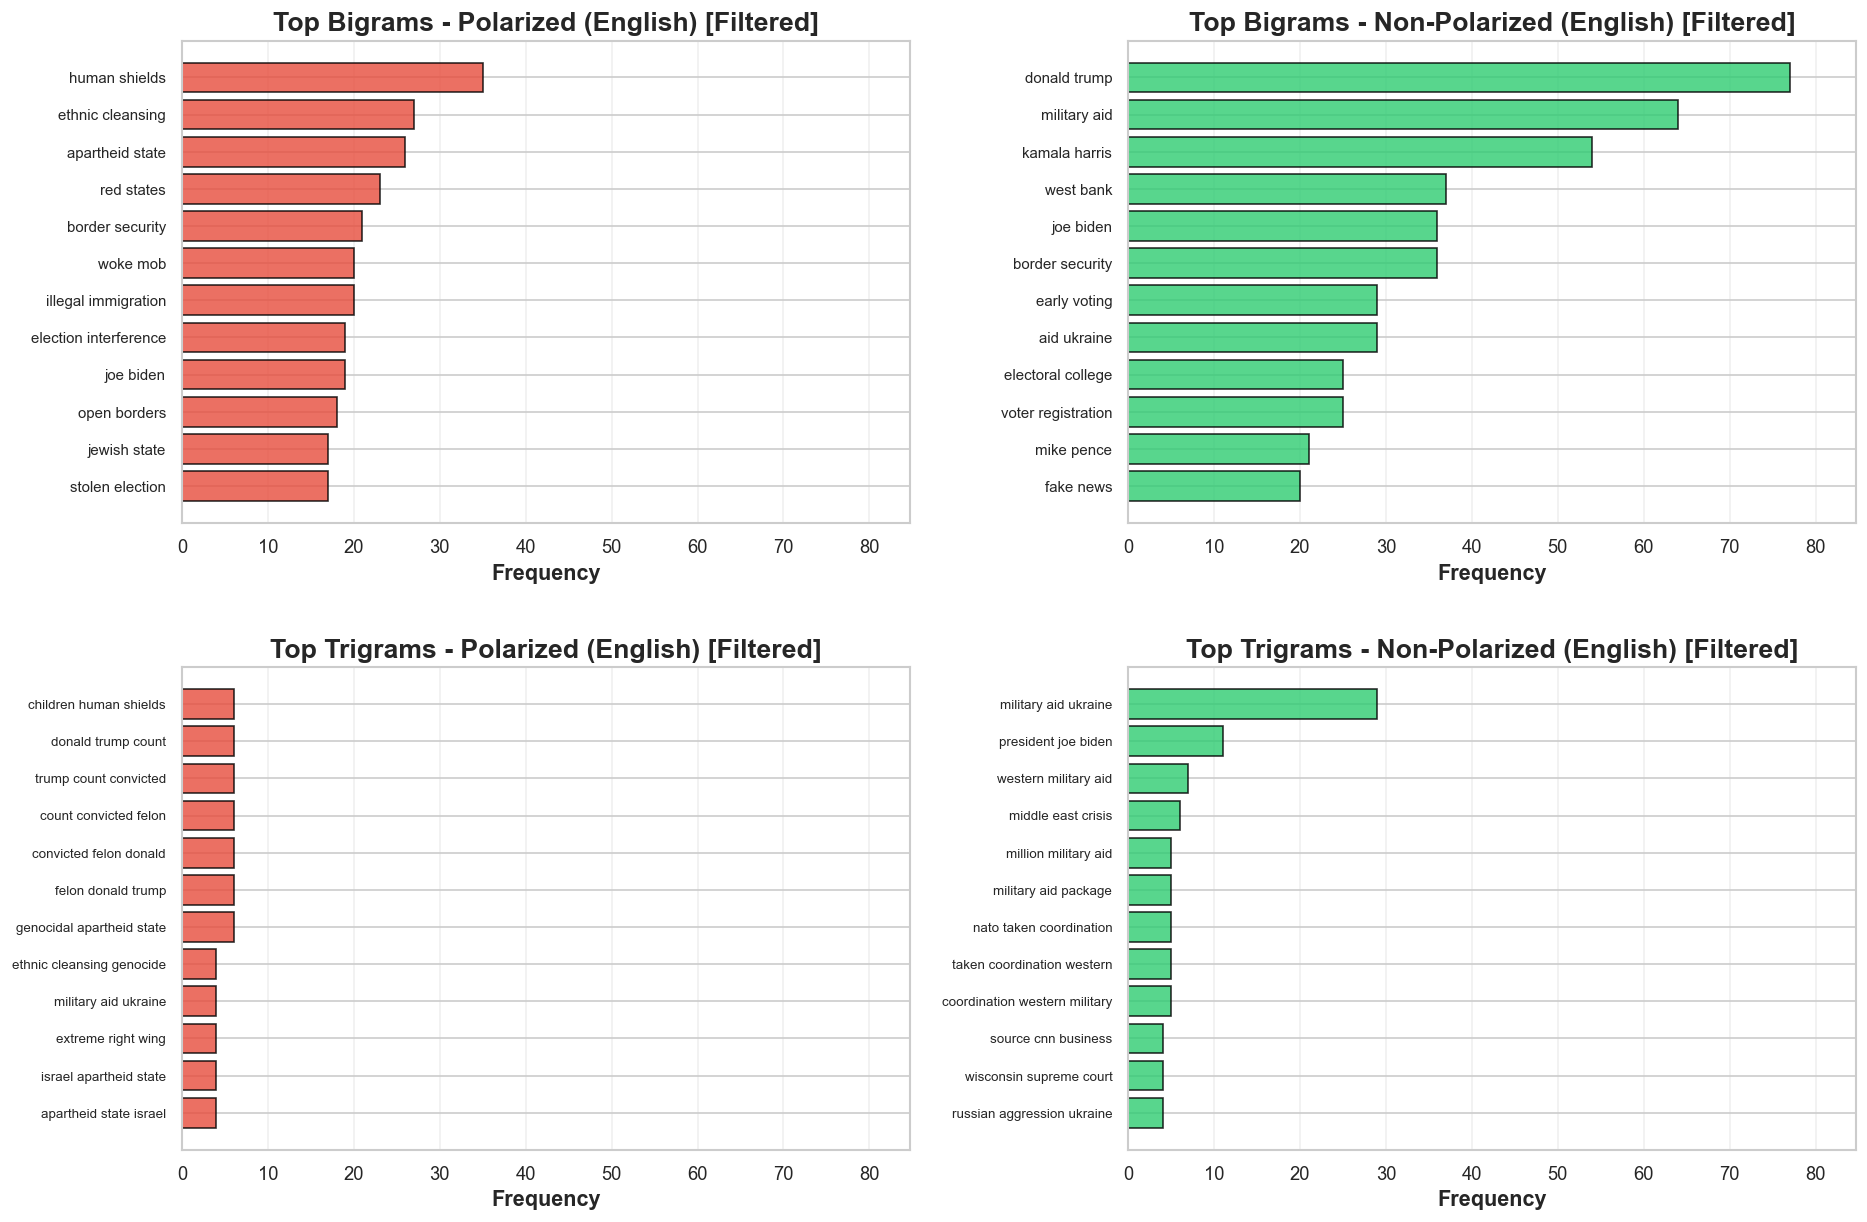

✓ Filtered n-grams analysis saved to plots/07_ngrams_english_filtered.pdf


🔹 Analyzing language: GERMAN (FILTERED)

Top 12 Bigrams by Class (Filtered):
    Filtered 40 repetitions, top 3:
      - 'krieg krieg': 8
      - 'corona corona': 5
      - 'russland russland': 4

Non-Polarized:
  'letzte generation': 34
  'long covid': 28
  'ruhe frieden': 15
  'gaza streifen': 6
  'corona impfung': 6
  'krieg russland': 6
  'hast corona': 6
  'corona pandemie': 6
  'seit jahren': 6
  'schon mal': 5
  'schon immer': 5
  'viele leute': 5
    Filtered 47 repetitions, top 3:
      - 'krieg krieg': 5
      - 'russland russland': 3
      - 'ausländer ausländer': 3

Polarized:
  'letzte generation': 44
  'sahra wagenknecht': 9
  'russische propaganda': 8
  'linksgrün versifften': 7
  'gender pay': 7
  'schon immer': 6
  'pay gap': 6
  'linksgrün versiffte': 6
  'afd wähler': 6
  'linksgrün versifft': 5
  'russische infrastruktur': 5
  'einfach mal': 4

-----------------------------------------------

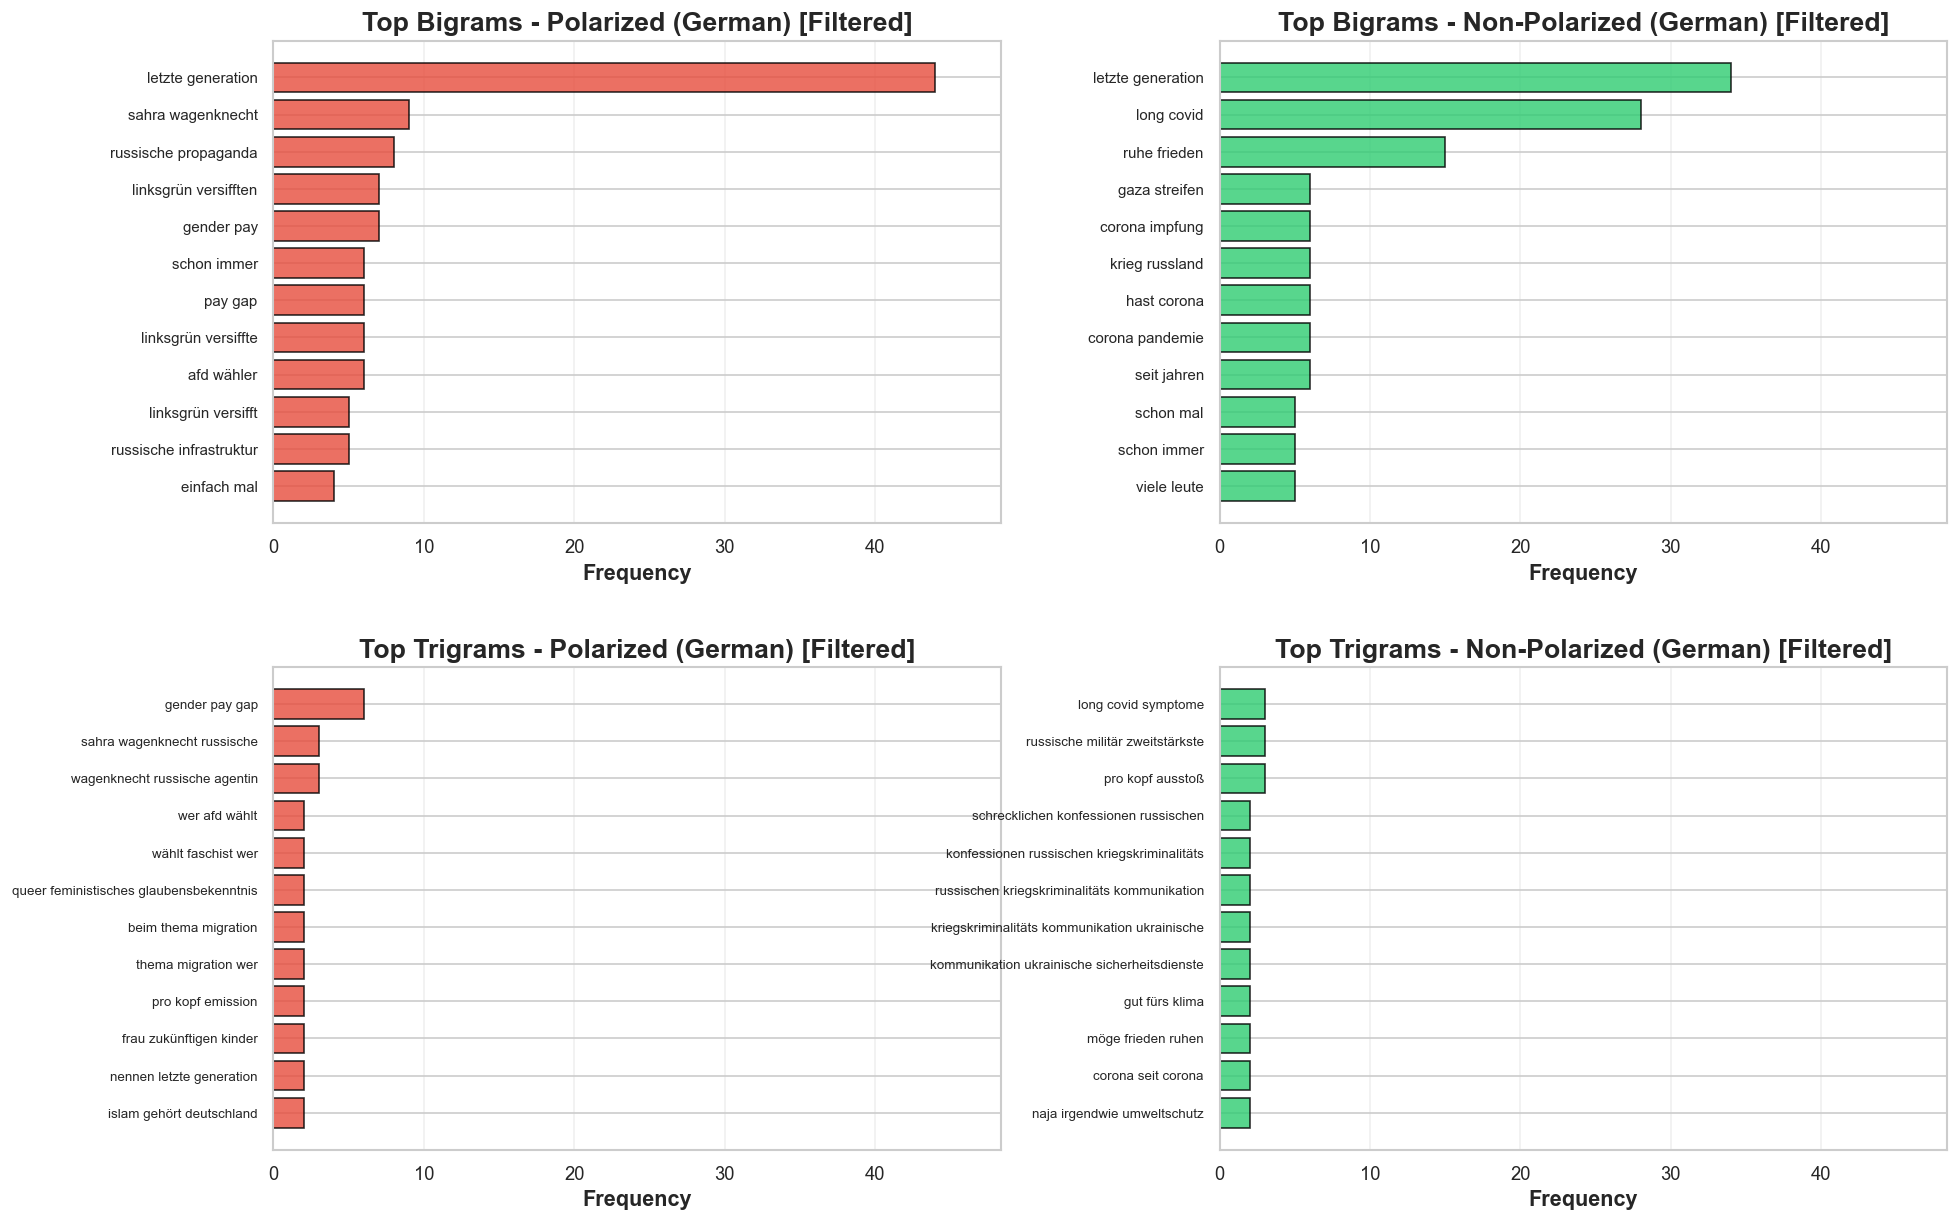

✓ Filtered n-grams analysis saved to plots/07_ngrams_german_filtered.pdf


🔹 Analyzing language: SPANISH (FILTERED)

Top 12 Bigrams by Class (Filtered):
    Filtered 37 repetitions, top 3:
      - 'negro negro': 20
      - 'chino chino': 13
      - 'corrupcion corrupcion': 10

Non-Polarized:
  'indio solari': 11
  'iglesia evangelica': 11
  'puede abortar': 10
  'abortar mision': 9
  'puede ser': 9
  'mas corrupcion': 8
  'pastor evangelico': 8
  'pueblo judio': 7
  'aborto legal': 7
  'ser judio': 6
  'iglesia catolica': 6
  'cristiano evangelico': 6
    Filtered 36 repetitions, top 3:
      - 'negra negra': 6
      - 'zorra zorra': 5
      - 'gay gay': 5

Polarized:
  'iglesia evangelica': 13
  'pastor evangelico': 11
  'ser judio': 9
  'judio nazi': 8
  'deberia ser': 8
  'pais musulman': 8
  'ser deportado': 8
  'justicia corrupta': 7
  'judio mierda': 6
  'nazi judio': 6
  'deportacion inmediata': 6
  'mas corrupto': 6

-------------------------------------------------------------

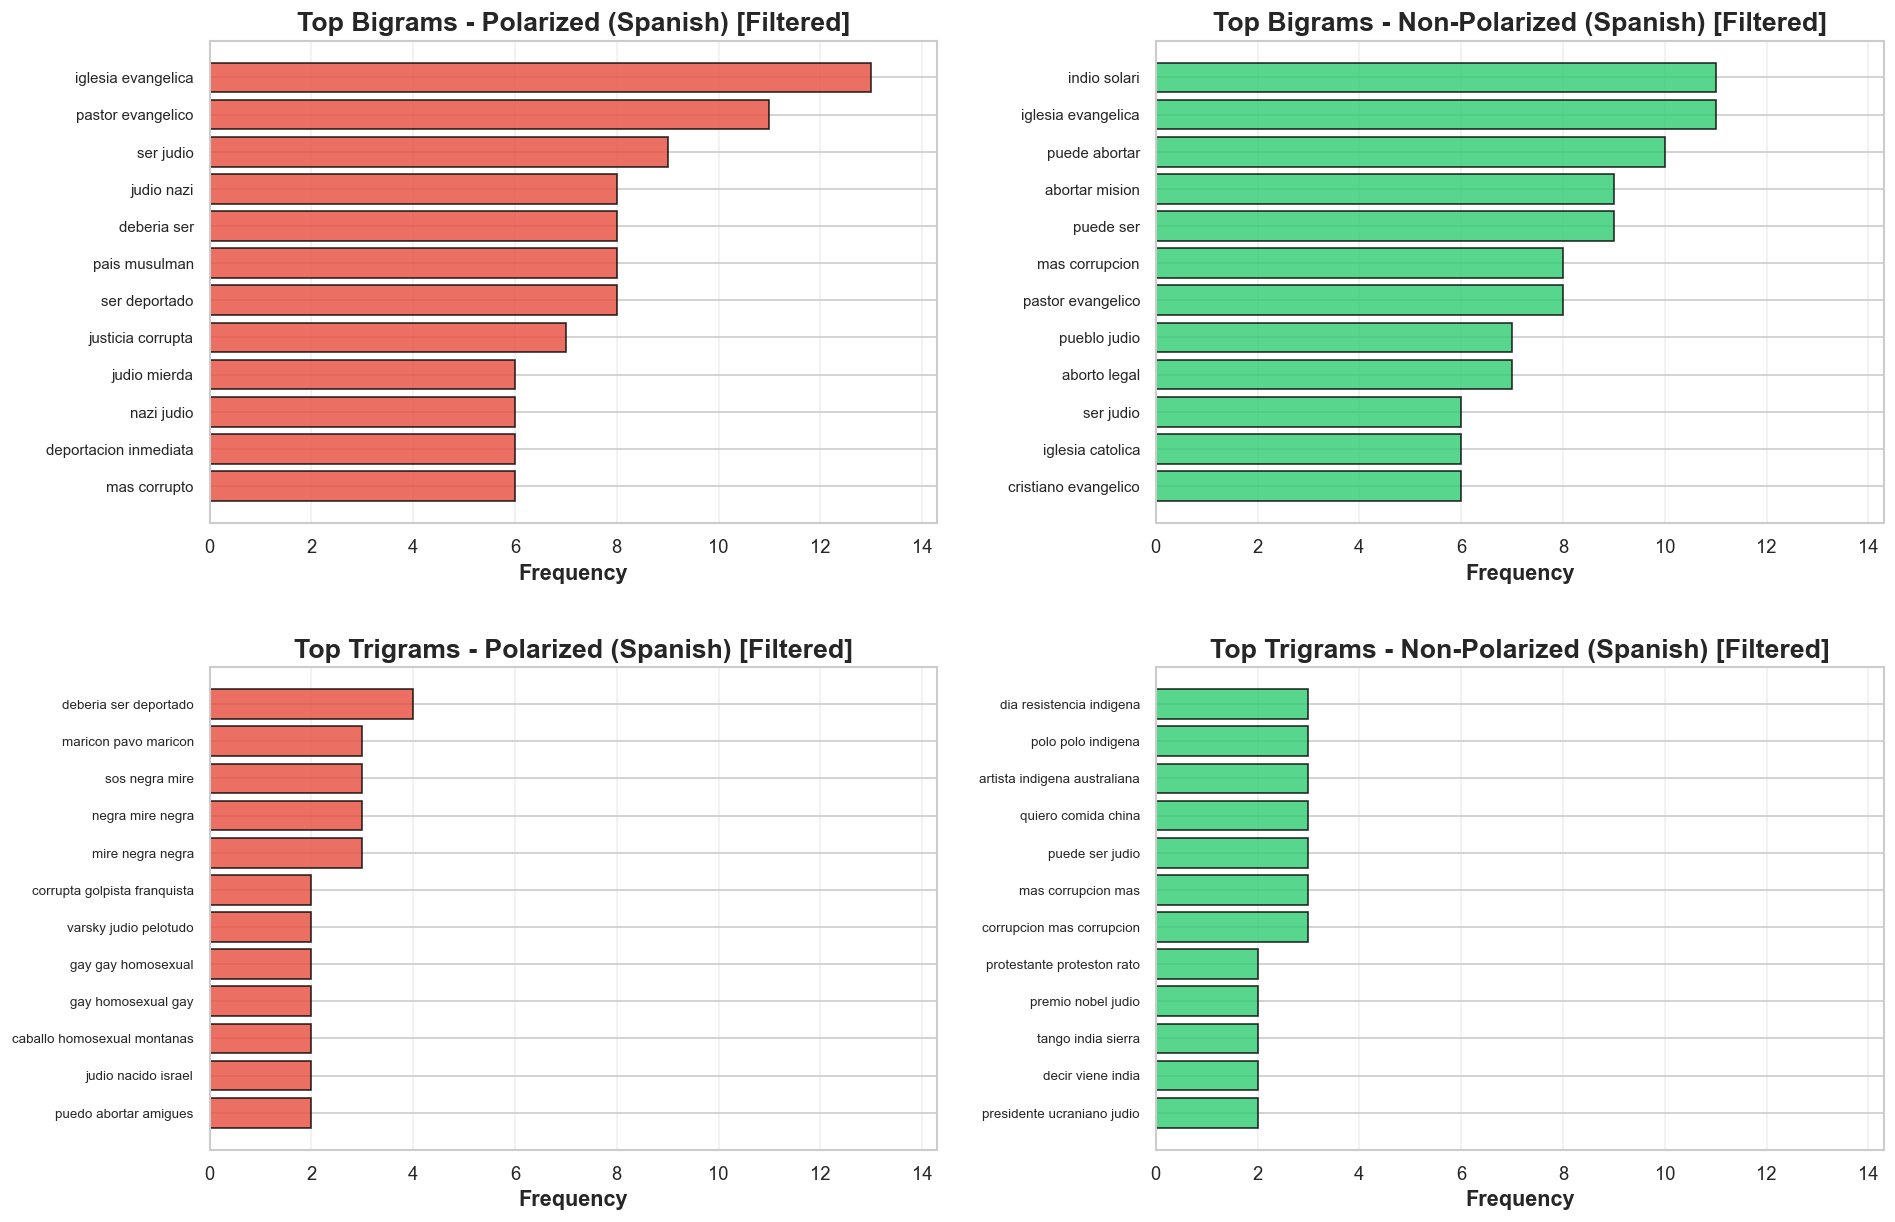

✓ Filtered n-grams analysis saved to plots/07_ngrams_spanish_filtered.pdf

ALL FILTERED LANGUAGE N-GRAMS COMPLETE

Generated files:
  - plots/07_ngrams_english_filtered.pdf
  - plots/07_ngrams_german_filtered.pdf
  - plots/07_ngrams_spanish_filtered.pdf


In [ ]:
print("\n" + "="*70)
print("MULTILINGUAL N-GRAMS ANALYSIS - FILTERED (Bigrams & Trigrams)")
print("="*70)

def get_top_ngrams_filtered(texts, n=2, top_k=15, lang='english'):
    """Extract top n-grams with stopword removal and repetition filtering"""
    stop_words = set(stopwords.words(lang))
    #add English stopwords for code-mixed text
    if lang != 'english':
        stop_words.update(stopwords.words('english'))
    tokens_list = []

    for txt in texts:
        tokens = re.findall(r'\b\w+\b', str(txt).lower())
        tokens = [t for t in tokens if t not in stop_words and len(t) > 2 and t.isalpha()]
        tokens_list.extend(tokens)

    n_grams = ngrams(tokens_list, n)
    ngram_counts = Counter(n_grams)

    #filter out n-grams where all words are identical (like "corona corona")
    filtered_ngrams = {}
    filtered_out = []

    for gram, count in ngram_counts.items():
        if len(set(gram)) > 1:
            filtered_ngrams[gram] = count
        else:
            filtered_out.append((gram, count))

    #show filtered examples (only for bigrams)
    if filtered_out and n == 2:
        print(f"    Filtered {len(filtered_out)} repetitions, top 3:")
        for gram, count in sorted(filtered_out, key=lambda x: x[1], reverse=True)[:3]:
            print(f"      - '{' '.join(gram)}': {count}")

    return Counter(filtered_ngrams).most_common(top_k)

for lang in df['language'].unique():
    print(f"\n\n🔹 Analyzing language: {lang.upper()} (FILTERED)")

    #filter dataframe
    sub_df = df[df['language'] == lang]
    lang_key = lang.lower()

    #print top bigrams and trigrams by class (Polarized vs Non-Polarized)
    print("\nTop 12 Bigrams by Class (Filtered):")
    for label in [0, 1]:
        label_name = 'Polarized' if label == 1 else 'Non-Polarized'
        texts = sub_df[sub_df[polarization_column] == label][text_column]
        top_bigrams = get_top_ngrams_filtered(texts, n=2, top_k=12, lang=lang_key)
        print(f"\n{label_name}:")
        for gram, freq in top_bigrams:
            print(f"  '{' '.join(gram)}': {freq}")

    print("\n" + "-"*70)
    print("Top 12 Trigrams by Class (Filtered):")
    for label in [0, 1]:
        label_name = 'Polarized' if label == 1 else 'Non-Polarized'
        texts = sub_df[sub_df[polarization_column] == label][text_column]
        top_trigrams = get_top_ngrams_filtered(texts, n=3, top_k=12, lang=lang_key)
        print(f"\n{label_name}:")
        for gram, freq in top_trigrams:
            print(f"  '{' '.join(gram)}': {freq}")

    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

    #prepare data for all 4 panels
    texts_pol = sub_df[sub_df[polarization_column] == 1][text_column]
    texts_npol = sub_df[sub_df[polarization_column] == 0][text_column]

    bigrams_pol = get_top_ngrams_filtered(texts_pol, n=2, top_k=12, lang=lang_key)
    bigrams_npol = get_top_ngrams_filtered(texts_npol, n=2, top_k=12, lang=lang_key)
    trigrams_pol = get_top_ngrams_filtered(texts_pol, n=3, top_k=12, lang=lang_key)
    trigrams_npol = get_top_ngrams_filtered(texts_npol, n=3, top_k=12, lang=lang_key)

    #ensure all x-axis scales match
    all_counts = []
    for data in [bigrams_pol, bigrams_npol, trigrams_pol, trigrams_npol]:
        if data:
            all_counts.extend([c for _, c in data])
    max_freq = max(all_counts) if all_counts else 1

    #BIGRAMS: POLARIZED
    ax1 = fig.add_subplot(gs[0, 0])
    if bigrams_pol:
        grams, counts = zip(*bigrams_pol)
        grams_str = [' '.join(g) for g in grams]
        ax1.barh(range(len(grams_str)), counts, color='#e74c3c', alpha=0.8, edgecolor='black')
        ax1.set_yticks(range(len(grams_str)))
        ax1.set_yticklabels(grams_str, fontsize=9)
        ax1.set_xlabel('Frequency', fontweight='bold')
        ax1.set_xlim(0, max_freq * 1.1)
        ax1.set_title(f'Top Bigrams - Polarized ({lang.title()}) [Filtered]', fontweight='bold')
        ax1.invert_yaxis()
        ax1.grid(alpha=0.3, axis='x')

    #BIGRAMS: NON-POLARIZED
    ax2 = fig.add_subplot(gs[0, 1])
    if bigrams_npol:
        grams, counts = zip(*bigrams_npol)
        grams_str = [' '.join(g) for g in grams]
        ax2.barh(range(len(grams_str)), counts, color='#2ecc71', alpha=0.8, edgecolor='black')
        ax2.set_yticks(range(len(grams_str)))
        ax2.set_yticklabels(grams_str, fontsize=9)
        ax2.set_xlabel('Frequency', fontweight='bold')
        ax2.set_xlim(0, max_freq * 1.1)
        ax2.set_title(f'Top Bigrams - Non-Polarized ({lang.title()}) [Filtered]', fontweight='bold')
        ax2.invert_yaxis()
        ax2.grid(alpha=0.3, axis='x')

    #TRIGRAMS: POLARIZED
    ax3 = fig.add_subplot(gs[1, 0])
    if trigrams_pol:
        grams, counts = zip(*trigrams_pol)
        grams_str = [' '.join(g) for g in grams]
        ax3.barh(range(len(grams_str)), counts, color='#e74c3c', alpha=0.8, edgecolor='black')
        ax3.set_yticks(range(len(grams_str)))
        ax3.set_yticklabels(grams_str, fontsize=8)
        ax3.set_xlabel('Frequency', fontweight='bold')
        ax3.set_xlim(0, max_freq * 1.1)
        ax3.set_title(f'Top Trigrams - Polarized ({lang.title()}) [Filtered]', fontweight='bold')
        ax3.invert_yaxis()
        ax3.grid(alpha=0.3, axis='x')

    #TRIGRAMS: NON-POLARIZED
    ax4 = fig.add_subplot(gs[1, 1])
    if trigrams_npol:
        grams, counts = zip(*trigrams_npol)
        grams_str = [' '.join(g) for g in grams]
        ax4.barh(range(len(grams_str)), counts, color='#2ecc71', alpha=0.8, edgecolor='black')
        ax4.set_yticks(range(len(grams_str)))
        ax4.set_yticklabels(grams_str, fontsize=8)
        ax4.set_xlabel('Frequency', fontweight='bold')
        ax4.set_xlim(0, max_freq * 1.1)
        ax4.set_title(f'Top Trigrams - Non-Polarized ({lang.title()}) [Filtered]', fontweight='bold')
        ax4.invert_yaxis()
        ax4.grid(alpha=0.3, axis='x')

    #save figure
    output_path = f"plots/plots_Aman/separate_languages/07_ngrams_{lang.lower()}_filtered.pdf"
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"✓ Filtered n-grams analysis saved to {output_path}")

print("\n" + "="*70)
print("ALL FILTERED LANGUAGE N-GRAMS COMPLETE")
print("="*70)
print("\nGenerated files:")
print("  - plots/07_ngrams_english_filtered.pdf")
print("  - plots/07_ngrams_german_filtered.pdf")
print("  - plots/07_ngrams_spanish_filtered.pdf")




---

<font size = "4"><b>
COMBINED N-GRAMS ANALYSIS - FILTERED VERSION (No Repetitions)</b></font>


---


COMBINED N-GRAMS ANALYSIS - FILTERED VERSION (No Repetitions)

Top 15 Bigrams by Class (Combined - Filtered):
  Using 729 stopwords from English, German, and Spanish
  Filtered 98 repetitive n-grams:
    - 'gaza gaza': 59
    - 'negro negro': 20
    - 'chino chino': 13
    - 'corrupcion corrupcion': 10
    - 'guerra guerra': 10

Non-Polarized:
  'donald trump': 79
  'military aid': 64
  'kamala harris': 54
  'west bank': 37
  'joe biden': 37
  'border security': 36
  'letzte generation': 34
  'early voting': 29
  'aid ukraine': 29
  'long covid': 28
  'electoral college': 25
  'voter registration': 25
  'fake news': 21
  'mike pence': 21
  'iron dome': 19
  Using 729 stopwords from English, German, and Spanish
  Filtered 106 repetitive n-grams:
    - 'negra negra': 6
    - 'krieg krieg': 5
    - 'zorra zorra': 5
    - 'gay gay': 5
    - 'negro negro': 5

Polarized:
  'letzte generation': 44
  'human shields': 35
  'ethnic cleansing': 27
  'apartheid state': 26
  'red states': 23
  'bo

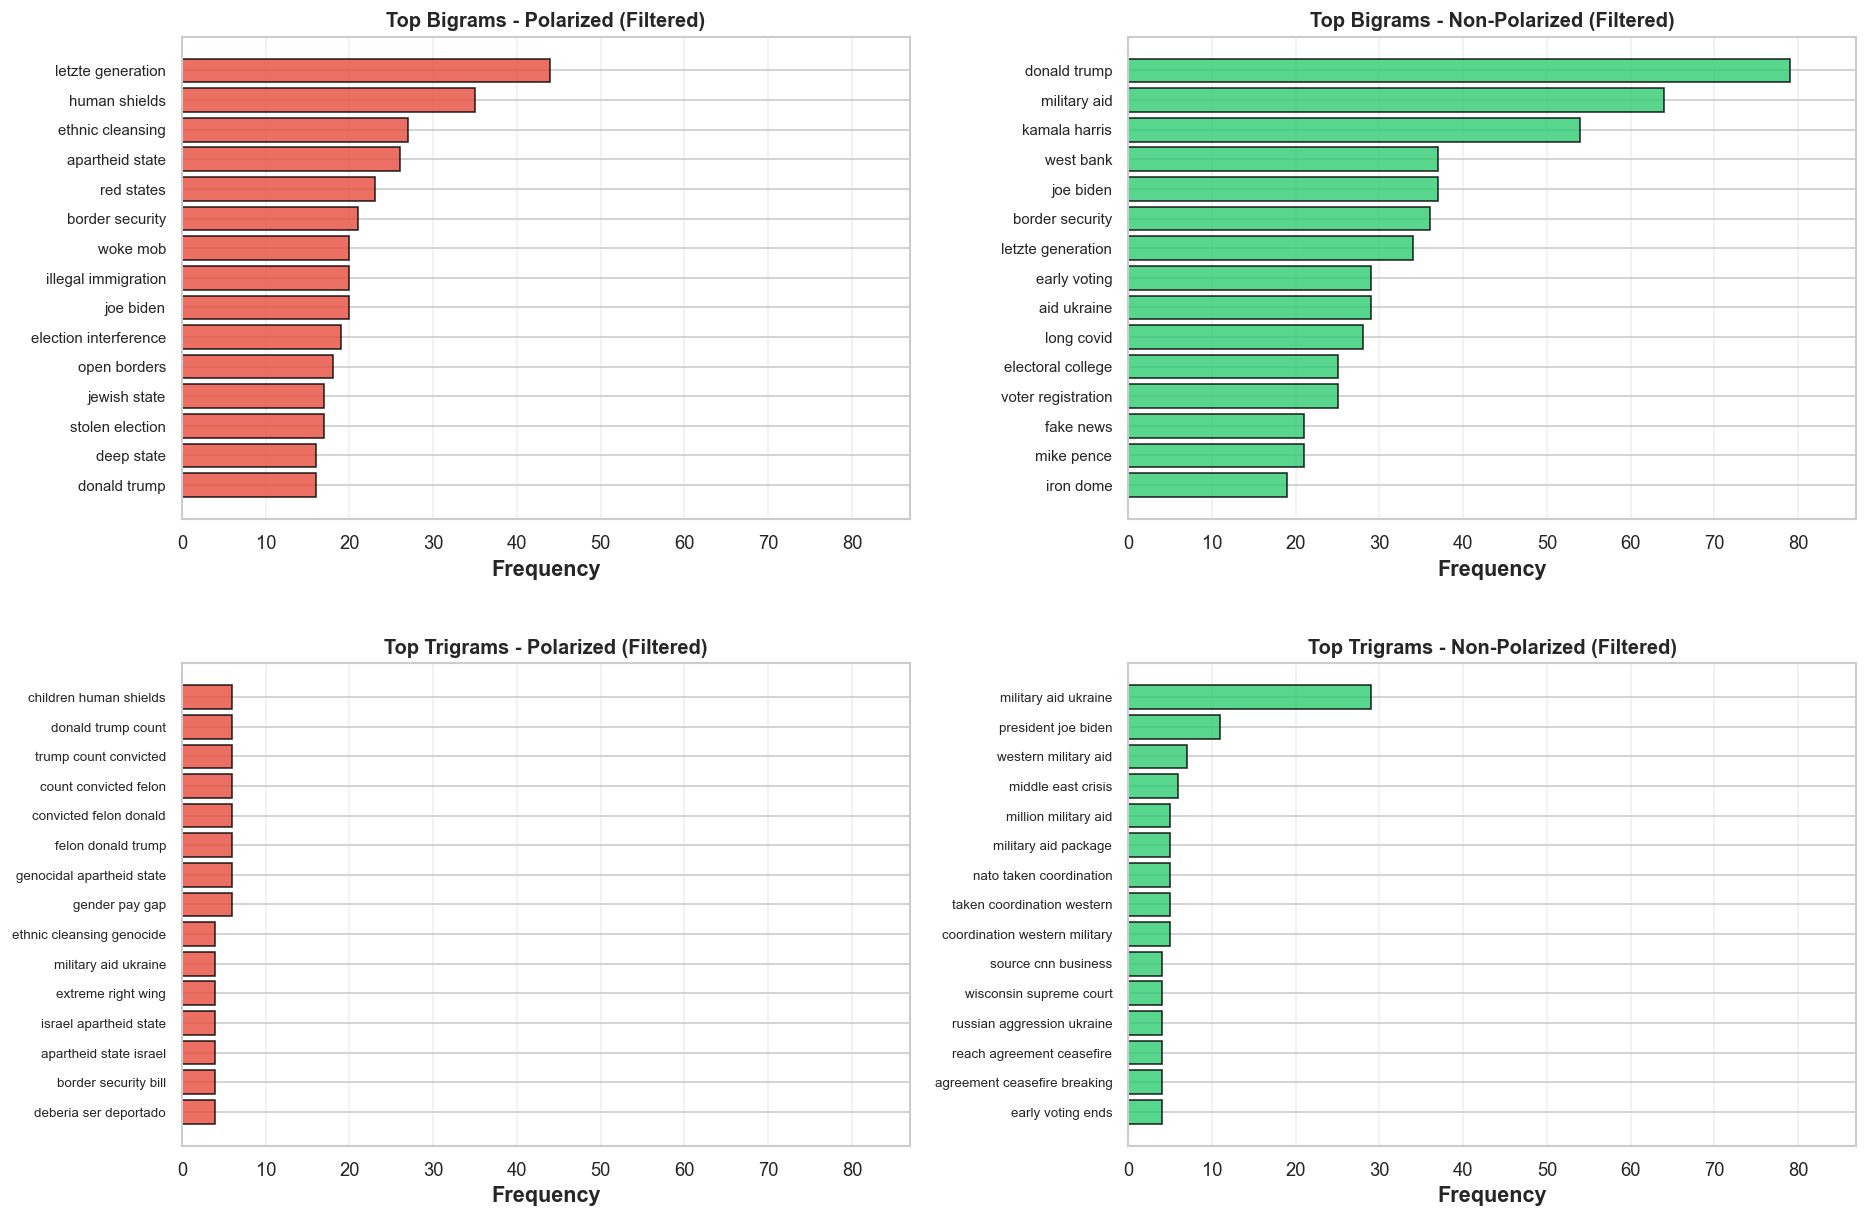


✓ Combined multilingual N-grams analysis (FILTERED) saved to plots/07_ngrams_combined_filtered.pdf

FILTERING SUMMARY

This filtered version removes n-grams with identical repeated words
(e.g., 'gaza gaza', 'chino chino chino', 'war war war')

Benefit: Focuses on semantic diversity and meaningful word combinations
Trade-off: Loses information about emphatic repetition patterns in discourse


In [ ]:
print("\n" + "="*70)
print("COMBINED N-GRAMS ANALYSIS - FILTERED VERSION (No Repetitions)")
print("="*70)

def get_top_ngrams_multilingual_filtered(texts, n=2, top_k=15):
    """Extract top n-grams with multilingual stopwords and repetition filtering"""

    #combine stopwords from all three languages
    stop_words = set()
    for lang in ['english', 'german', 'spanish']:
        stop_words.update(stopwords.words(lang))

    print(f"  Using {len(stop_words)} stopwords from English, German, and Spanish")

    tokens_list = []
    for txt in texts:
        tokens = re.findall(r'\b\w+\b', str(txt).lower())
        tokens = [t for t in tokens if t not in stop_words and len(t) > 2 and t.isalpha()]
        tokens_list.extend(tokens)

    n_grams = ngrams(tokens_list, n)
    ngram_counts = Counter(n_grams)

    #filter out n-grams where all words are identical
    filtered_ngrams = {}
    filtered_out = []

    for gram, count in ngram_counts.items():
        #check if all words in the n-gram are the same
        if len(set(gram)) > 1:  #leep only if words are different
            filtered_ngrams[gram] = count
        else:
            filtered_out.append((gram, count))

    #show what was filtered
    if filtered_out:
        print(f"  Filtered {len(filtered_out)} repetitive n-grams:")
        for gram, count in sorted(filtered_out, key=lambda x: x[1], reverse=True)[:5]:
            print(f"    - '{' '.join(gram)}': {count}")

    return Counter(filtered_ngrams).most_common(top_k)


#combine all languages
combined_df = df.copy()

#print top bigrams and trigrams by class (FILTERED)
print("\nTop 15 Bigrams by Class (Combined - Filtered):")
for label in [0, 1]:
    label_name = 'Polarized' if label == 1 else 'Non-Polarized'
    texts = combined_df[combined_df[polarization_column] == label][text_column]
    top_bigrams = get_top_ngrams_multilingual_filtered(texts, n=2, top_k=15)
    print(f"\n{label_name}:")
    for gram, freq in top_bigrams:
        print(f"  '{' '.join(gram)}': {freq}")

print("\n" + "-"*70)
print("Top 15 Trigrams by Class (Combined - Filtered):")
for label in [0, 1]:
    label_name = 'Polarized' if label == 1 else 'Non-Polarized'
    texts = combined_df[combined_df[polarization_column] == label][text_column]
    top_trigrams = get_top_ngrams_multilingual_filtered(texts, n=3, top_k=15)
    print(f"\n{label_name}:")
    for gram, freq in top_trigrams:
        print(f"  '{' '.join(gram)}': {freq}")


fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# GET ALL DATA FIRST
texts_pol = combined_df[combined_df[polarization_column] == 1][text_column]
texts_npol = combined_df[combined_df[polarization_column] == 0][text_column]

bigrams_pol = get_top_ngrams_multilingual_filtered(texts_pol, n=2, top_k=15)
bigrams_npol = get_top_ngrams_multilingual_filtered(texts_npol, n=2, top_k=15)
trigrams_pol = get_top_ngrams_multilingual_filtered(texts_pol, n=3, top_k=15)
trigrams_npol = get_top_ngrams_multilingual_filtered(texts_npol, n=3, top_k=15)

#calculate max frequency for consistent scaling
all_counts = []
for data in [bigrams_pol, bigrams_npol, trigrams_pol, trigrams_npol]:
    if data:
        all_counts.extend([c for _, c in data])
max_freq = max(all_counts) if all_counts else 1

# Bigrams - Polarized
ax1 = fig.add_subplot(gs[0, 0])
if bigrams_pol:
    grams, counts = zip(*bigrams_pol)
    grams_str = [' '.join(g) for g in grams]
    ax1.barh(range(len(grams_str)), counts, color='#e74c3c', alpha=0.8, edgecolor='black')
    ax1.set_yticks(range(len(grams_str)))
    ax1.set_yticklabels(grams_str, fontsize=9)
    ax1.set_xlabel('Frequency', fontweight='bold')
    ax1.set_title('Top Bigrams - Polarized (Filtered)', fontweight='bold', fontsize=12)
    ax1.invert_yaxis()
    ax1.grid(alpha=0.3, axis='x')
    ax1.set_xlim(0, max_freq * 1.1)

# Bigrams - Non-Polarized
ax2 = fig.add_subplot(gs[0, 1])
if bigrams_npol:
    grams, counts = zip(*bigrams_npol)
    grams_str = [' '.join(g) for g in grams]
    ax2.barh(range(len(grams_str)), counts, color='#2ecc71', alpha=0.8, edgecolor='black')
    ax2.set_yticks(range(len(grams_str)))
    ax2.set_yticklabels(grams_str, fontsize=9)
    ax2.set_xlabel('Frequency', fontweight='bold')
    ax2.set_title('Top Bigrams - Non-Polarized (Filtered)', fontweight='bold', fontsize=12)
    ax2.invert_yaxis()
    ax2.grid(alpha=0.3, axis='x')
    ax2.set_xlim(0, max_freq * 1.1)

# Trigrams - Polarized
ax3 = fig.add_subplot(gs[1, 0])
if trigrams_pol:
    grams, counts = zip(*trigrams_pol)
    grams_str = [' '.join(g) for g in grams]
    ax3.barh(range(len(grams_str)), counts, color='#e74c3c', alpha=0.8, edgecolor='black')
    ax3.set_yticks(range(len(grams_str)))
    ax3.set_yticklabels(grams_str, fontsize=8)
    ax3.set_xlabel('Frequency', fontweight='bold')
    ax3.set_title('Top Trigrams - Polarized (Filtered)', fontweight='bold', fontsize=12)
    ax3.invert_yaxis()
    ax3.grid(alpha=0.3, axis='x')
    ax3.set_xlim(0, max_freq * 1.1)

# Trigrams - Non-Polarized
ax4 = fig.add_subplot(gs[1, 1])
if trigrams_npol:
    grams, counts = zip(*trigrams_npol)
    grams_str = [' '.join(g) for g in grams]
    ax4.barh(range(len(grams_str)), counts, color='#2ecc71', alpha=0.8, edgecolor='black')
    ax4.set_yticks(range(len(grams_str)))
    ax4.set_yticklabels(grams_str, fontsize=8)
    ax4.set_xlabel('Frequency', fontweight='bold')
    ax4.set_title('Top Trigrams - Non-Polarized (Filtered)', fontweight='bold', fontsize=12)
    ax4.invert_yaxis()
    ax4.grid(alpha=0.3, axis='x')
    ax4.set_xlim(0, max_freq * 1.1)

#save filtered plot
output_path = "plots/plots_Aman/combined_overall/07_ngrams_combined_filtered.pdf"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Combined multilingual N-grams analysis (FILTERED) saved to {output_path}")

#summary comparison
print("\n" + "="*70)
print("FILTERING SUMMARY")
print("="*70)
print("\nThis filtered version removes n-grams with identical repeated words")
print("(e.g., 'gaza gaza', 'chino chino chino', 'war war war')")
print("\nBenefit: Focuses on semantic diversity and meaningful word combinations")
print("Trade-off: Loses information about emphatic repetition patterns in discourse")



---

<font size = "4"><b>
N-GRAMS ANALYSIS: WITH vs WITHOUT POLITICAL FIGURES</b></font>


---


N-GRAMS ANALYSIS: WITH vs WITHOUT POLITICAL FIGURES

BIGRAMS ANALYSIS

Non-Polarized - WITH Political Figures:
  'donald trump': 79
  'kamala harris': 54
  'joe biden': 37
  'mike pence': 21
  'donald trumps': 12
  'president joe': 11
  'president biden': 7
  'biden impeachment': 4
  'joe bidens': 4
  'presidentelect donald': 4
  'president kamala': 4
  'biden visit': 3
  'case donald': 3
  'iowa donald': 3
  'authorize joe': 3

Non-Polarized - WITHOUT Political Figures:
  'military aid': 64
  'west bank': 37
  'border security': 36
  'letzte generation': 34
  'early voting': 29
  'aid ukraine': 29
  'long covid': 28
  'electoral college': 25
  'voter registration': 25
  'fake news': 21
  'iron dome': 19
  'ukraine invasion': 17
  'nato expansion': 16
  'russian aggression': 16
  'fox news': 16

----------------------------------------------------------------------

Polarized - WITH Political Figures:
  'joe biden': 20
  'donald trump': 16
  'mike pence': 15
  'kamala harris': 13
  't

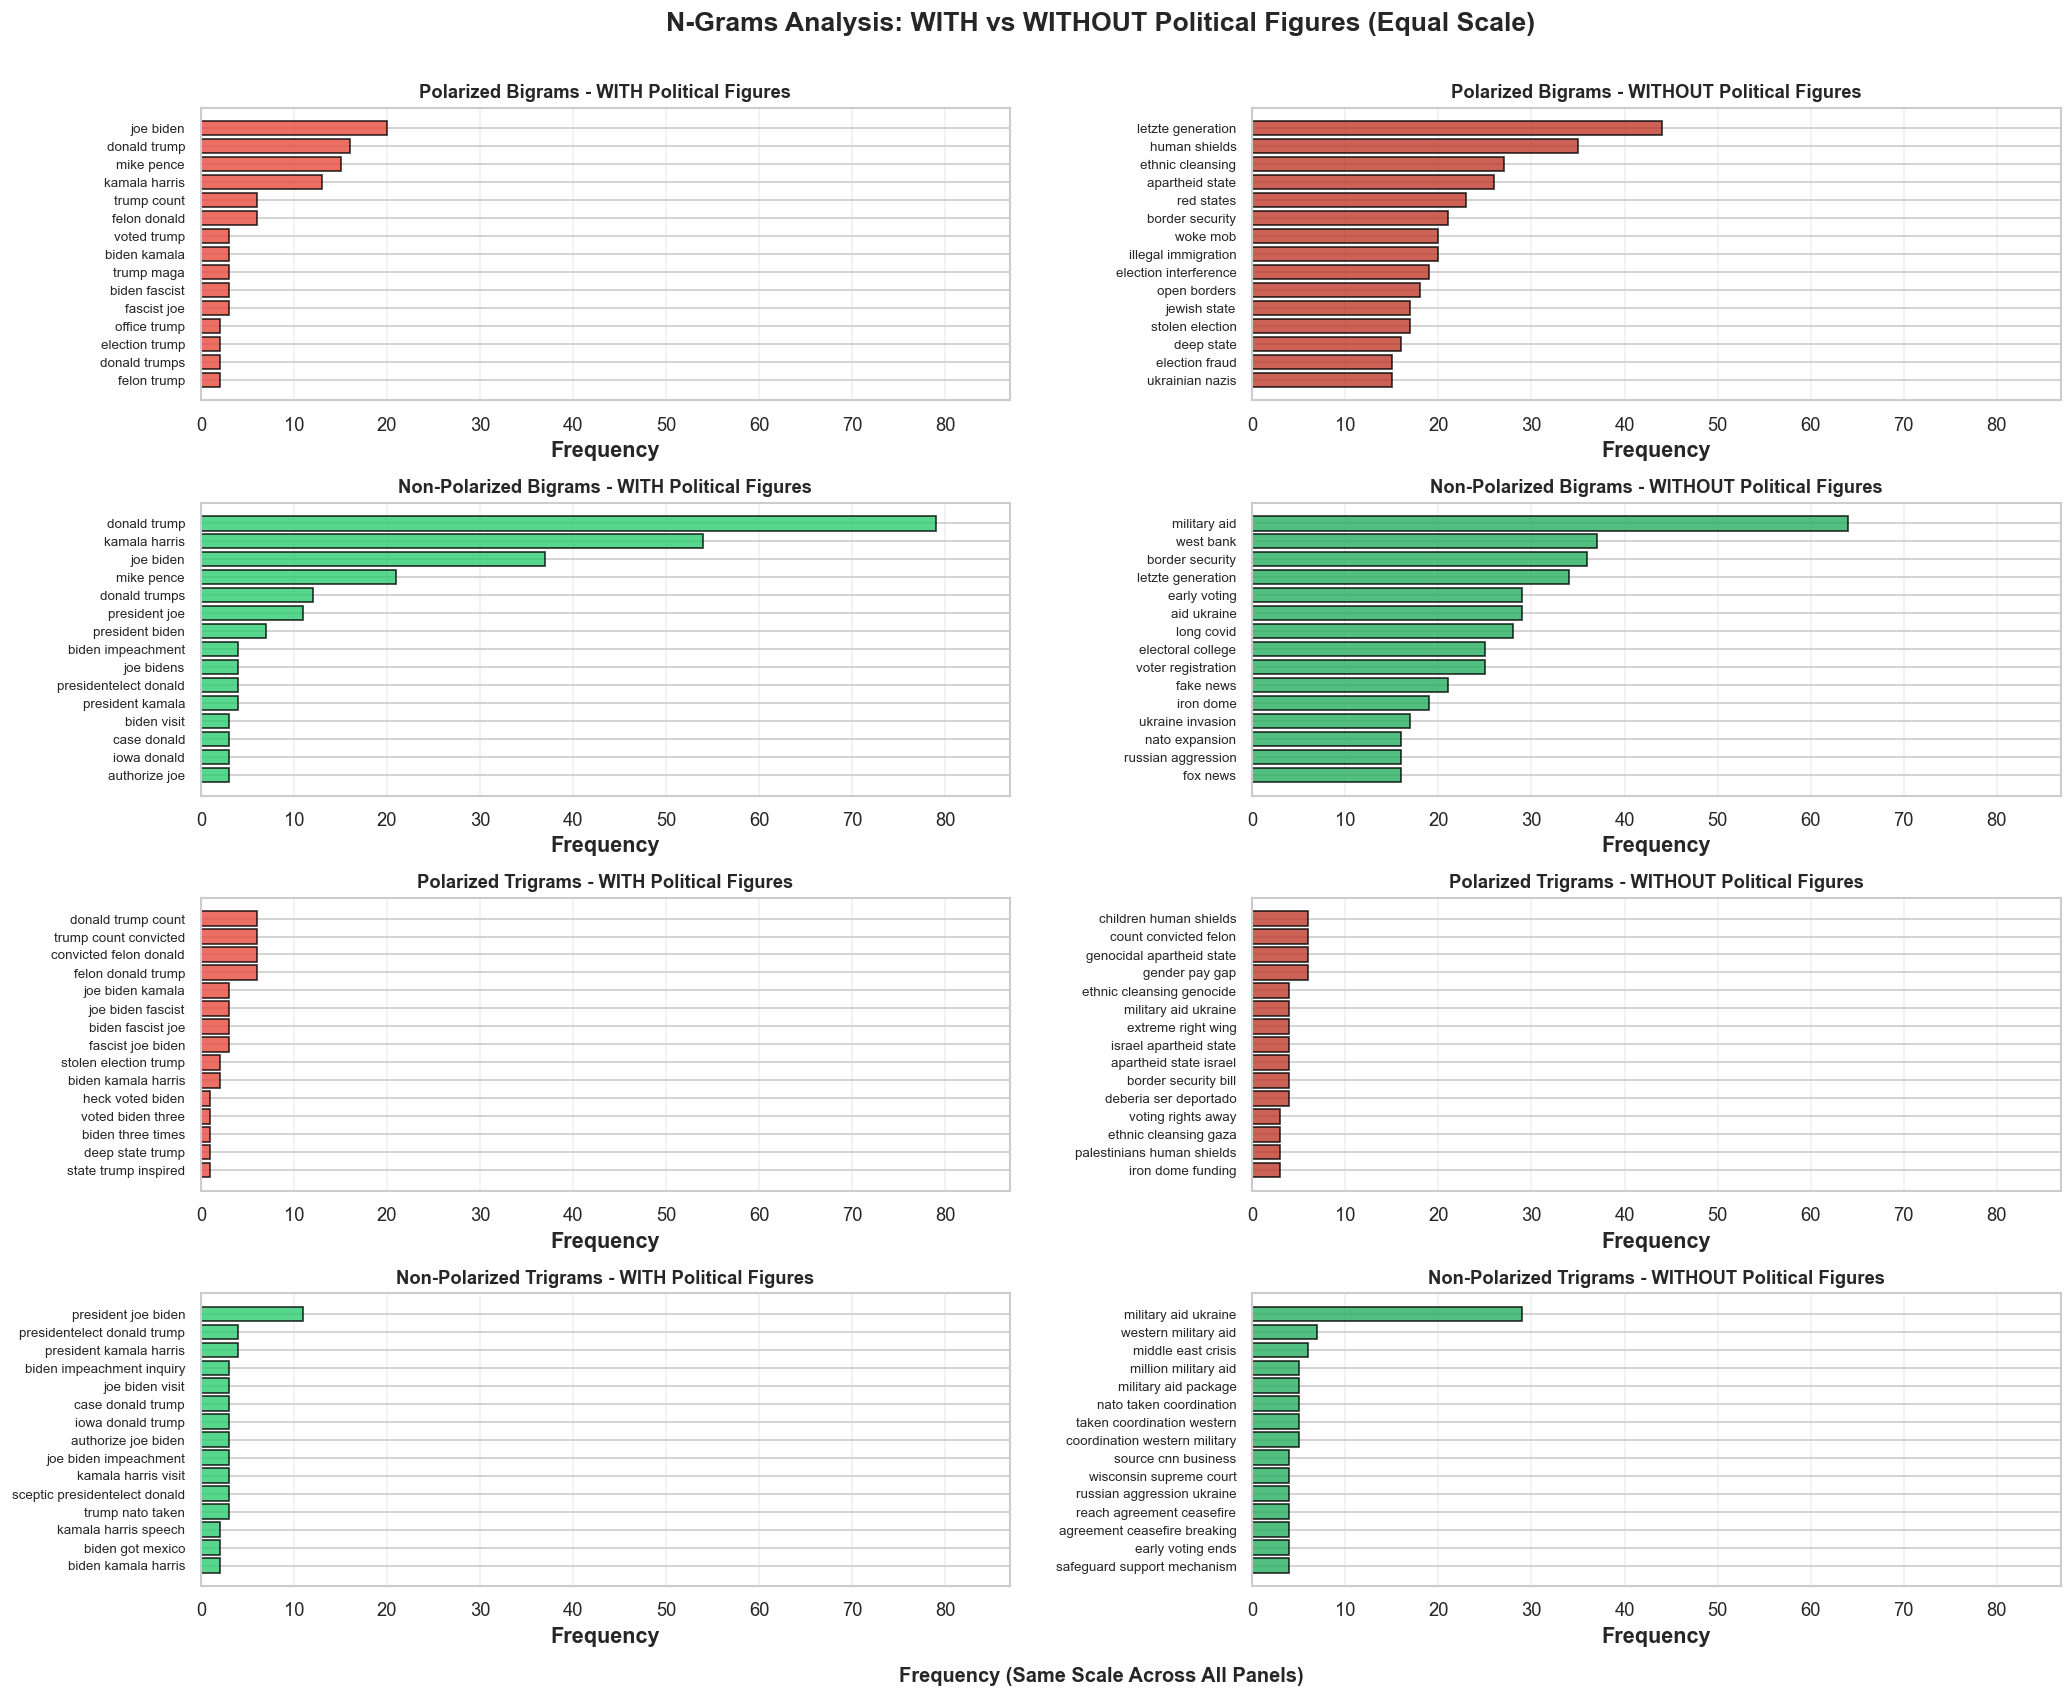


✓ N-grams split by political figures (equal x-axis scale) saved to plots/07_ngrams_political_split_equal_scale.pdf


In [ ]:
print("\n" + "="*70)
print("N-GRAMS ANALYSIS: WITH vs WITHOUT POLITICAL FIGURES")
print("="*70)

#define political figures to track
POLITICAL_FIGURES = ['donald', 'trump', 'biden', 'joe', 'kamala', 'harris',
                     'pence', 'mike', 'obama', 'clinton']

def contains_political_figure(ngram, political_terms):
    """Check if n-gram contains any political figure names"""
    return any(term in ngram for term in political_terms)

def get_top_ngrams_with_political_split(texts, n=2, top_k=15):
    """Extract n-grams and split into political vs non-political"""

    #combine stopwords from all three languages
    stop_words = set()
    for lang in ['english', 'german', 'spanish']:
        stop_words.update(stopwords.words(lang))

    tokens_list = []
    for txt in texts:
        tokens = re.findall(r'\b\w+\b', str(txt).lower())
        tokens = [t for t in tokens if t not in stop_words and len(t) > 2 and t.isalpha()]
        tokens_list.extend(tokens)

    n_grams = ngrams(tokens_list, n)
    ngram_counts = Counter(n_grams)

    #filter out repetitive n-grams AND split by political content
    with_political = {}
    without_political = {}

    for gram, count in ngram_counts.items():
        # Skip repetitive n-grams
        if len(set(gram)) == 1:
            continue

        # Split based on political figure presence
        if contains_political_figure(gram, POLITICAL_FIGURES):
            with_political[gram] = count
        else:
            without_political[gram] = count

    return (Counter(with_political).most_common(top_k),
            Counter(without_political).most_common(top_k))


#analyze for both classes
combined_df = df.copy()

print("\n" + "="*70)
print("BIGRAMS ANALYSIS")
print("="*70)

for label in [0, 1]:
    label_name = 'Polarized' if label == 1 else 'Non-Polarized'
    texts = combined_df[combined_df[polarization_column] == label][text_column]

    political_bigrams, non_political_bigrams = get_top_ngrams_with_political_split(texts, n=2, top_k=15)

    print(f"\n{label_name} - WITH Political Figures:")
    for gram, freq in political_bigrams:
        print(f"  '{' '.join(gram)}': {freq}")

    print(f"\n{label_name} - WITHOUT Political Figures:")
    for gram, freq in non_political_bigrams:
        print(f"  '{' '.join(gram)}': {freq}")

    print("\n" + "-"*70)


print("\n" + "="*70)
print("TRIGRAMS ANALYSIS")
print("="*70)

for label in [0, 1]:
    label_name = 'Polarized' if label == 1 else 'Non-Polarized'
    texts = combined_df[combined_df[polarization_column] == label][text_column]

    political_trigrams, non_political_trigrams = get_top_ngrams_with_political_split(texts, n=3, top_k=15)

    print(f"\n{label_name} - WITH Political Figures:")
    for gram, freq in political_trigrams:
        print(f"  '{' '.join(gram)}': {freq}")

    print(f"\n{label_name} - WITHOUT Political Figures:")
    for gram, freq in non_political_trigrams:
        print(f"  '{' '.join(gram)}': {freq}")

    print("\n" + "-"*70)


fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 2, hspace=0.35, wspace=0.3)

#get data for visualization
texts_pol = combined_df[combined_df[polarization_column] == 1][text_column]
texts_npol = combined_df[combined_df[polarization_column] == 0][text_column]

pol_bigrams_with, pol_bigrams_without = get_top_ngrams_with_political_split(texts_pol, n=2, top_k=15)
npol_bigrams_with, npol_bigrams_without = get_top_ngrams_with_political_split(texts_npol, n=2, top_k=15)
pol_trigrams_with, pol_trigrams_without = get_top_ngrams_with_political_split(texts_pol, n=3, top_k=15)
npol_trigrams_with, npol_trigrams_without = get_top_ngrams_with_political_split(texts_npol, n=3, top_k=15)

#create subplots
axes = []
data_sets = [
    (pol_bigrams_with, '#e74c3c', 'Polarized Bigrams - WITH Political Figures'),
    (pol_bigrams_without, '#c0392b', 'Polarized Bigrams - WITHOUT Political Figures'),
    (npol_bigrams_with, '#2ecc71', 'Non-Polarized Bigrams - WITH Political Figures'),
    (npol_bigrams_without, '#27ae60', 'Non-Polarized Bigrams - WITHOUT Political Figures'),
    (pol_trigrams_with, '#e74c3c', 'Polarized Trigrams - WITH Political Figures'),
    (pol_trigrams_without, '#c0392b', 'Polarized Trigrams - WITHOUT Political Figures'),
    (npol_trigrams_with, '#2ecc71', 'Non-Polarized Trigrams - WITH Political Figures'),
    (npol_trigrams_without, '#27ae60', 'Non-Polarized Trigrams - WITHOUT Political Figures'),
]

for i, (data, color, title) in enumerate(data_sets):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    axes.append(ax)
    if data:
        grams, counts = zip(*data)
        grams_str = [' '.join(g) for g in grams]
        ax.barh(range(len(grams_str)), counts, color=color, alpha=0.8, edgecolor='black')
        ax.set_yticks(range(len(grams_str)))
        ax.set_yticklabels(grams_str, fontsize=8)
        ax.set_xlabel('Frequency', fontweight='bold')
        ax.set_title(title, fontweight='bold', fontsize=11)
        ax.invert_yaxis()
        ax.grid(alpha=0.3, axis='x')

#ensure all x-axis scales match
all_counts = []
for dataset in [pol_bigrams_with, pol_bigrams_without, npol_bigrams_with, npol_bigrams_without,
                pol_trigrams_with, pol_trigrams_without, npol_trigrams_with, npol_trigrams_without]:
    if dataset:
        all_counts.extend([c for _, c in dataset])

if all_counts:
    max_freq = max(all_counts)
    for ax in axes:
        ax.set_xlim(0, max_freq * 1.1)

#add a shared label and title
fig.suptitle("N-Grams Analysis: WITH vs WITHOUT Political Figures (Equal Scale)",
             fontsize=16, fontweight='bold', y=0.93)
fig.text(0.5, 0.06, 'Frequency (Same Scale Across All Panels)', ha='center', fontsize=12, fontweight='bold')

#save plot
output_path = "plots/plots_Aman/combined_overall/07_ngrams_political_split_equal_scale.pdf"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ N-grams split by political figures (equal x-axis scale) saved to {output_path}")




---

<font size = "4"><b>
HASHTAG ANALYSIS</b></font>


---


HASHTAG ANALYSIS BY LANGUAGE & POLARIZATION


🔹 Analyzing language: ENGLISH (Hashtags)

Non-Polarized:
  #2: 1
  #3: 1

Polarized:


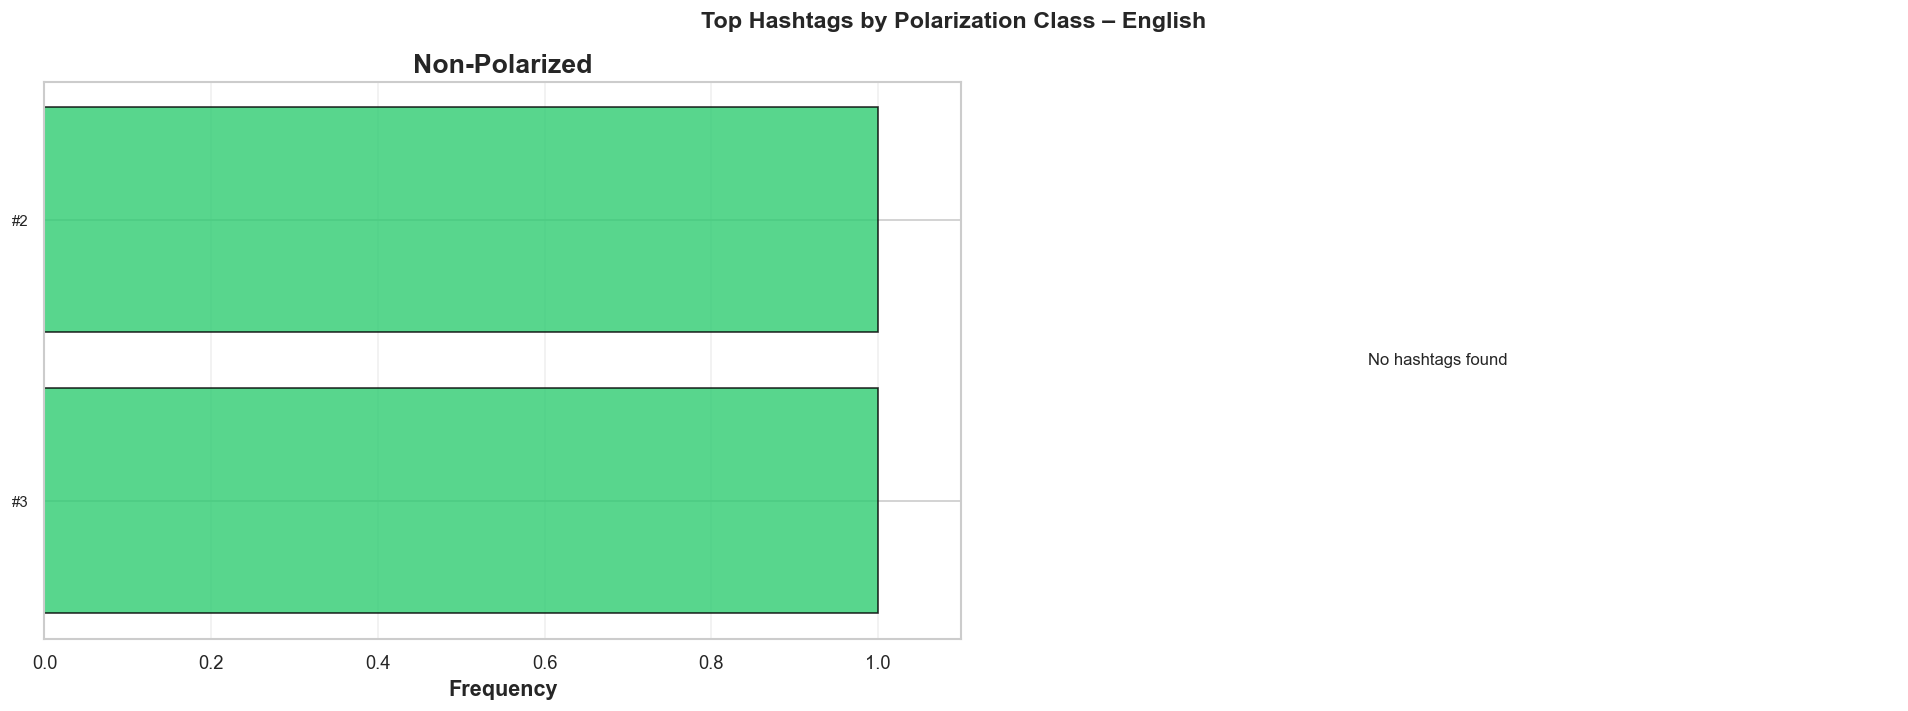

✓ Hashtag analysis saved to plots/08_hashtags_english.pdf


🔹 Analyzing language: GERMAN (Hashtags)

Non-Polarized:
  #gaza: 3
  #migration: 2
  #hamas: 2
  #fridaysforfuture: 2
  #faktencheck: 2
  #toronto: 1
  #antisemitismus: 1
  #schusswaffenangriff: 1
  #jüdischeschule: 1
  #hasskriminalität: 1

Polarized:
  #palestine: 3
  #gaza: 2
  #gazaholocaust: 2
  #migration: 1
  #deutschland: 1
  #magdeburg: 1
  #afd: 1
  #noafd: 1
  #corona: 1
  #covid19: 1


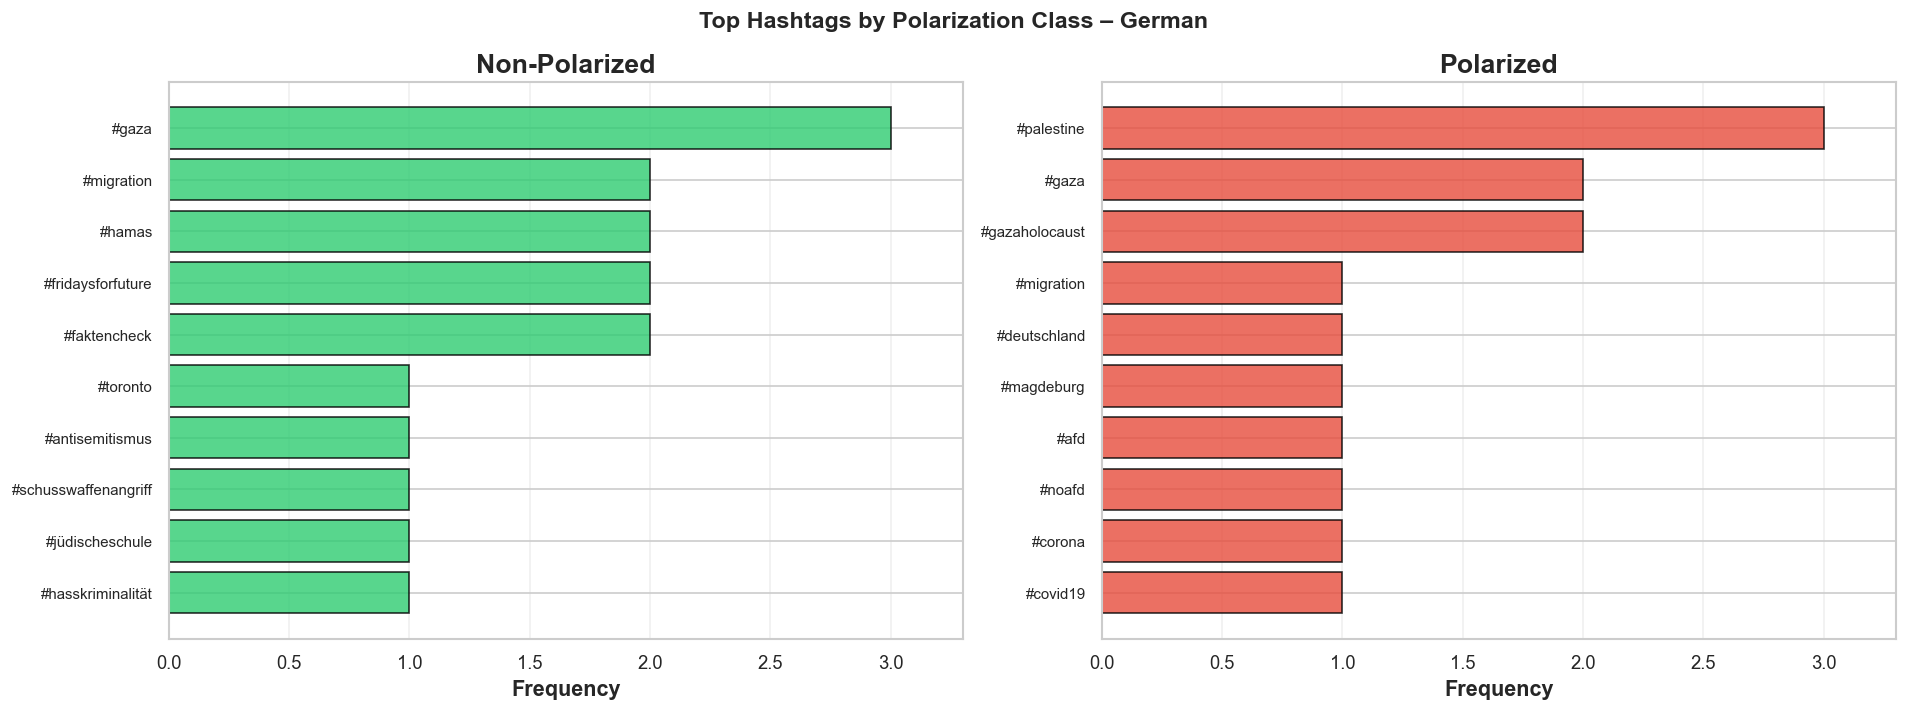

✓ Hashtag analysis saved to plots/08_hashtags_german.pdf


🔹 Analyzing language: SPANISH (Hashtags)

Non-Polarized:
  #israel: 5
  #eeuu: 4
  #womensart: 4
  #islam: 3
  #feminista: 3
  #8m: 2
  #usa: 2
  #ecuador: 1
  #importante: 1
  #migracion: 1

Polarized:
  #corrupcion: 3
  #judio: 2
  #pp: 2
  #mexico: 2
  #feminazis: 2
  #corrupta: 2
  #eeuu: 2
  #chvnoticias: 1
  #prensa: 1
  #desestabilizadora: 1


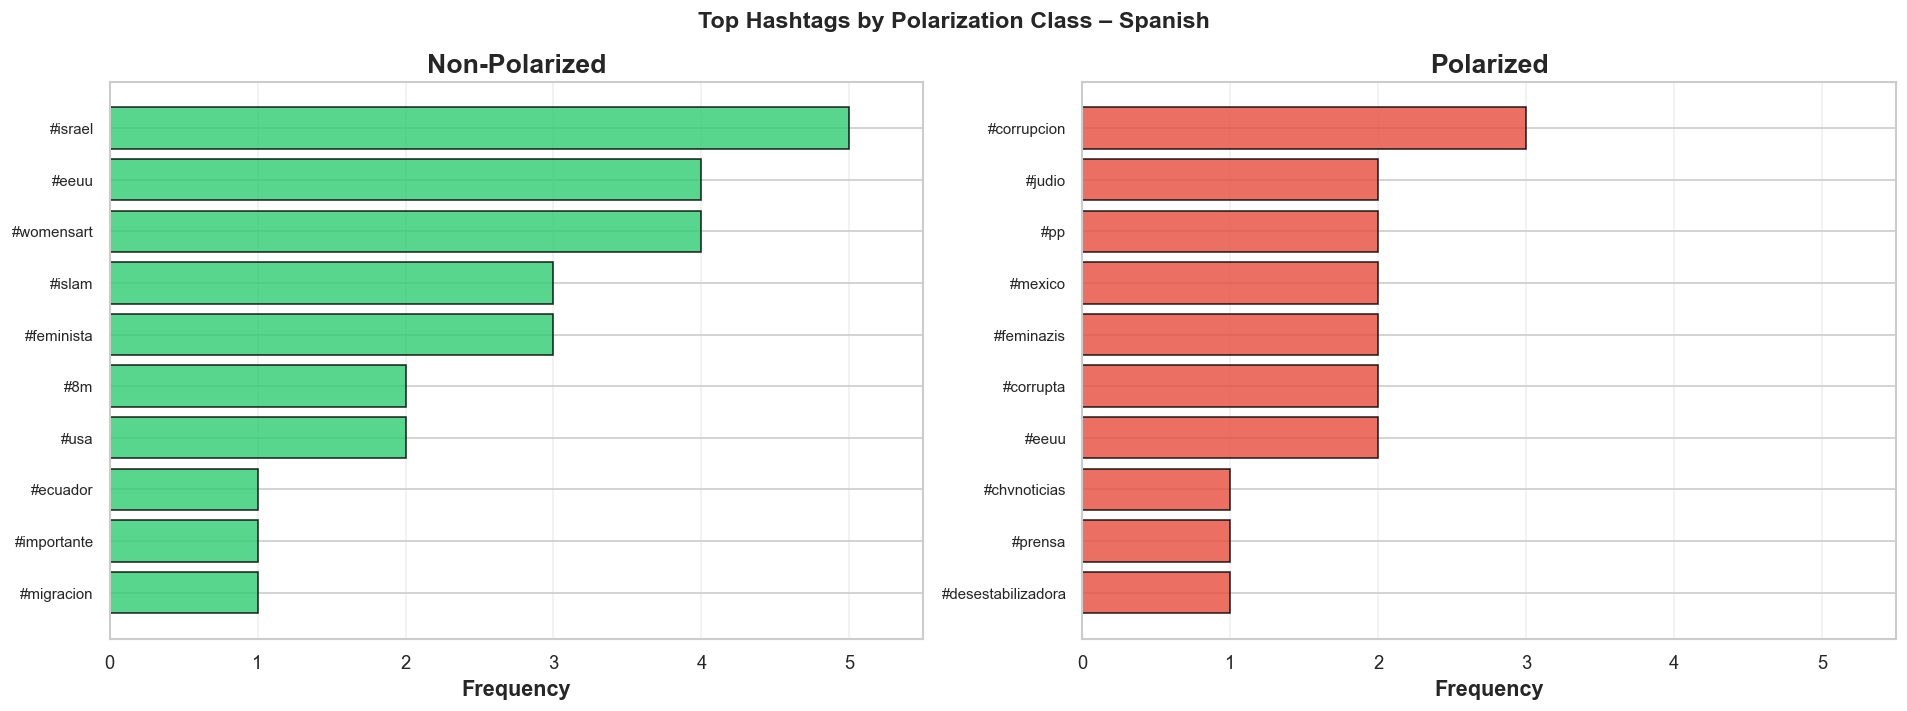

✓ Hashtag analysis saved to plots/08_hashtags_spanish.pdf

ALL LANGUAGE HASHTAG ANALYSIS COMPLETE

Generated files:
  - plots/08_hashtags_english.pdf
  - plots/08_hashtags_german.pdf
  - plots/08_hashtags_spanish.pdf


In [ ]:
print("\n" + "="*70)
print("HASHTAG ANALYSIS BY LANGUAGE & POLARIZATION")
print("="*70)

def get_top_hashtags(texts, top_k=15):
    """Extract top hashtags from a list of texts"""
    hashtags = []
    for txt in texts:
        hashtags.extend([h for h in re.findall(r'#\w+', str(txt).lower()) if not h.startswith('#x')])
    return Counter(hashtags).most_common(top_k)

for lang in df['language'].unique():
    print(f"\n\n🔹 Analyzing language: {lang.upper()} (Hashtags)")

    sub_df = df[df['language'] == lang]

    #extract top hashtags for each polarization class
    top_hashtags = {}
    for label in [0, 1]:
        label_name = 'Polarized' if label == 1 else 'Non-Polarized'
        texts = sub_df[sub_df[polarization_column] == label][text_column]
        top_hashtags[label_name] = get_top_hashtags(texts, top_k=10)

        print(f"\n{label_name}:")
        for tag, freq in top_hashtags[label_name]:
            print(f"  {tag}: {freq}")


    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f"Top Hashtags by Polarization Class – {lang.title()}", fontsize=14, fontweight='bold')

    #calculate max frequency for consistent x-axis scaling
    all_counts = []
    for data in top_hashtags.values():
        if data:
            all_counts.extend([c for _, c in data])
    max_freq = max(all_counts) if all_counts else 1

    for ax, (label_name, data) in zip(axes, top_hashtags.items()):
        if data:
            tags, counts = zip(*data)
            ax.barh(range(len(tags)), counts,
                    color='#e74c3c' if label_name == 'Polarized' else '#2ecc71',
                    alpha=0.8, edgecolor='black')
            ax.set_yticks(range(len(tags)))
            ax.set_yticklabels(tags, fontsize=9)
            ax.set_xlabel('Frequency', fontweight='bold')
            ax.set_title(label_name, fontweight='bold')
            ax.set_xlim(0, max_freq * 1.1)  #consistent x-axis scale
            ax.invert_yaxis()
            ax.grid(alpha=0.3, axis='x')
        else:
            ax.text(0.5, 0.5, 'No hashtags found', ha='center', va='center', fontsize=10)
            ax.set_axis_off()

    plt.tight_layout()
    output_path = f"plots/plots_Aman/separate_languages/08_hashtags_{lang.lower()}.pdf"
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"✓ Hashtag analysis saved to {output_path}")

print("\n" + "="*70)
print("ALL LANGUAGE HASHTAG ANALYSIS COMPLETE")
print("="*70)
print("\nGenerated files:")
print("  - plots/08_hashtags_english.pdf")
print("  - plots/08_hashtags_german.pdf")
print("  - plots/08_hashtags_spanish.pdf")